In [1]:
!wget https://www.dropbox.com/s/en1sdnorob5dsut/new_data_P5.csv?dl=0

--2019-09-20 23:03:11--  https://www.dropbox.com/s/en1sdnorob5dsut/new_data_P5.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/en1sdnorob5dsut/new_data_P5.csv [following]
--2019-09-20 23:03:12--  https://www.dropbox.com/s/raw/en1sdnorob5dsut/new_data_P5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49ae41a73e2f60a735b238583c.dl.dropboxusercontent.com/cd/0/inline/Ao-fM0U49KM8iXzo_1mgxAlhck233A1L8N3H_BY1obK906B9q4xn7X7tzjszZ3xa4ul-8Ajp3Xx5aQ3XpQl4GnaZopvmBcX5CjjSvNaAJTcPdA/file# [following]
--2019-09-20 23:03:12--  https://uc49ae41a73e2f60a735b238583c.dl.dropboxusercontent.com/cd/0/inline/Ao-fM0U49KM8iXzo_1mgxAlhck233A1L8N3H_BY1obK906B9q4xn7X7tzjszZ3xa4ul-8Ajp3Xx5aQ3XpQl4GnaZopvmBcX5CjjSvNaAJTcPdA/file
Re

In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

sns.set()

# We load our data and visualize the first 50 lines.
data = pd.read_csv("new_data_P5.csv?dl=0")
data.head(50)

InvoiceNo  Quantity  CustomerID  ...  Category 4  Time_Minutes  New_Date
0      536365         6     17850.0  ...           0           506    734107
1      536365         6     17850.0  ...           0           506    734107
2      536365         8     17850.0  ...           0           506    734107
3      536365         6     17850.0  ...           0           506    734107
4      536365         6     17850.0  ...           0           506    734107
5      536365         2     17850.0  ...           0           506    734107
6      536365         6     17850.0  ...           0           506    734107
7      536366         6     17850.0  ...           1           508    734107
8      536366         6     17850.0  ...           1           508    734107
9      536367        32     13047.0  ...           0           514    734107
10     536367         6     13047.0  ...           0           514    734107
11     536367         6     13047.0  ...           0           514    734107
12     536367         8     13047.0  ...           0           514    734107
13     536367         6     13047.0  ...           0           514    734107
14     536367         6     13047.0  ...           0           514    734107
15     536367         3     13047.0  ...           1           514    734107
16     536367         2     13047.0  ...           1           514    734107
17     536367         3     13047.0  ...           0           514    734107
18     536367         3     13047.0  ...           0           514    734107
19     536367         4     13047.0  ...           0           514    734107
20     536367         4     13047.0  ...           0           514    734107
21     536368         6     13047.0  ...           0           514    734107
22     536368         3     13047.0  ...           0           514    734107
23     536368         3     13047.0  ...           0           514    734107
24     536368         3     13047.0  ...           0           514    734107
25     536369         3     13047.0  ...           0           515    734107
26     536370        24     12583.0  ...           0           525    734107
27     536370        24     12583.0  ...           0           525    734107
28     536370        12     12583.0  ...           0           525    734107
29     536370        12     12583.0  ...           0           525    734107
30     536370        24     12583.0  ...           0           525    734107
31     536370        48     12583.0  ...           0           525    734107
32     536370        24     12583.0  ...           0           525    734107
33     536370        18     12583.0  ...           0           525    734107
34     536370        24     12583.0  ...           0           525    734107
35     536370        24     12583.0  ...           0           525    734107
36     536370        24     12583.0  ...           0           525    734107
37     536370        24     12583.0  ...           0           525    734107
38     536370        20     12583.0  ...           1           525    734107
39     536370        24     12583.0  ...           0           525    734107
40     536370        24     12583.0  ...           0           525    734107
41     536370        12     12583.0  ...           1           525    734107
42     536370        24     12583.0  ...           0           525    734107
43     536370        24     12583.0  ...           0           525    734107
44     536370        36     12583.0  ...           1           525    734107
45     536370         3     12583.0  ...           0           525    734107
46     536371        80     13748.0  ...           1           540    734107
47     536372         6     17850.0  ...           1           541    734107
48     536372         6     17850.0  ...           1           541    734107
49     536373         6     17850.0  ...           0           542    734107

[50 rows x 48 columns]

In [3]:
data.columns

Index(['InvoiceNo', 'Quantity', 'CustomerID', 'TotalPrice', 'United Kingdom',
       'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE',
       'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus',
       'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA', 'Category 0', 'Category 3', 'Category 1',
       'Category 2', 'Category 4', 'Time_Minutes', 'New_Date'],
      dtype='object')

# Feature engineering

In [0]:
# This will be useful to define the column names after finishing the feature engineering
# on the dataset

data["Time_Minutes1"] = data["Time_Minutes"].copy()
data["InvoiceN01"] = data["InvoiceNo"].copy()
data["New_Date1"] = data["New_Date"].copy()

In [0]:
gb = data.groupby("CustomerID")
df_customers = []

In [0]:
# Number of invoices for each client

Nbr_invoices = (gb["InvoiceN01"].unique()).apply(lambda x: len(x))
df_customers.append(Nbr_invoices)

In [0]:
# Average number of different products purchased per order

df_customers.append(gb["InvoiceNo"].count()/Nbr_invoices)

In [0]:
# Average quantity of items purchased by the customer per order

df_customers.append(gb["Quantity"].sum()/Nbr_invoices)

In [0]:
# Average amount spent by customer per order

df_customers.append(gb["TotalPrice"].sum()/Nbr_invoices)

In [0]:
# Proportion of purchases made in the United Kingdom for each customer

df_customers.append(gb["United Kingdom"].mean())

In [0]:
# Proportion of products purchased belonging to one of the 5 categories for
# each client

for category in ["Category 0", "Category 1", "Category 2", "Category 3",
                     "Category 4"]:
    df_customers.append(gb[category].mean())

In [0]:
# First and last purchase dates for each consumer

df_customers.append(gb["New_Date1"].max() - data['New_Date1'].min())
df_customers.append(gb["New_Date"].min() - data['New_Date'].min())

In [0]:
# cosine and sinus of the average hour of purchase

MINUTES_DAY = 24*60
df_customers.append(np.sin(2*np.pi*gb["Time_Minutes"].mean()/MINUTES_DAY))
df_customers.append(np.cos(2*np.pi*gb["Time_Minutes1"].mean()/MINUTES_DAY))

In [0]:
df_customers = pd.DataFrame(df_customers).T
df_customers.rename(columns = {'InvoiceN01':'Count_Invoices', 'Unnamed 0':'Average_Products_Invoice',
                               'Unnamed 1':'Average_Quantity_Invoice', 'Unnamed 2':'Average_TotaPrice_Invoice',
                               'New_Date':'First_Date', 'New_Date1': 'Last_Date',
                               'Time_Minutes1':'Average_Cos_Time', 'Time_Minutes':'Average_Sin_Time',
                               'Category 0':'Decoration Department', 'Category 1':'Toys & Kids Deprtment',
                               'Category 2':'Kitchen Department',
                               'Category 3':'Handcraft & Clothes Department',
                               'Category 4':'Design & Viantage_Decoration Department'},
                    inplace = True)

In [15]:
df_customers.head(20)

Count_Invoices  ...  Average_Cos_Time
CustomerID                  ...                  
12346.0                1.0  ...         -0.868199
12347.0                7.0  ...         -0.978869
12348.0                4.0  ...         -0.589719
12349.0                1.0  ...         -0.845728
12350.0                1.0  ...         -0.496217
12352.0                8.0  ...         -0.773938
12353.0                1.0  ...         -0.056693
12354.0                1.0  ...         -0.952396
12355.0                1.0  ...         -0.889017
12356.0                3.0  ...         -0.947830
12357.0                1.0  ...         -0.473320
12358.0                2.0  ...         -0.891215
12359.0                4.0  ...         -0.934826
12360.0                3.0  ...         -0.998809
12361.0                1.0  ...         -0.884988
12362.0               10.0  ...         -0.995763
12363.0                2.0  ...         -0.990942
12364.0                4.0  ...         -0.878817
12365.0                2.0  ...         -0.883784
12367.0                1.0  ...         -0.309017

[20 rows x 14 columns]

In [0]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [0]:
# Noisy points

df_customers.drop([0, 3008], axis=0, inplace=True)

In [0]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [19]:
df_customers.columns

Index(['Count_Invoices', 'Average_Products_Invoice',
       'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
       'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
       'Kitchen Department', 'Handcraft & Clothes Department',
       'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date',
       'Average_Sin_Time', 'Average_Cos_Time'],
      dtype='object')

# Clustering models

In [0]:
# Standization of the data

stscaler = StandardScaler().fit(df_customers)
df_standard = stscaler.transform(df_customers)

In [21]:
# Example of a DBCAN model

dbsc = DBSCAN(eps=5, min_samples=30).fit(df_standard)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
dbsc.get_params()

{'algorithm': 'auto',
 'eps': 5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 30,
 'n_jobs': None,
 'p': None}

In [22]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: %d" % n_clusters_)
print("Number of noises: %d" % n_noise_)
    

Number of Clusters: 1
Number of noises: 23


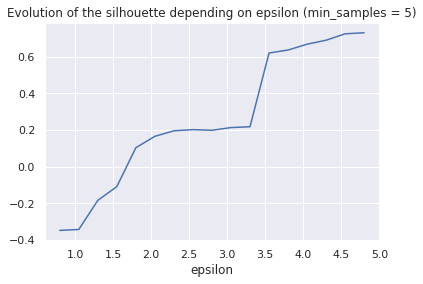

Epsilon  ...                             Distribution of points
0      0.80  ...                              [6, 6, 8, 5, 4, 7, 7]
1      1.05  ...           [769, 4, 4, 5, 7, 4, 11, 8, 5, 3, 10, 5]
2      1.30  ...  [71, 12, 2011, 7, 5, 3, 18, 10, 5, 5, 4, 5, 5,...
3      1.55  ...  [162, 5, 2958, 28, 8, 8, 17, 4, 5, 6, 5, 3, 5,...
4      1.80  ...                    [247, 7, 3, 3452, 28, 23, 5, 4]
5      2.05  ...                           [298, 4, 3658, 29, 5, 5]
6      2.30  ...                             [331, 3741, 31, 12, 4]
7      2.55  ...                                        [358, 3824]
8      2.80  ...                                     [374, 3849, 5]
9      3.05  ...                                        [383, 3871]
10     3.30  ...                                        [390, 3879]
11     3.55  ...                                             [4285]
12     3.80  ...                                             [4291]
13     4.05  ...                                             [4301]
14     4.30  ...                                             [4309]
15     4.55  ...                                             [4316]
16     4.80  ...                                             [4317]

[17 rows x 5 columns]

In [23]:
# vary the value of epsilon between 0.8 and 4 for min_samples = 5

epsilon = np.linspace(0.8,4.8,17)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=5).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 5)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 5)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(17)

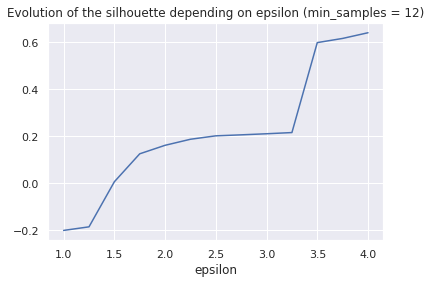

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.00             1        4119   -0.200988                  [217]
1      1.25             3        3027   -0.185736         [1288, 10, 11]
2      1.50             3        1895    0.006210          [95, 2337, 9]
3      1.75             4        1034    0.125097    [191, 3086, 11, 14]
4      2.00             4         568    0.161325    [254, 3481, 21, 12]
5      2.25             3         330    0.187055        [303, 3675, 28]
6      2.50             3         214    0.201627        [343, 3750, 29]
7      2.75             2         162    0.205812            [361, 3813]
8      3.00             2          99    0.210468            [377, 3860]
9      3.25             2          78    0.215507            [386, 3872]
10     3.50             1          64    0.598461                 [4272]
11     3.75             1          56    0.616242                 [4280]
12     4.00             1          46    0.640422                 [4290]

In [24]:
# vary the value of epsilon between 1 and 4 for min_samples = 12

epsilon = np.linspace(1,4,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    dbsc = DBSCAN(eps=k, min_samples=12).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc12 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})

#Graph showing the evolution of the silhouette depending on epsilon (min_samples = 12)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 12)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc12.head(15)

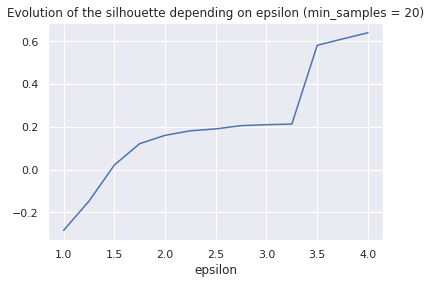

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.00             1        4306   -0.283992                   [30]
1      1.25             2        3403   -0.147332              [918, 15]
2      1.50             2        2275    0.021531             [21, 2040]
3      1.75             2        1302    0.121839            [162, 2872]
4      2.00             2         753    0.160567            [229, 3354]
5      2.25             2         461    0.181909            [285, 3590]
6      2.50             3         280    0.190769        [321, 3715, 20]
7      2.75             3         180    0.205845        [355, 3774, 27]
8      3.00             2         124    0.210526            [374, 3838]
9      3.25             2          97    0.213220            [381, 3858]
10     3.50             1          75    0.581559                 [4261]
11     3.75             1          59    0.611529                 [4277]
12     4.00             1          46    0.640422                 [4290]

In [25]:
# vary the value of epsilon between 1 and 4 for min_samples = 20
epsilon = np.linspace(1,4,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples_mask = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples_mask[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon
    
df_dbsc20 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                          'Distribution of points': n_points_epsilon})

#graph showing evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc20.head(15)

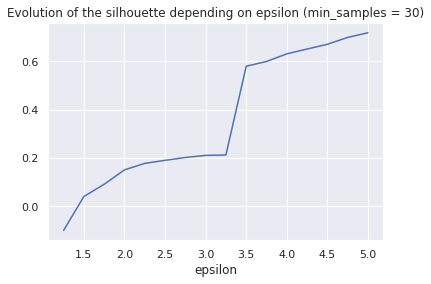

Epsilon  Nbr_Clusters  Nbr_noises  Silhouette Distribution of points
0      1.25             1        3616   -0.100343                  [720]
1      1.50             1        2561    0.040163                 [1775]
2      1.75             2        1572    0.090841             [93, 2671]
3      2.00             2         886    0.150412            [202, 3248]
4      2.25             2         533    0.177552            [271, 3532]
5      2.50             2         373    0.189961            [308, 3655]
6      2.75             2         239    0.201822            [342, 3755]
7      3.00             2         159    0.210585            [369, 3808]
8      3.25             2         114    0.212250            [378, 3844]
9      3.50             1          76    0.580006                 [4260]
10     3.75             1          65    0.599713                 [4271]
11     4.00             1          51    0.631371                 [4285]
12     4.25             1          44    0.651379                 [4292]
13     4.50             1          35    0.670997                 [4301]
14     4.75             1          27    0.699408                 [4309]
15     5.00             1          23    0.718867                 [4313]

In [26]:
# vary the value of epsilon between 1.25 and 5 for min_samples = 30
epsilon = np.linspace(1.25,5,16)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=30).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)
    
# Dataframe with Nbr_Clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc30 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                          'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
# Graph showing the evolution of the silhouette depending on epsilon (min_samples = 30)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 30)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc30.head(20)

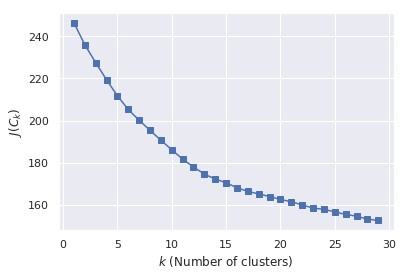

In [27]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

inertia = []

for k in range(1,30):
    model = KMeans(n_clusters=k, random_state=0).fit(df_standard)
    inertia.append(np.sqrt(model.inertia_))
    
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

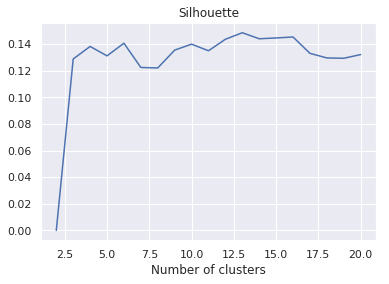

In [28]:
# Vary the number of clusters between 2 and 20
res =  np.arange(19,dtype="double")

for k in np.arange(1,19):
    km = KMeans(n_clusters=k+1, random_state=0).fit(df_standard)
    res[k] = metrics.silhouette_score(df_standard,km.labels_)
    
#graph

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,21,1),res)
plt.show()

In [29]:
#Clustering with K-means algorithm

for n_cluster in [3,4,5,6,7,8,9,12,13]:
    model = KMeans(n_clusters=n_cluster, random_state=0).fit(df_standard)
    idk = model.labels_
    dict_nbr_points = {j: ("Number of points = %d" % (len(np.where(idk == j)[0])))
                       for j in range(model.n_clusters)}
    print('Number of clusters: %d' % n_cluster)
    print(dict_nbr_points)
    print('------------------------')

Number of clusters: 3
{0: 'Number of points = 2762', 1: 'Number of points = 1137', 2: 'Number of points = 437'}
------------------------
Number of clusters: 4
{0: 'Number of points = 735', 1: 'Number of points = 922', 2: 'Number of points = 2265', 3: 'Number of points = 414'}
------------------------
Number of clusters: 5
{0: 'Number of points = 755', 1: 'Number of points = 923', 2: 'Number of points = 2231', 3: 'Number of points = 382', 4: 'Number of points = 45'}
------------------------
Number of clusters: 6
{0: 'Number of points = 1135', 1: 'Number of points = 380', 2: 'Number of points = 554', 3: 'Number of points = 866', 4: 'Number of points = 43', 5: 'Number of points = 1358'}
------------------------
Number of clusters: 7
{0: 'Number of points = 420', 1: 'Number of points = 1171', 2: 'Number of points = 798', 3: 'Number of points = 377', 4: 'Number of points = 1007', 5: 'Number of points = 524', 6: 'Number of points = 39'}
------------------------
Number of clusters: 8
{0: 'Num

In [0]:
def hist_kmeans_clusters(n):
    ''' For each feature this fonction plot histograms of your kmeans model's clusters.
    
    Parameters:
      
        n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Invoices', 'Average_Products_Invoice',
              'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
              'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
              'Kitchen Department', 'Handcraft & Clothes Department',
              'Design & Viantage_Decoration Department']:
        print(df_customers[i].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
               transform=ax.transAxes)
            plt.title(i)
            plt.show()

        print('---------------------------------------------------------')

    for j in ['Last_Date', 'First_Date']:
        print(df_customers[j].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[j][index].mean()
            Median = df_customers[j][index].median()
            plt.hist(df_customers[j][index], bins = 30)
            plt.text(0.75, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.75, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red', alpha=0.5),
               transform=ax.transAxes)
            plt.title(j)
            plt.show()

        print('---------------------------------------------------------')  

In [0]:
def df_kmeans_clusters(n):
    ''' Show a dataframe with the average percentage difference betwean the mean of each feature
    and the value of each point for each kmeans model's clusters.
    
    Parameters:
      
         n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [(len(np.where(idk == j)[0])) for j in 
                                        range(model.n_clusters)]

    for h, i in enumerate(['Count_Invoices', 'Average_Products_Invoice',
                           'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
                           'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
                           'Kitchen Department', 'Handcraft & Clothes Department',
                           'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date']):
        feature = []

        for id_cluster in range(model.n_clusters):
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
    
        my_dict[alphabet[h] + '/' + i] = feature
    
  
    feature = []
  
    for id_cluster in range(model.n_clusters):
        index = np.where(idk == id_cluster)[0]
        time_minutes = data["Time_Minutes"][index].mean()
        hour = time_minutes // 60
        minutes = time_minutes % 60
        feature.append("%d:%02d" % (hour, minutes))
      
    my_dict['N' + '/' + 'Average_Hour'] = feature
    Clusters_df = pd.DataFrame(my_dict)
  
    return Clusters_df.head(n)

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster 0


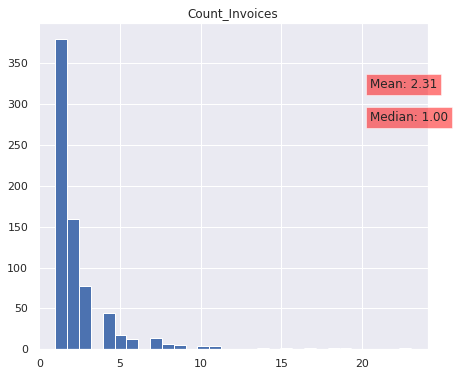

Cluster 1


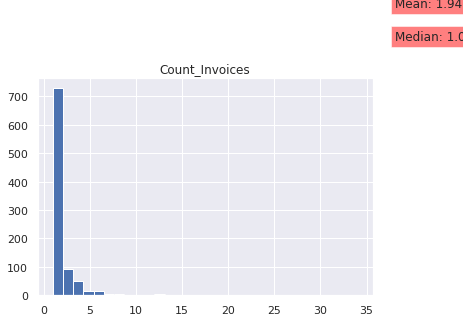

Cluster 2


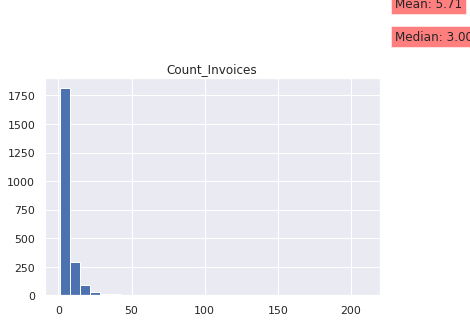

Cluster 3


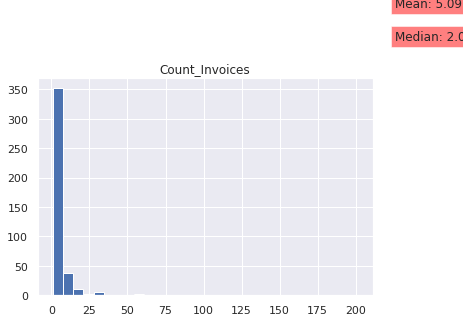

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster 0


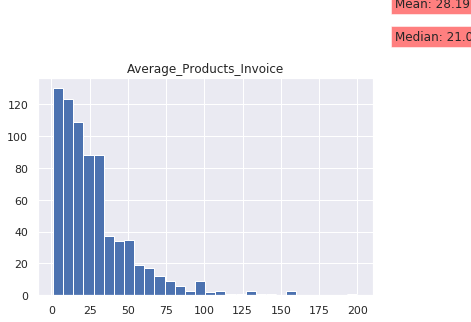

Cluster 1


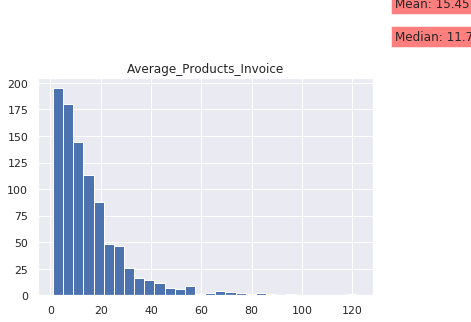

Cluster 2


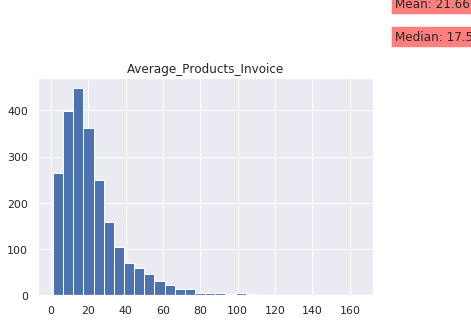

Cluster 3


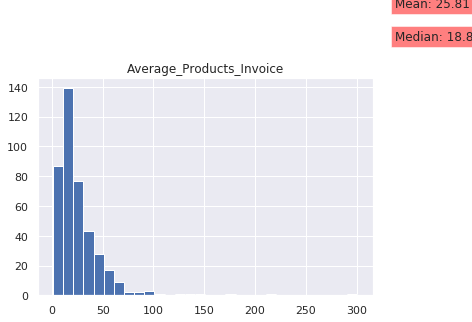

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster 0


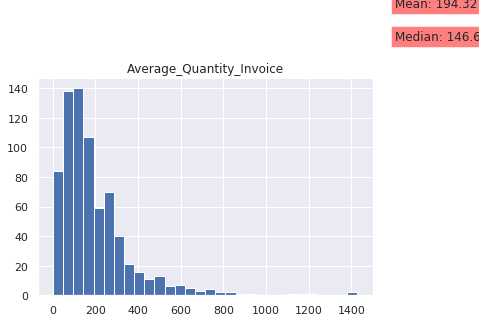

Cluster 1


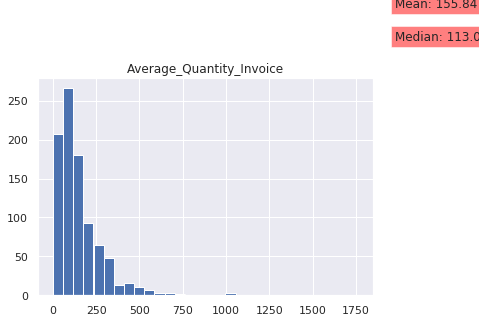

Cluster 2


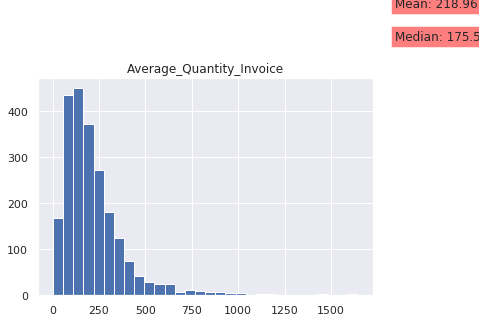

Cluster 3


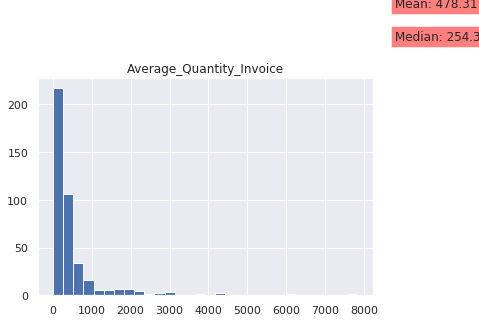

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster 0


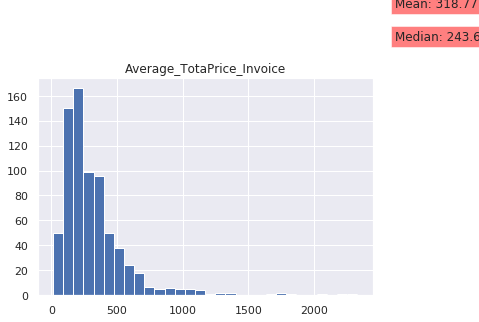

Cluster 1


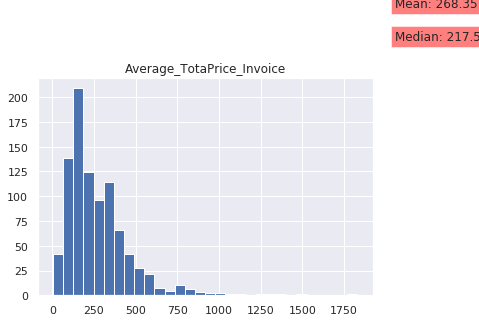

Cluster 2


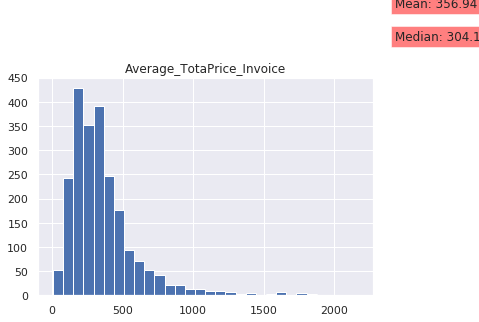

Cluster 3


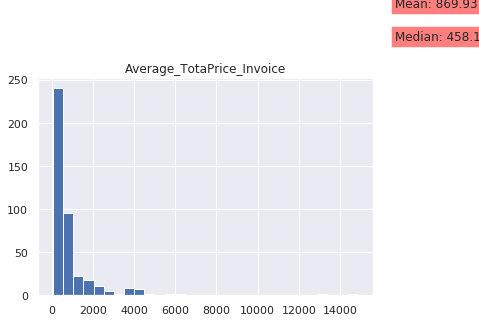

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster 0


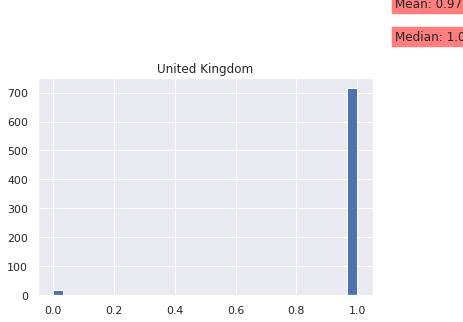

Cluster 1


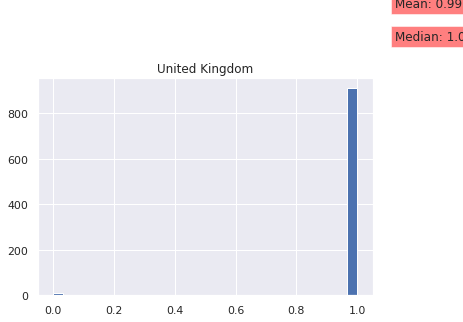

Cluster 2


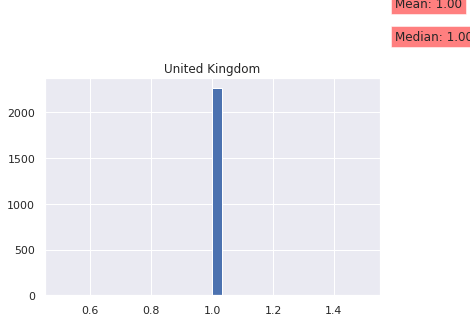

Cluster 3


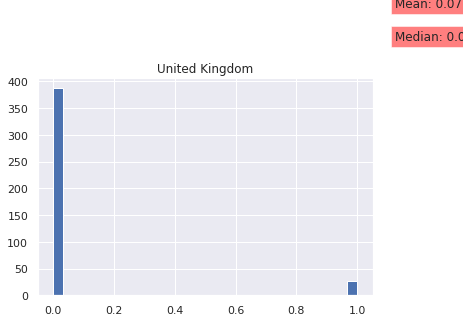

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster 0


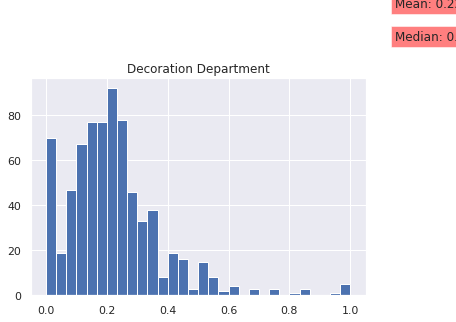

Cluster 1


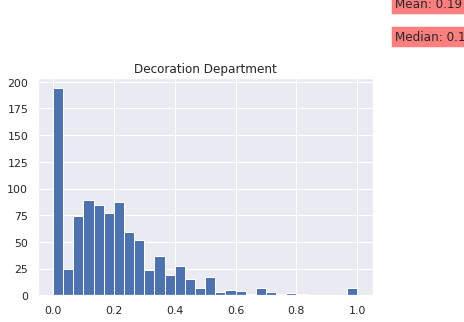

Cluster 2


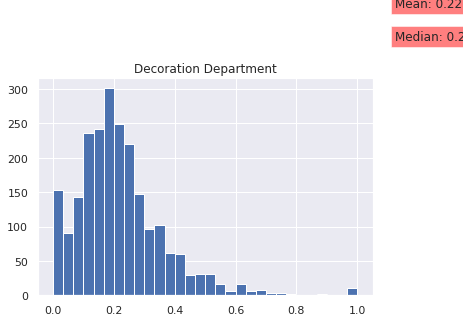

Cluster 3


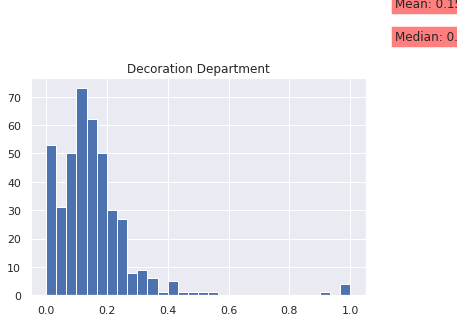

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster 0


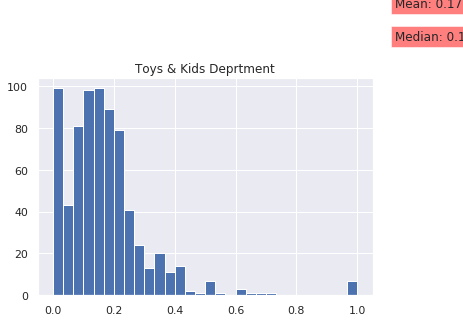

Cluster 1


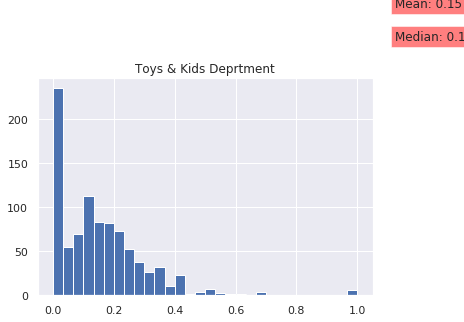

Cluster 2


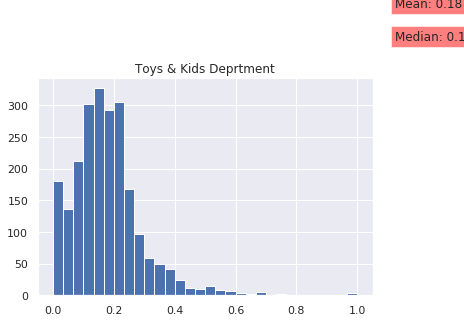

Cluster 3


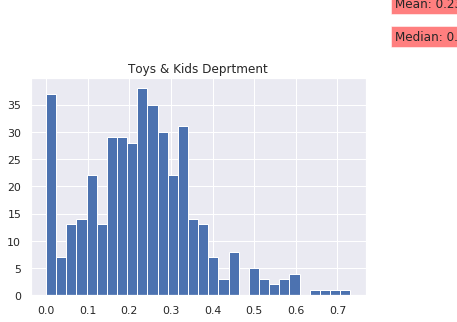

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster 0


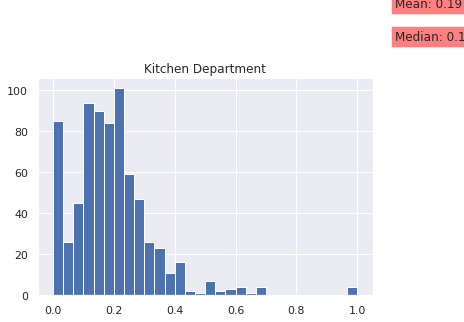

Cluster 1


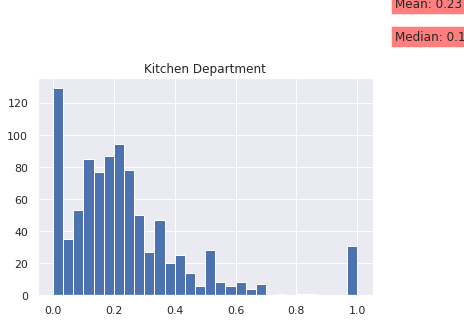

Cluster 2


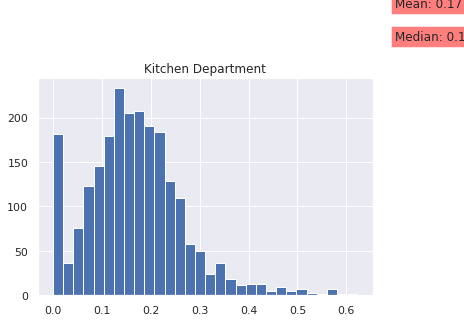

Cluster 3


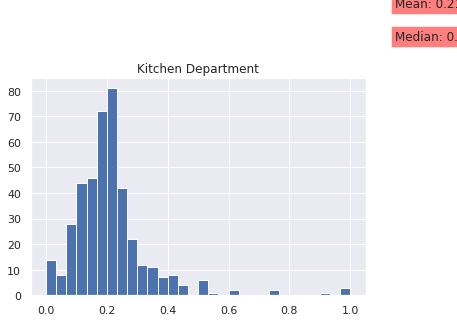

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster 0


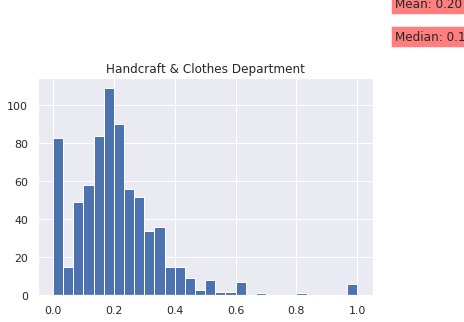

Cluster 1


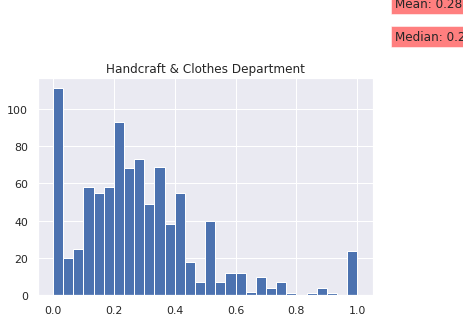

Cluster 2


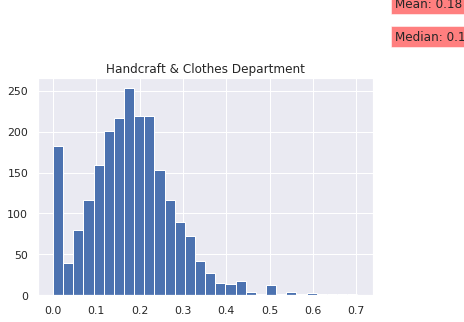

Cluster 3


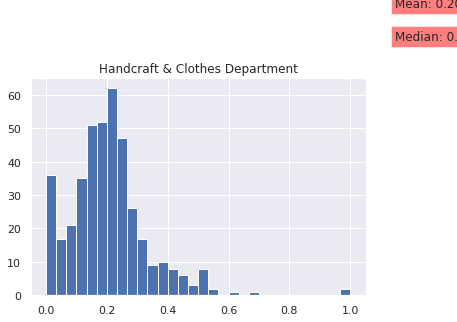

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster 0


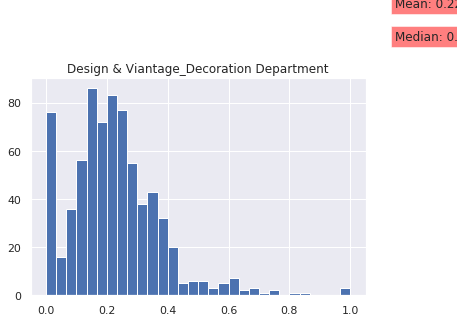

Cluster 1


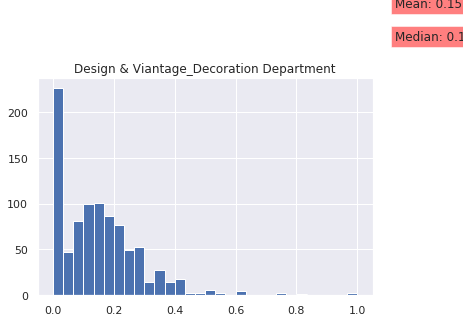

Cluster 2


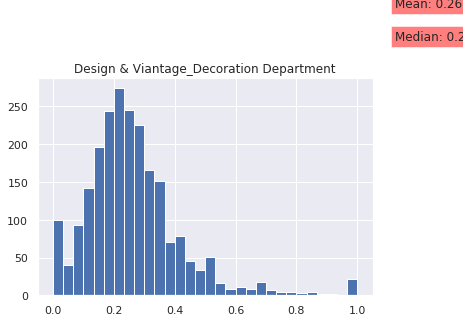

Cluster 3


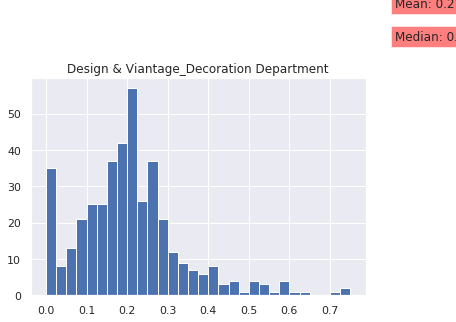

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64
Cluster 0


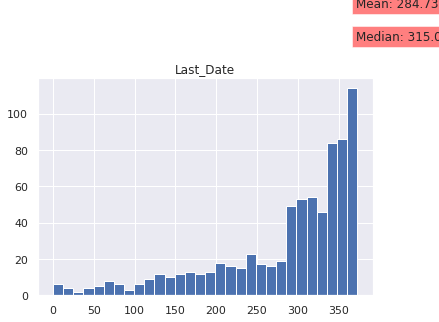

Cluster 1


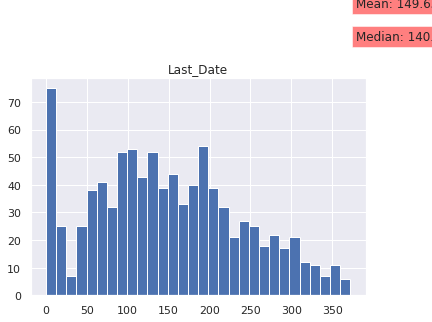

Cluster 2


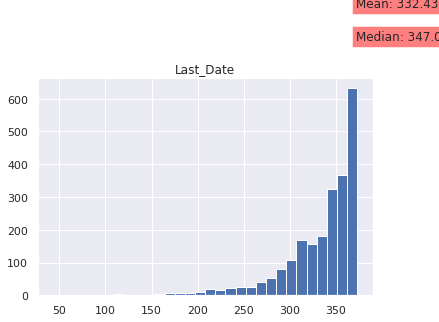

Cluster 3


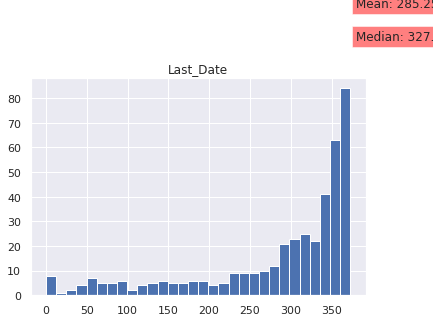

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64
Cluster 0


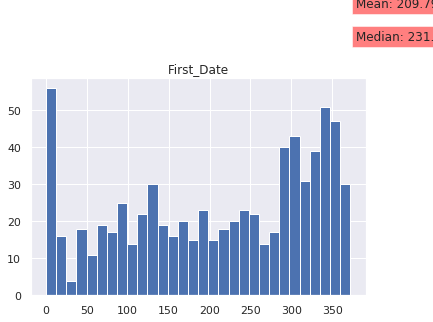

Cluster 1


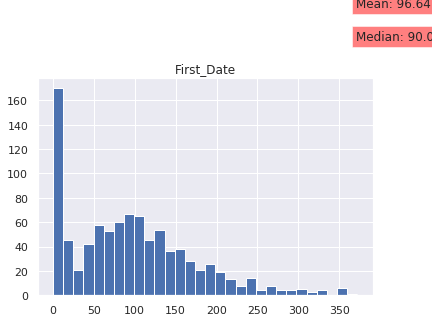

Cluster 2


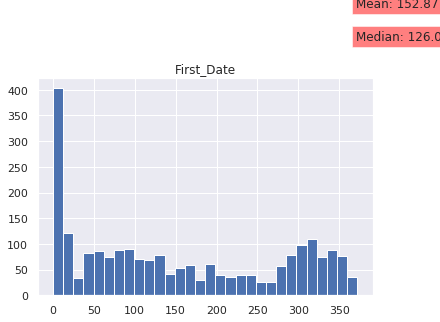

Cluster 3


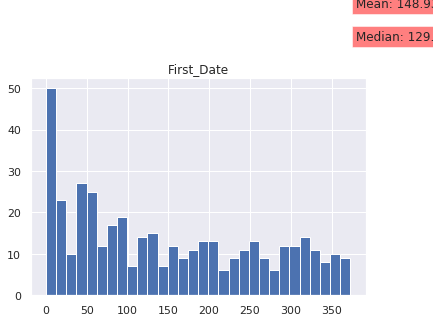

---------------------------------------------------------


In [32]:
hist_kmeans_clusters(4)

In [33]:
df_kmeans_clusters(4)

A/Number_Of_Customers B/Count_Invoices  ... M/First_Date N/Average_Hour
0                    735         -45.87 %  ...      39.68 %          13:27
1                    922         -54.54 %  ...     -35.65 %          13:33
2                   2265          33.59 %  ...       1.79 %          13:32
3                    414          19.15 %  ...      -0.84 %          10:46

[4 rows x 14 columns]

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster 0


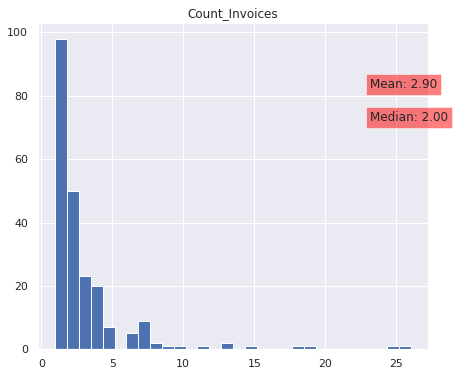

Cluster 1


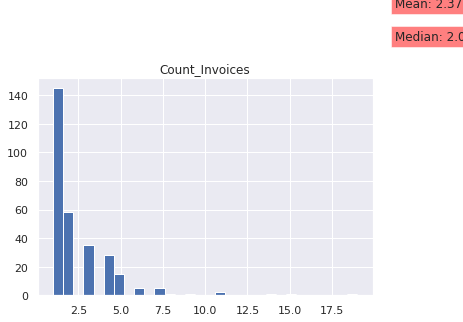

Cluster 2


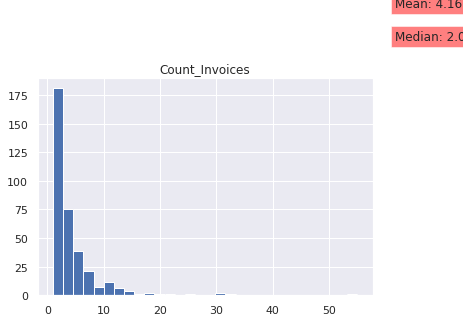

Cluster 3


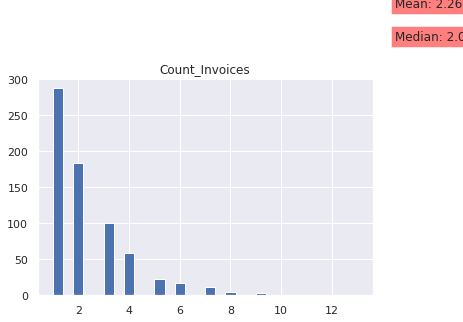

Cluster 4


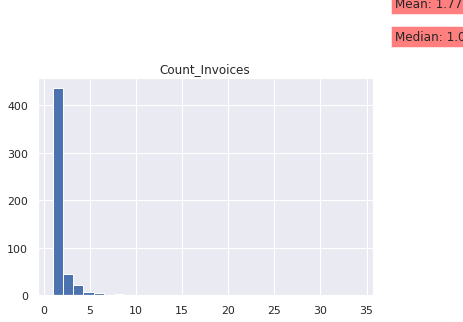

Cluster 5


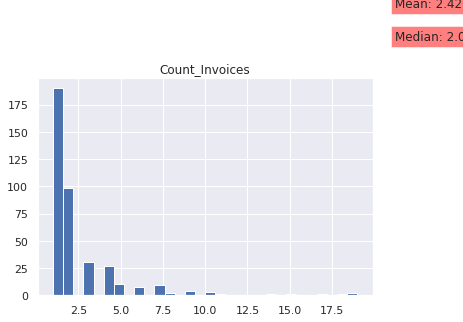

Cluster 6


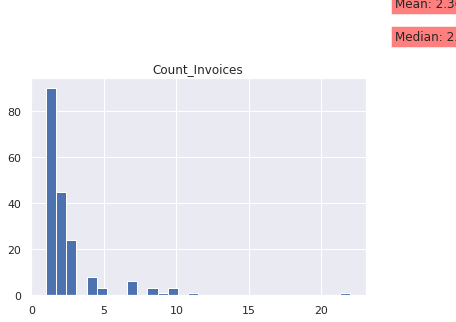

Cluster 7


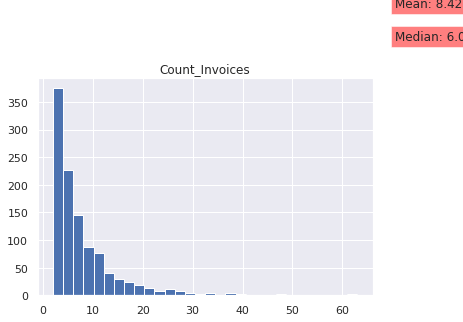

Cluster 8


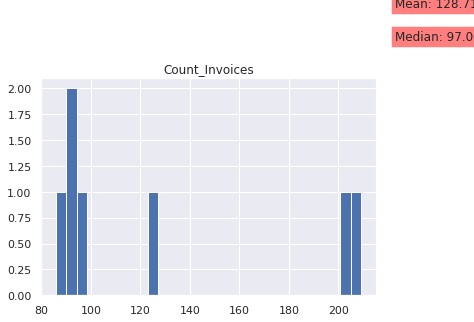

Cluster 9


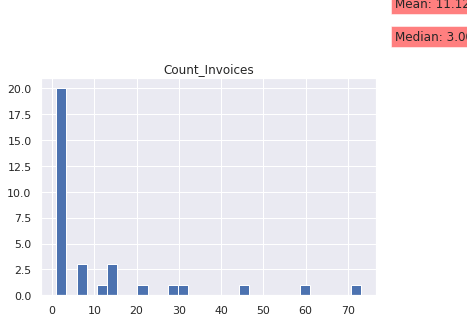

Cluster 10


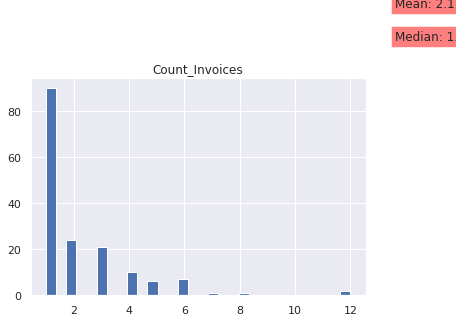

Cluster 11


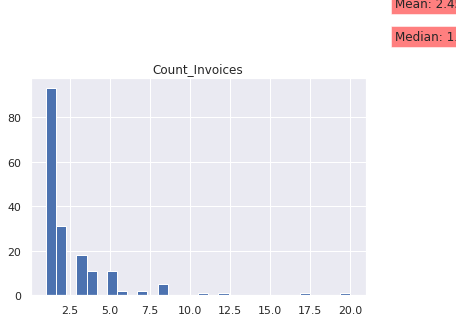

Cluster 12


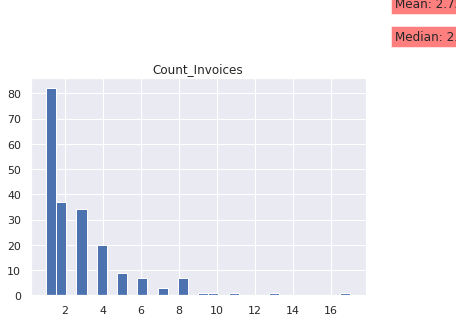

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster 0


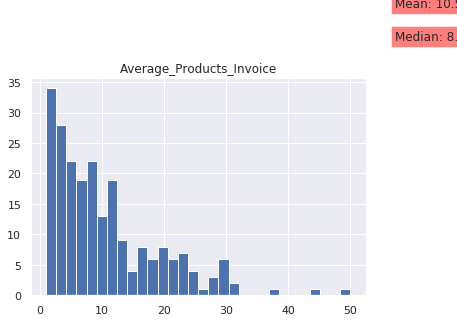

Cluster 1


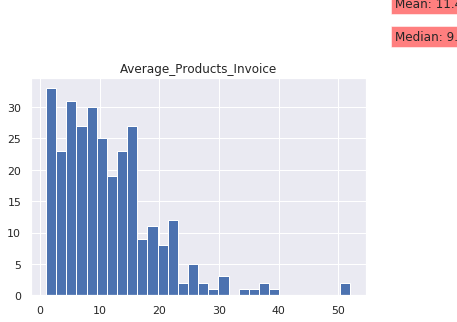

Cluster 2


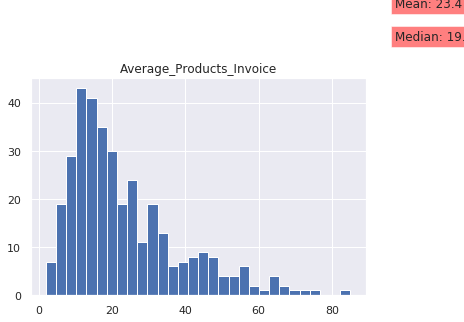

Cluster 3


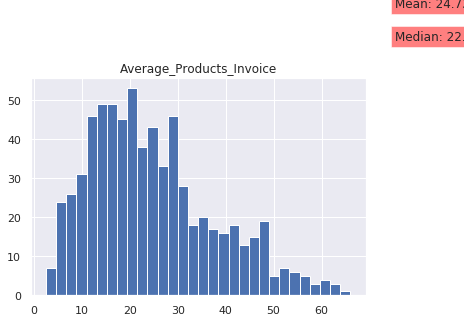

Cluster 4


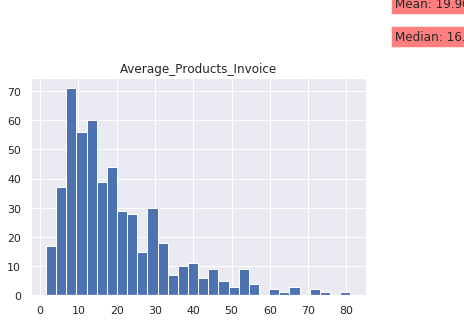

Cluster 5


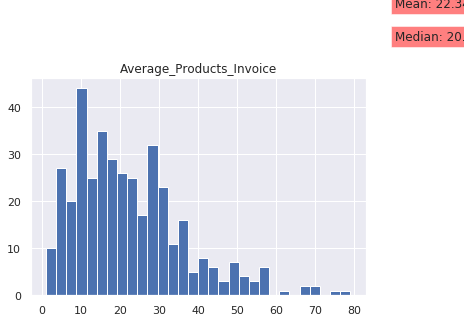

Cluster 6


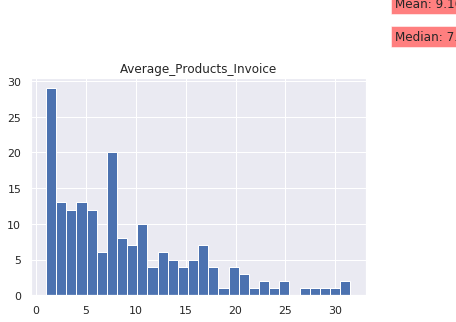

Cluster 7


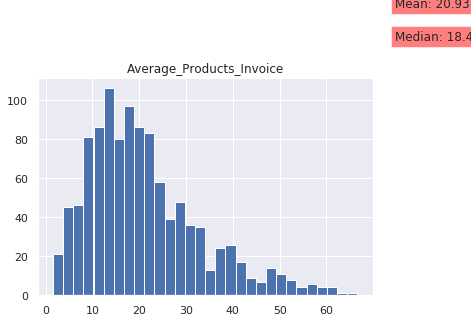

Cluster 8


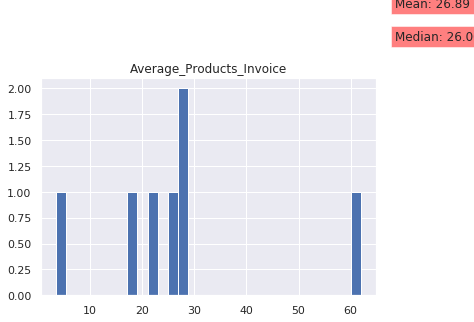

Cluster 9


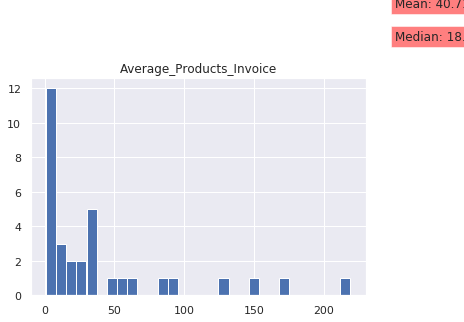

Cluster 10


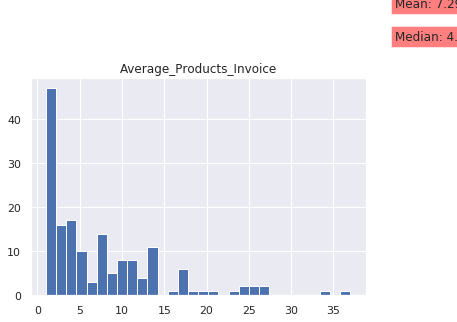

Cluster 11


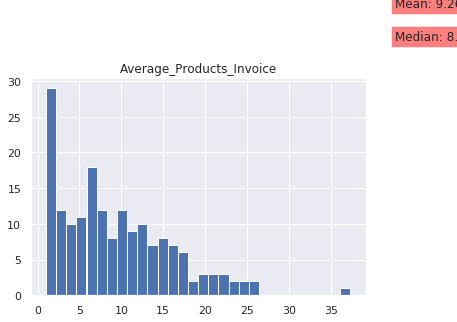

Cluster 12


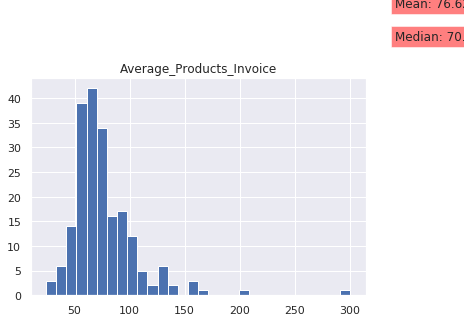

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster 0


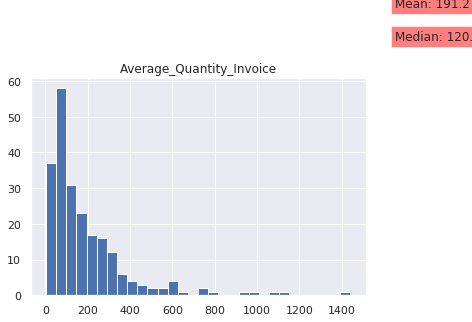

Cluster 1


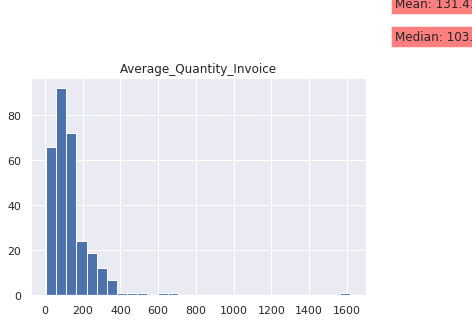

Cluster 2


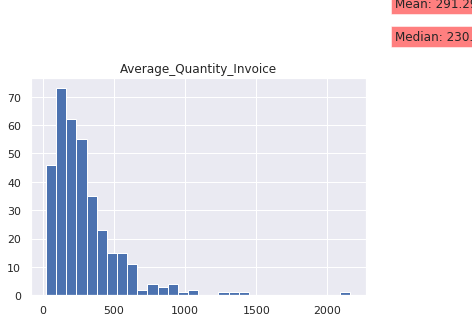

Cluster 3


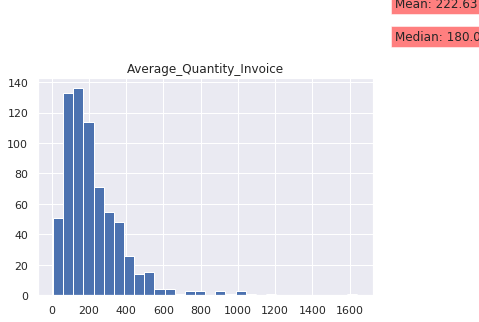

Cluster 4


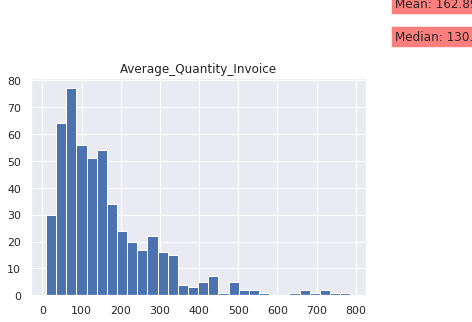

Cluster 5


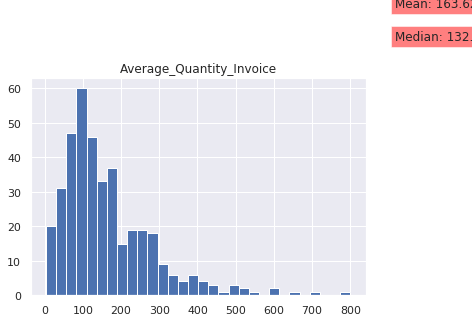

Cluster 6


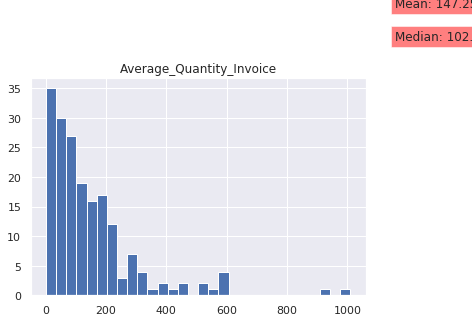

Cluster 7


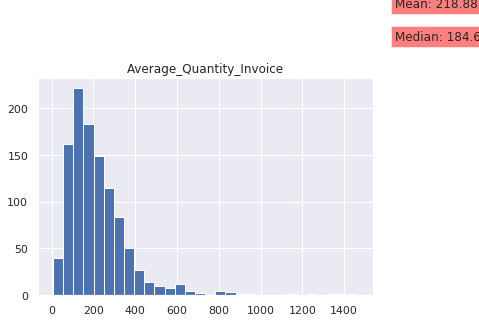

Cluster 8


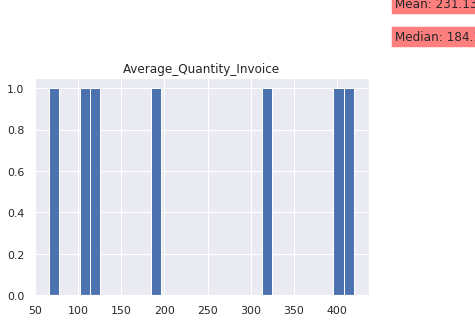

Cluster 9


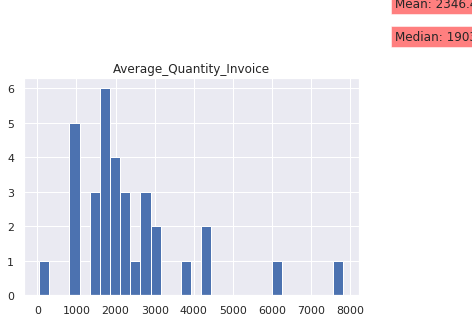

Cluster 10


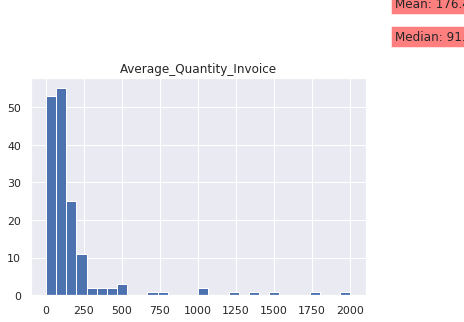

Cluster 11


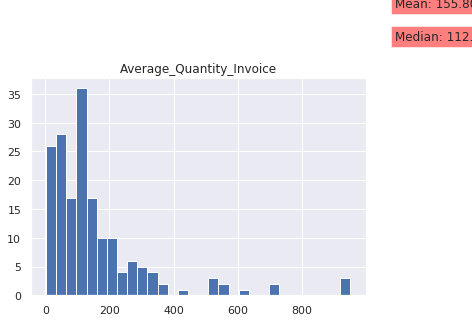

Cluster 12


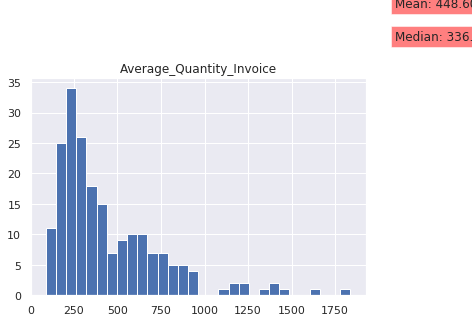

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster 0


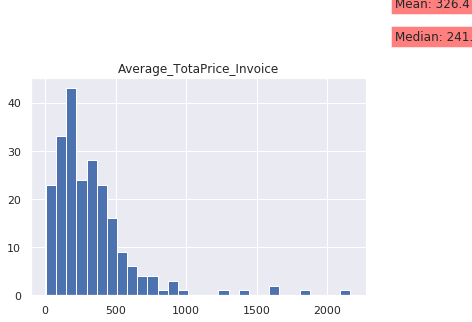

Cluster 1


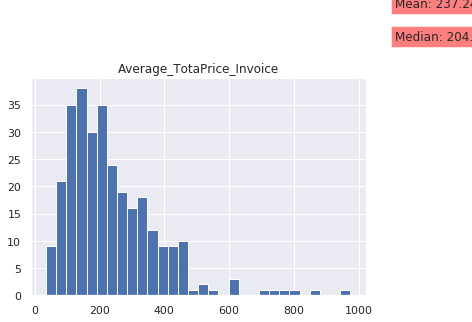

Cluster 2


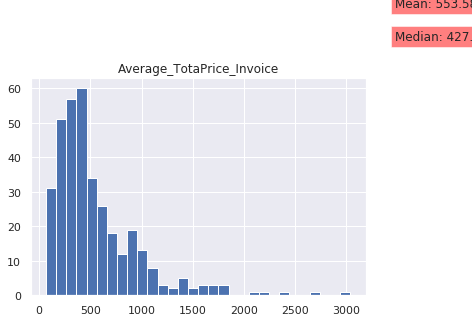

Cluster 3


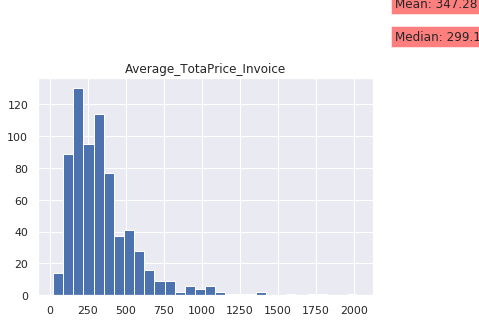

Cluster 4


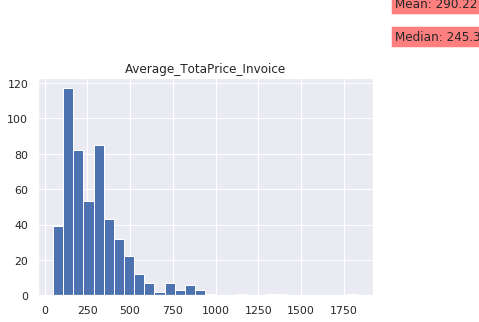

Cluster 5


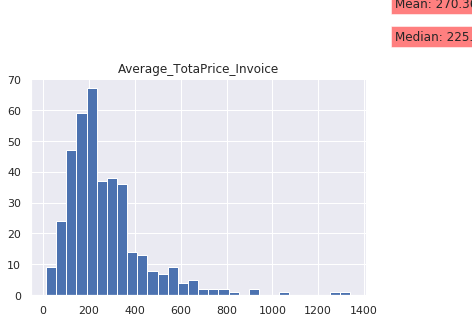

Cluster 6


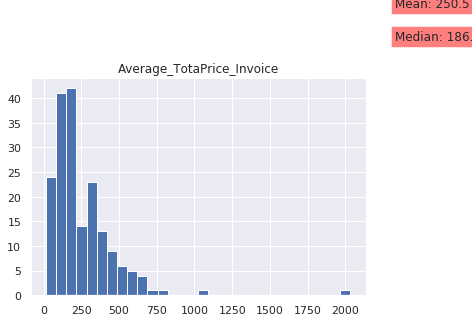

Cluster 7


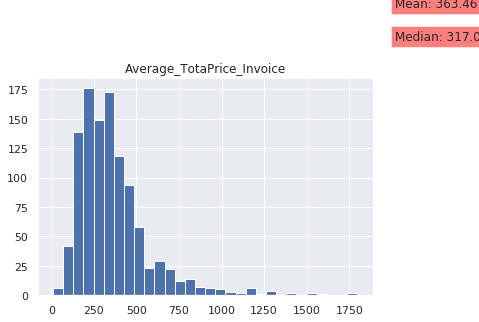

Cluster 8


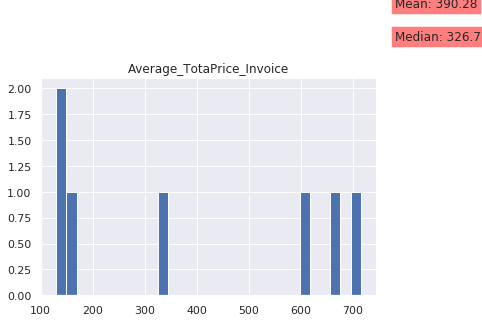

Cluster 9


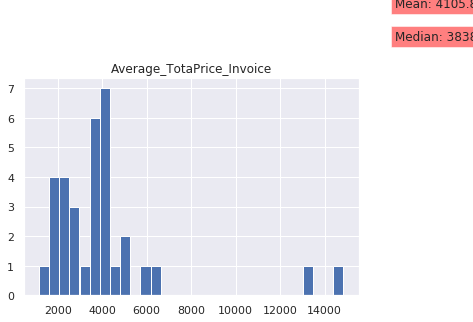

Cluster 10


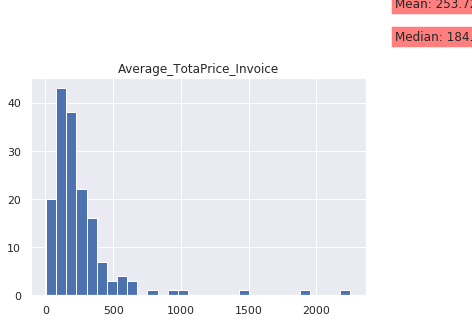

Cluster 11


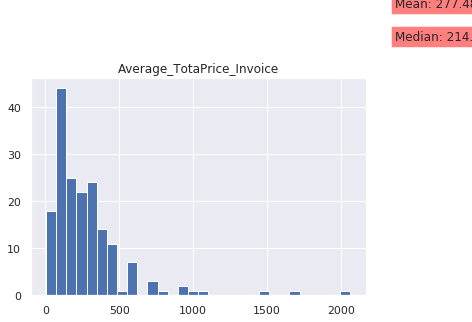

Cluster 12


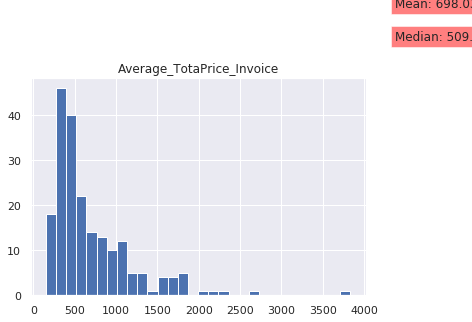

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster 0


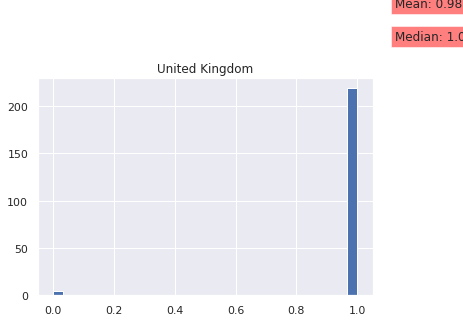

Cluster 1


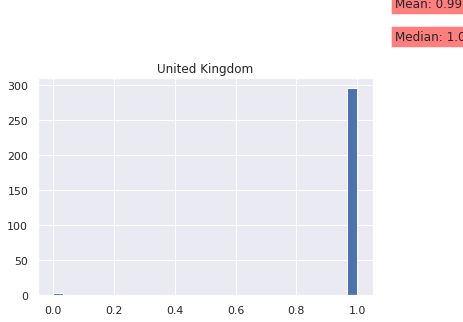

Cluster 2


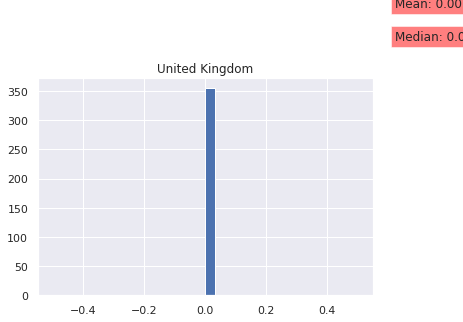

Cluster 3


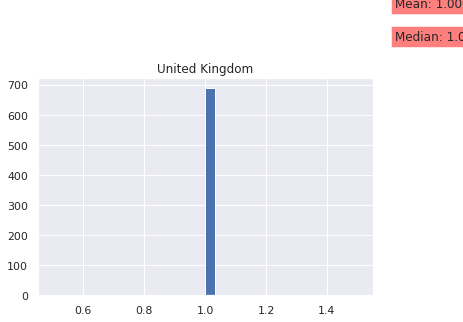

Cluster 4


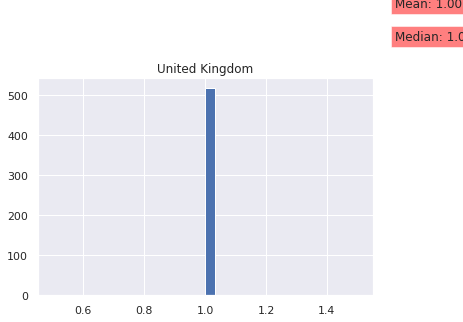

Cluster 5


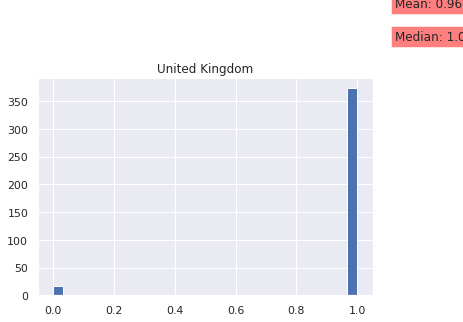

Cluster 6


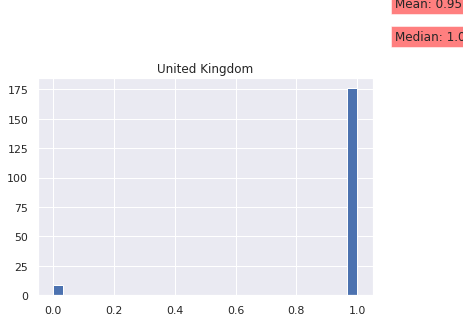

Cluster 7


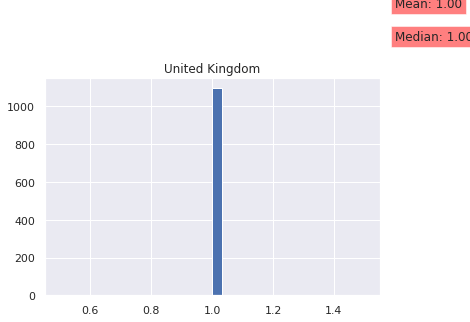

Cluster 8


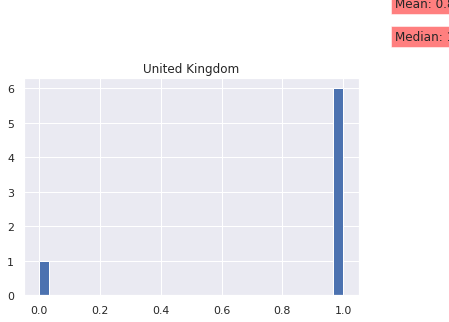

Cluster 9


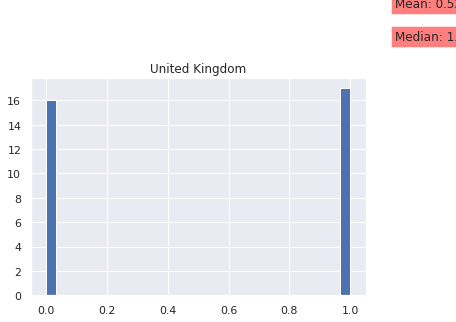

Cluster 10


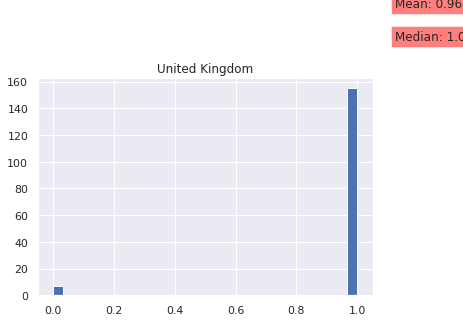

Cluster 11


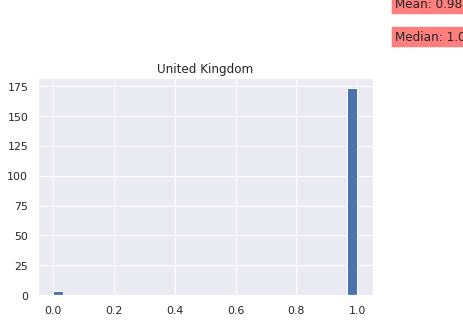

Cluster 12


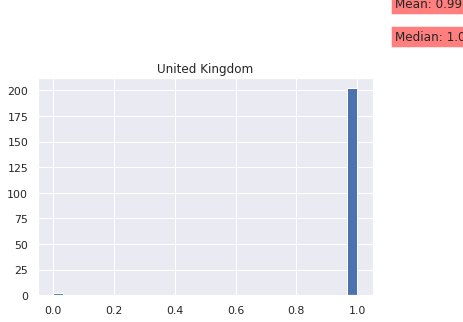

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster 0


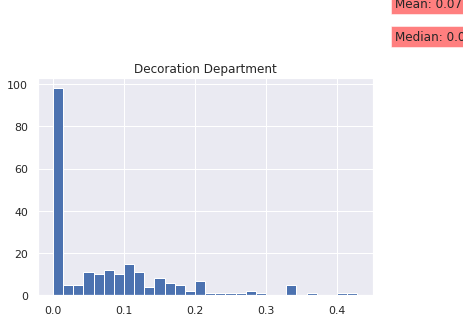

Cluster 1


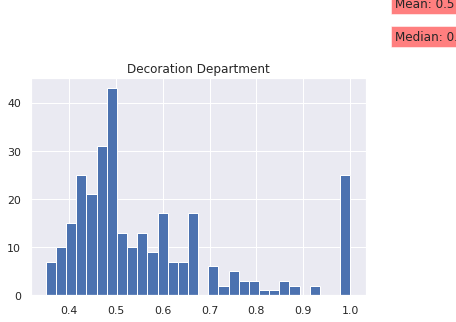

Cluster 2


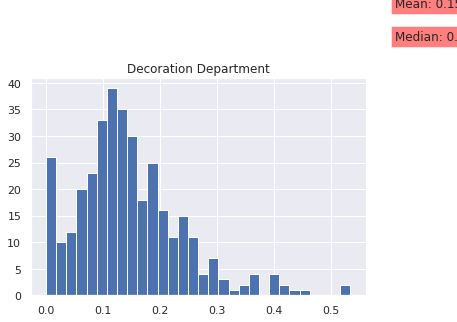

Cluster 3


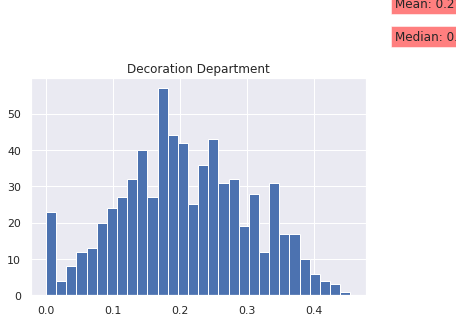

Cluster 4


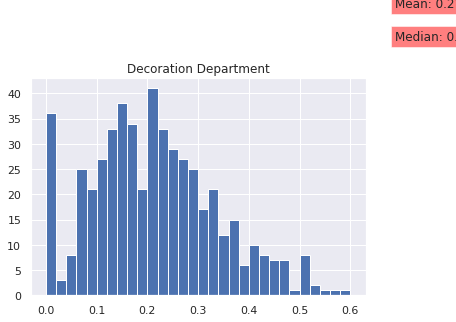

Cluster 5


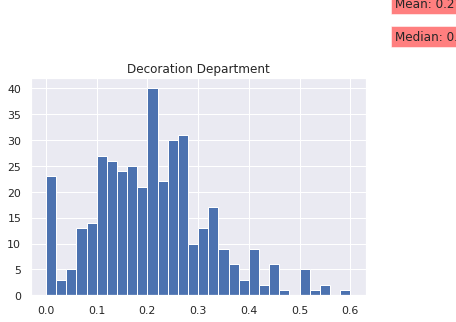

Cluster 6


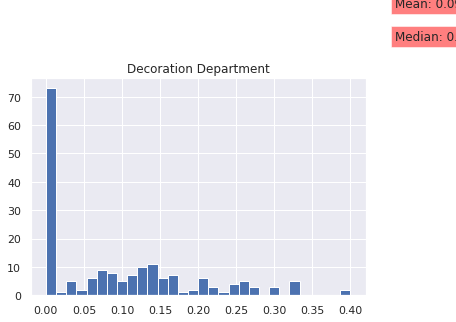

Cluster 7


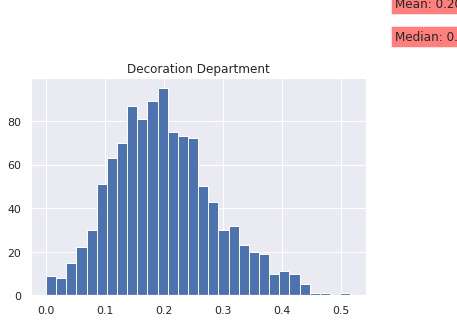

Cluster 8


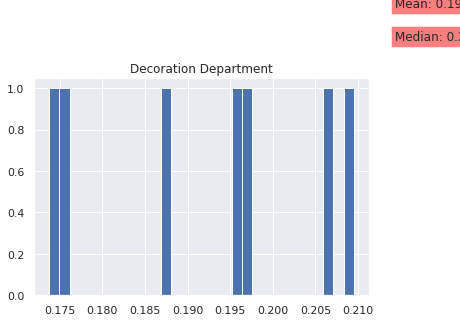

Cluster 9


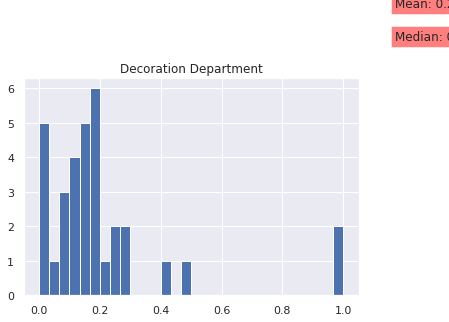

Cluster 10


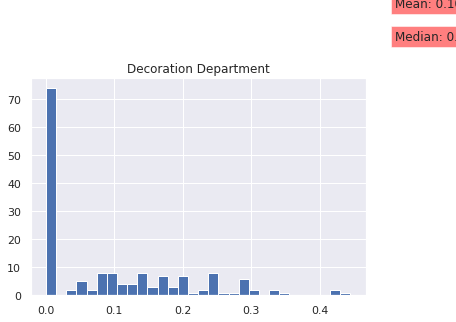

Cluster 11


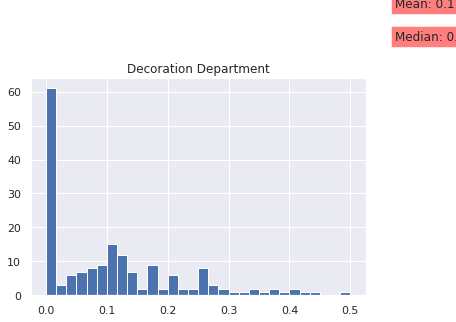

Cluster 12


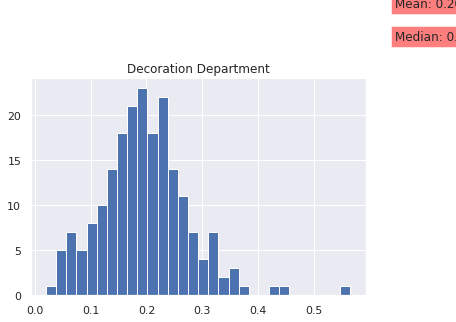

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster 0


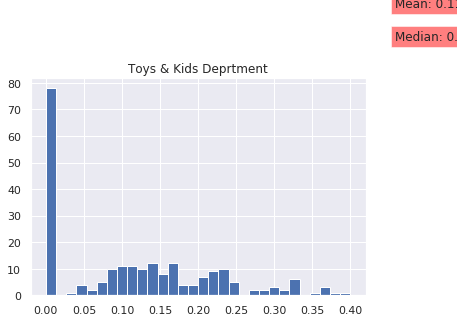

Cluster 1


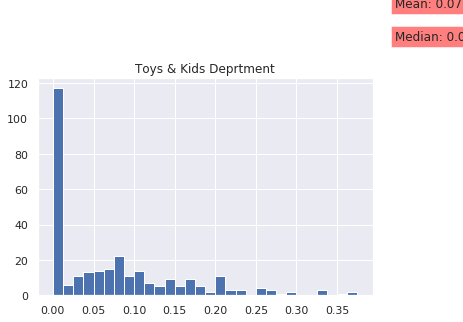

Cluster 2


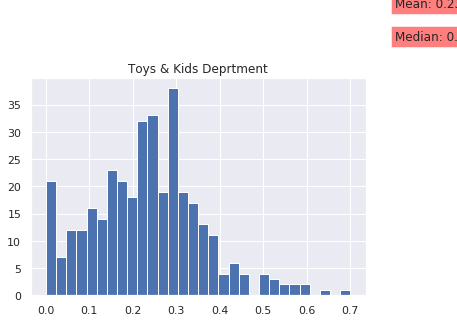

Cluster 3


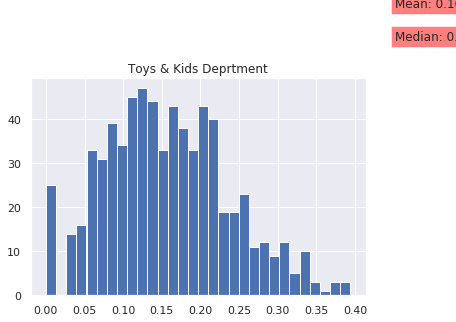

Cluster 4


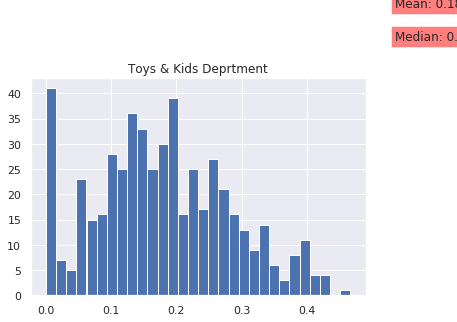

Cluster 5


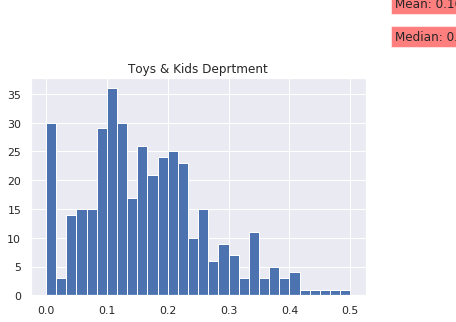

Cluster 6


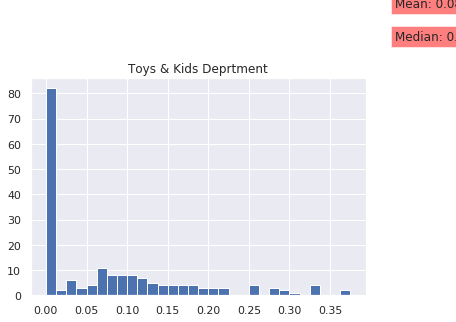

Cluster 7


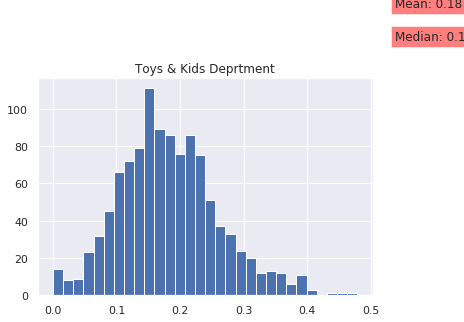

Cluster 8


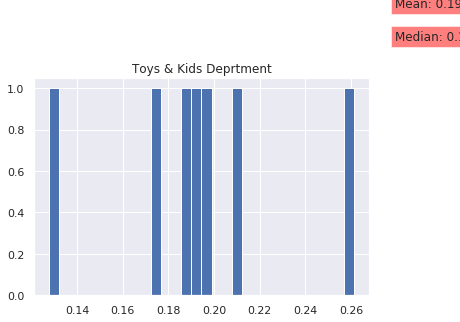

Cluster 9


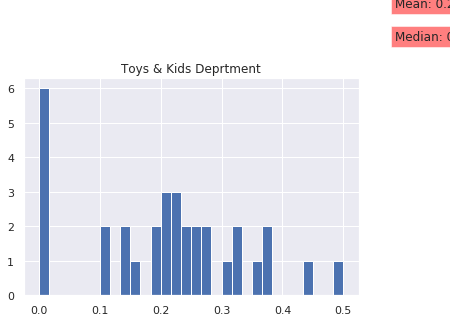

Cluster 10


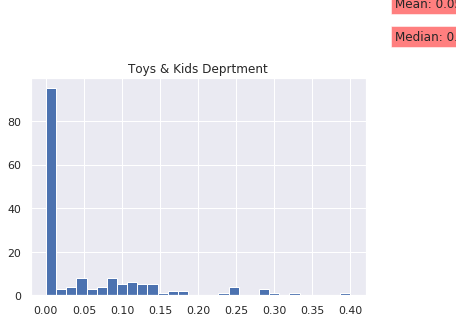

Cluster 11


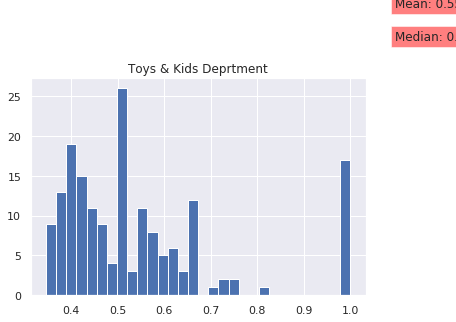

Cluster 12


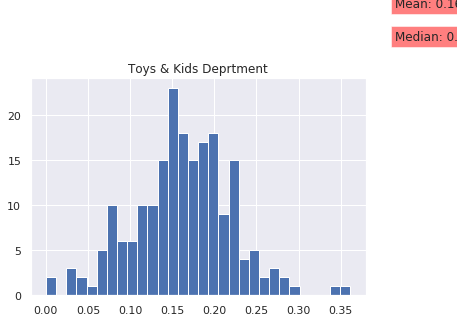

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster 0


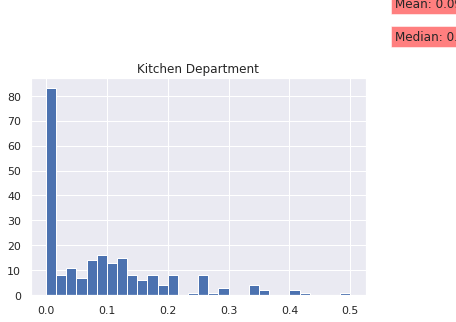

Cluster 1


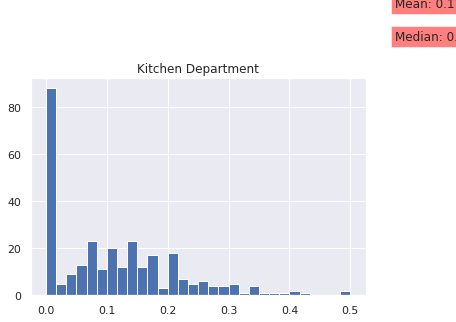

Cluster 2


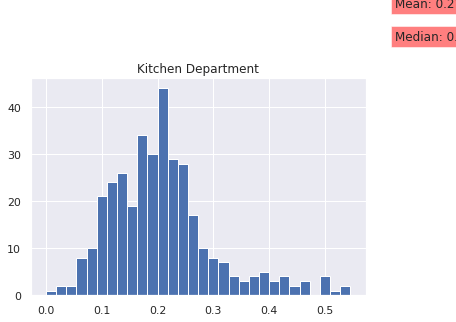

Cluster 3


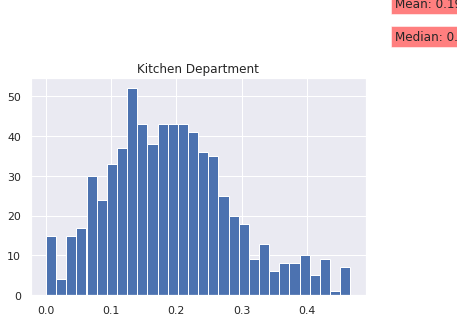

Cluster 4


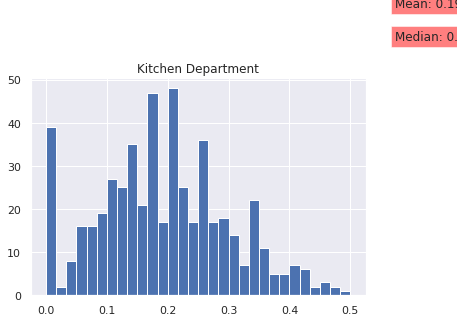

Cluster 5


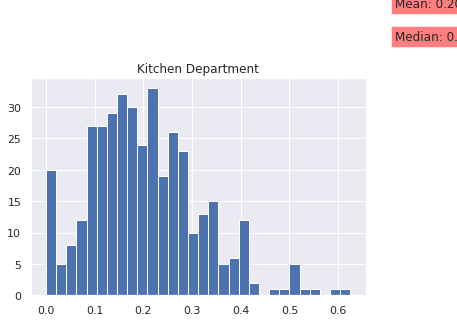

Cluster 6


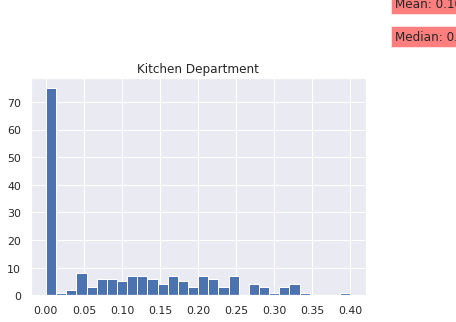

Cluster 7


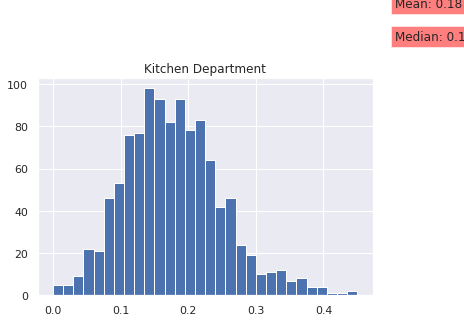

Cluster 8


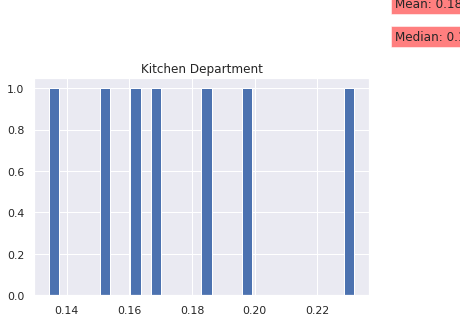

Cluster 9


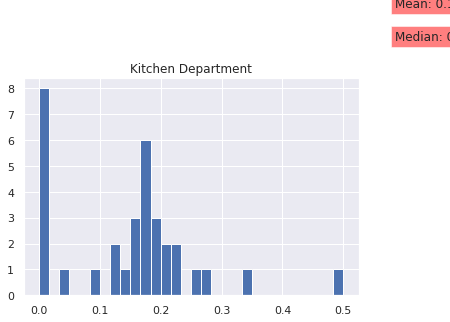

Cluster 10


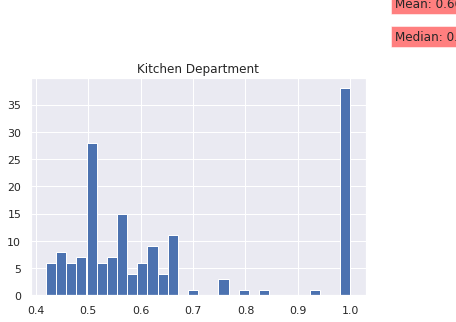

Cluster 11


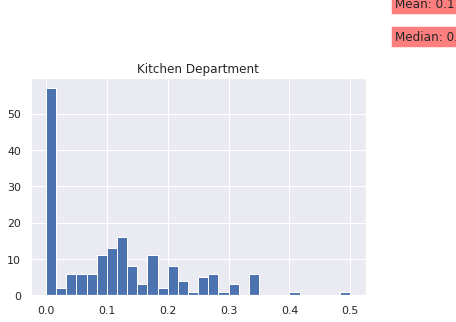

Cluster 12


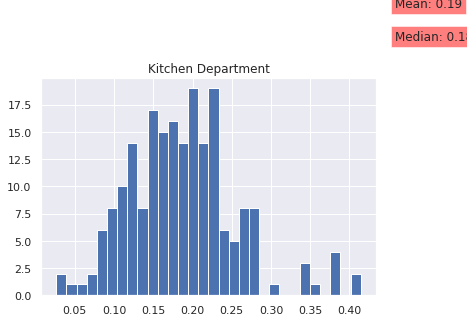

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster 0


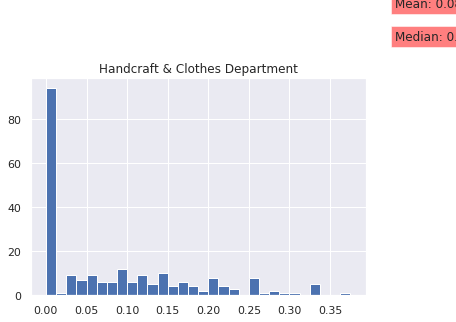

Cluster 1


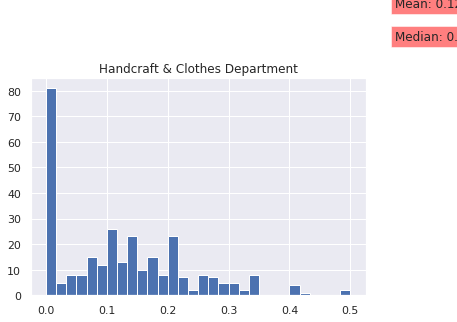

Cluster 2


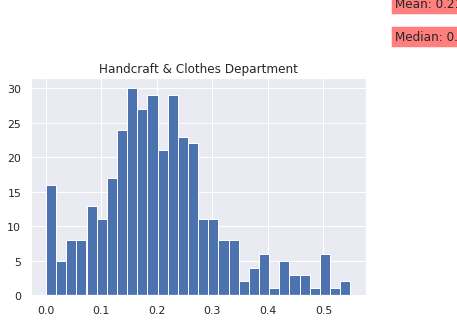

Cluster 3


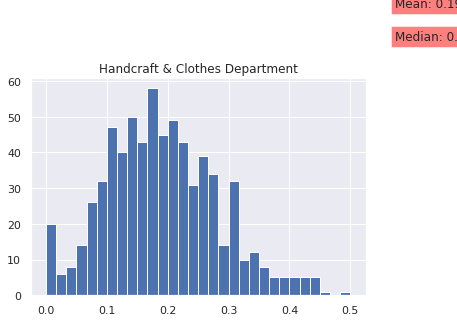

Cluster 4


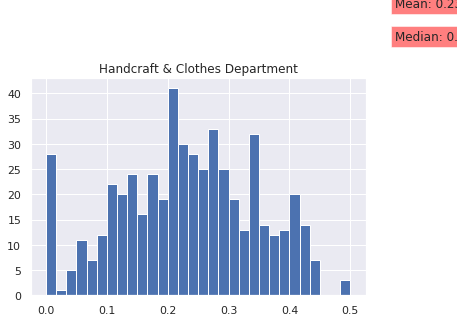

Cluster 5


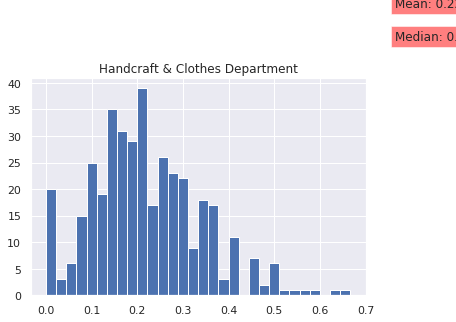

Cluster 6


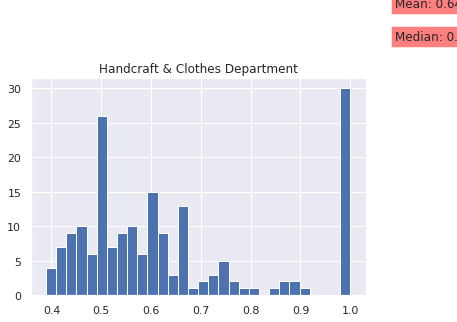

Cluster 7


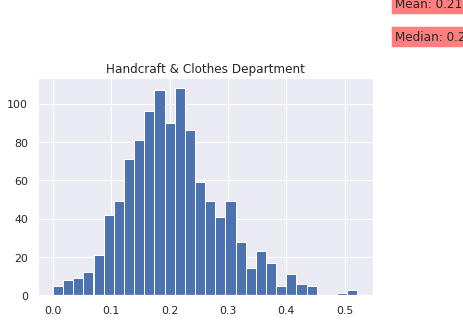

Cluster 8


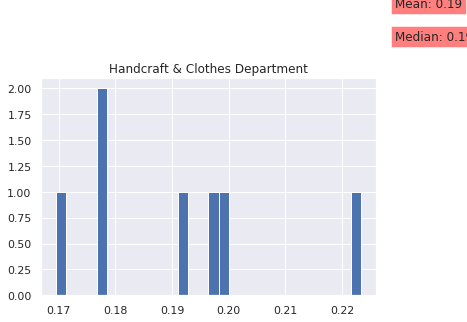

Cluster 9


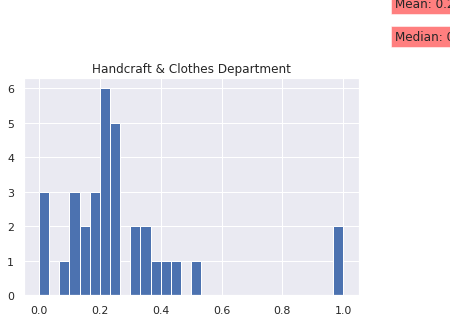

Cluster 10


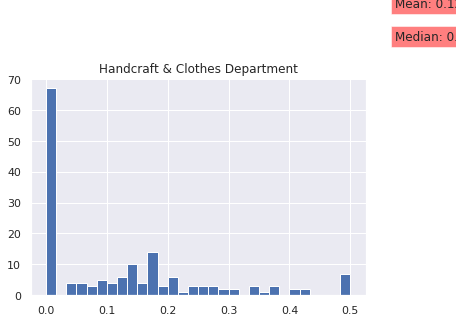

Cluster 11


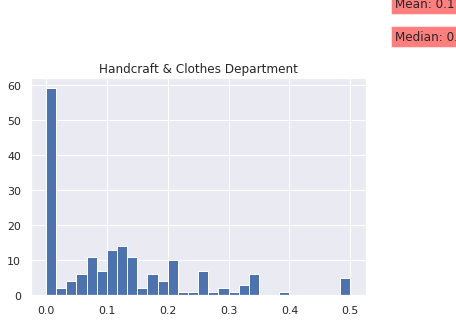

Cluster 12


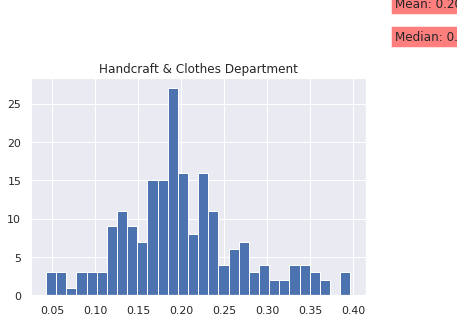

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster 0


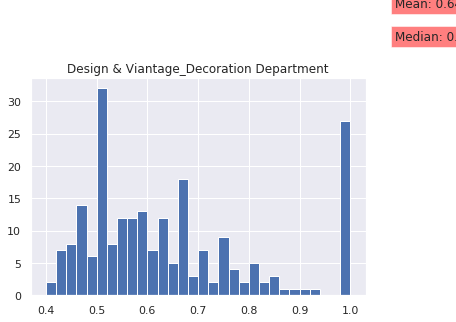

Cluster 1


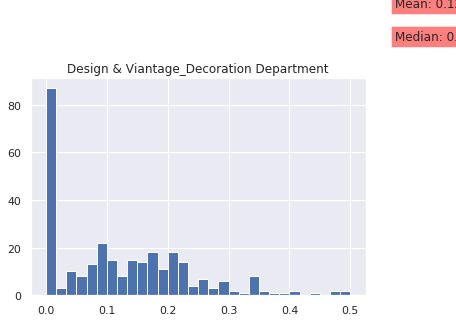

Cluster 2


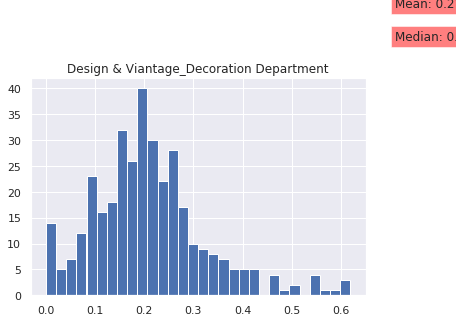

Cluster 3


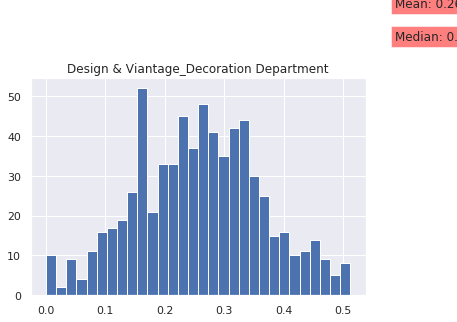

Cluster 4


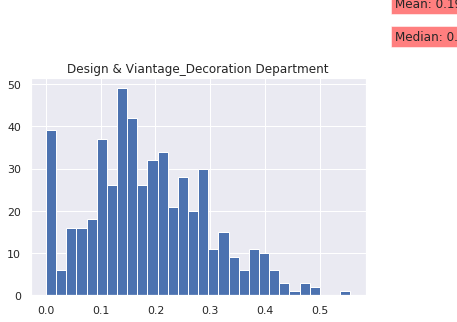

Cluster 5


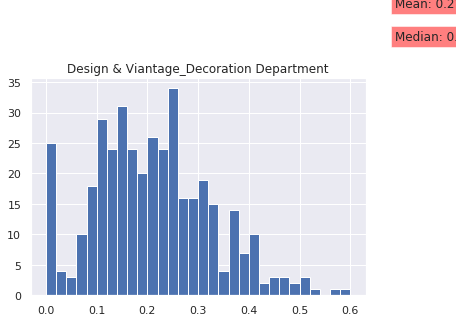

Cluster 6


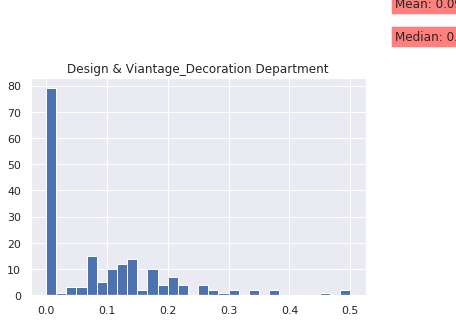

Cluster 7


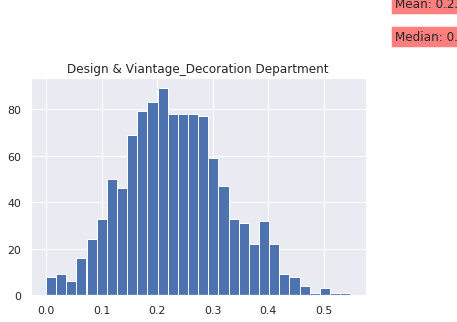

Cluster 8


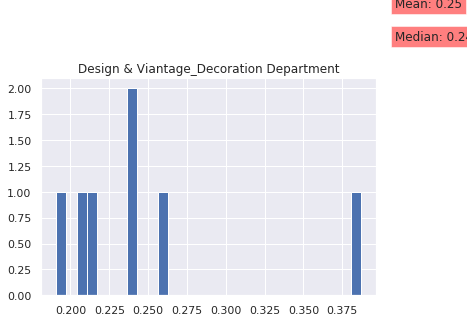

Cluster 9


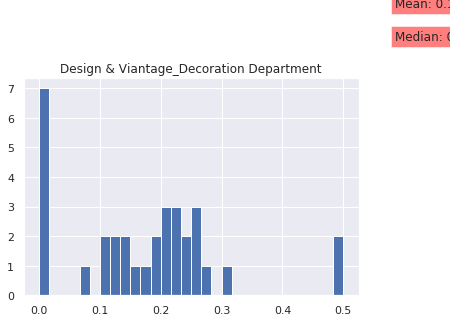

Cluster 10


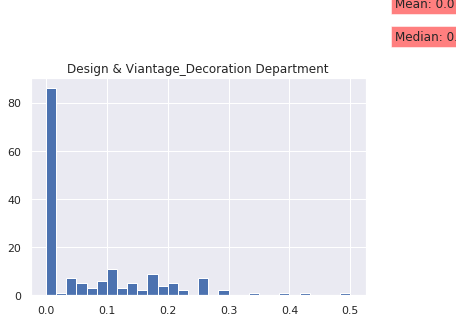

Cluster 11


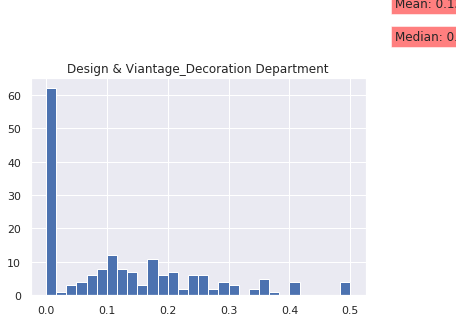

Cluster 12


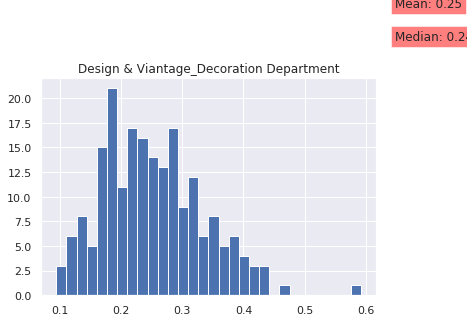

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64
Cluster 0


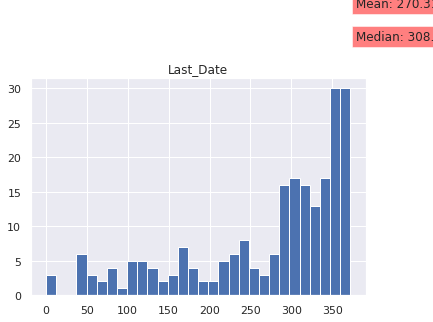

Cluster 1


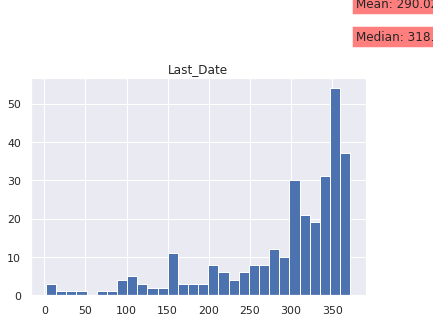

Cluster 2


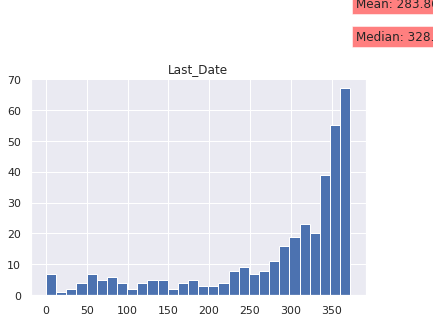

Cluster 3


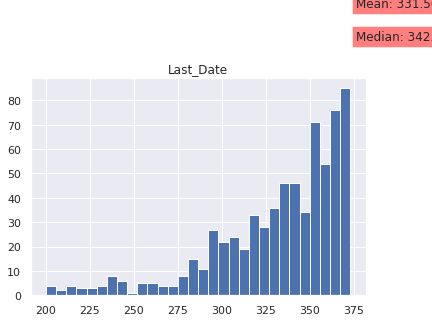

Cluster 4


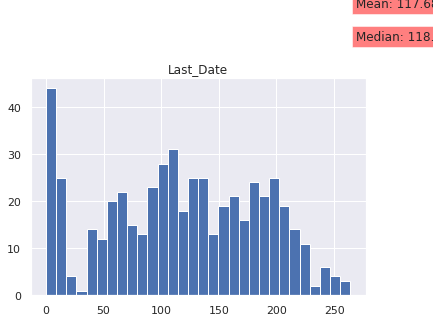

Cluster 5


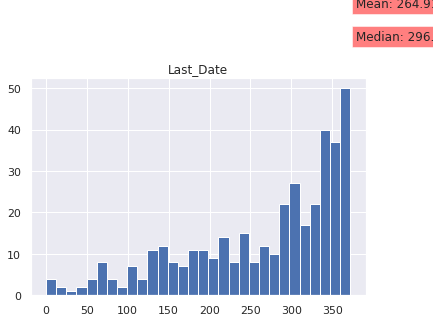

Cluster 6


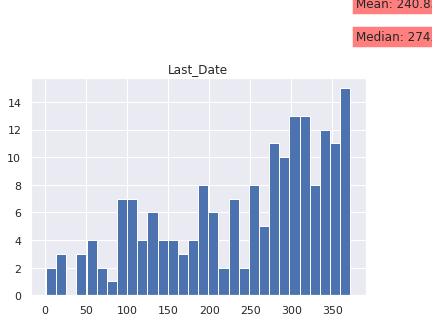

Cluster 7


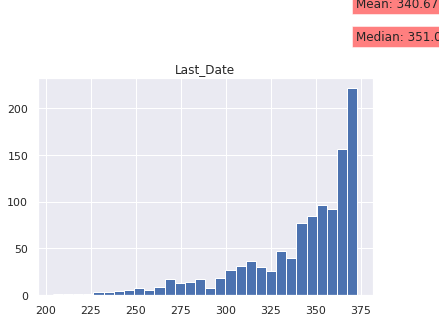

Cluster 8


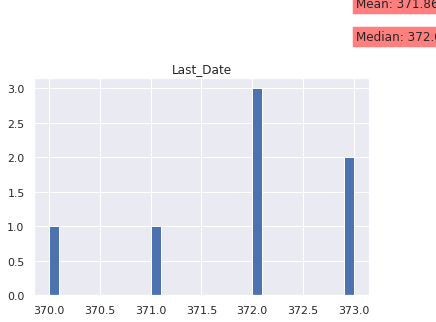

Cluster 9


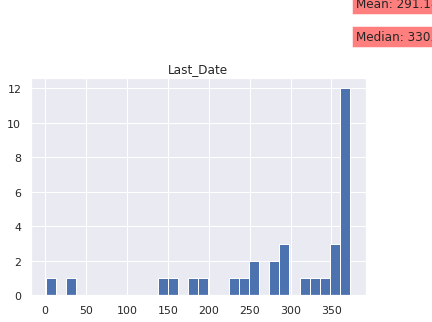

Cluster 10


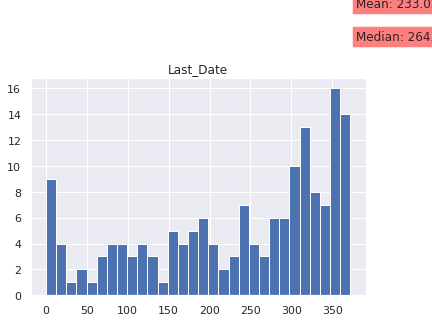

Cluster 11


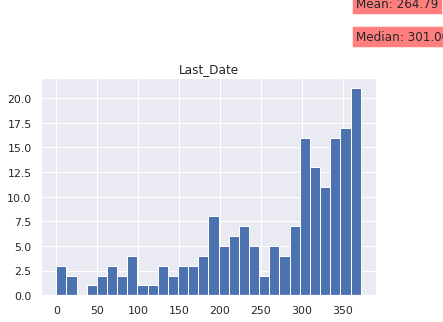

Cluster 12


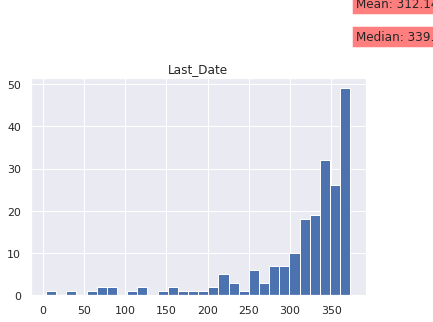

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64
Cluster 0


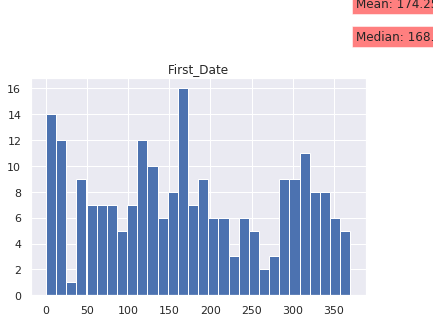

Cluster 1


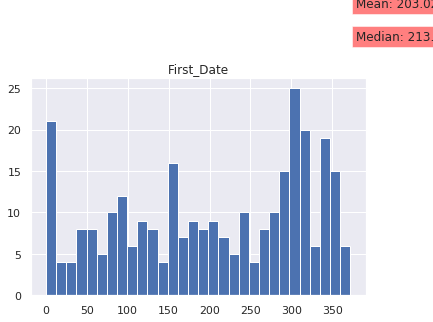

Cluster 2


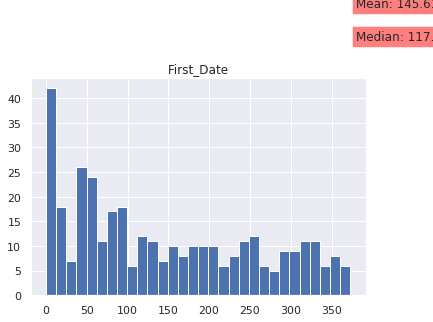

Cluster 3


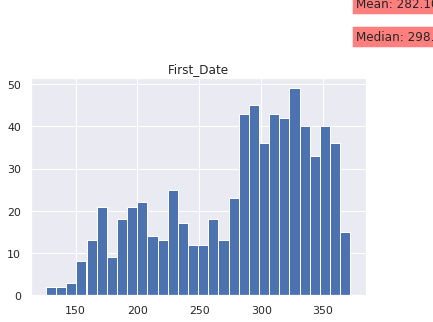

Cluster 4


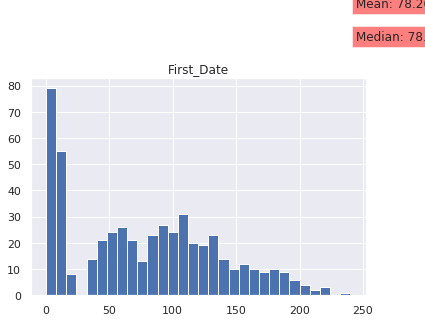

Cluster 5


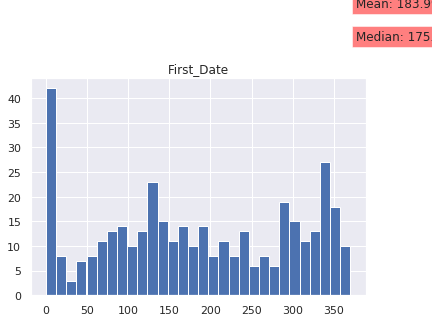

Cluster 6


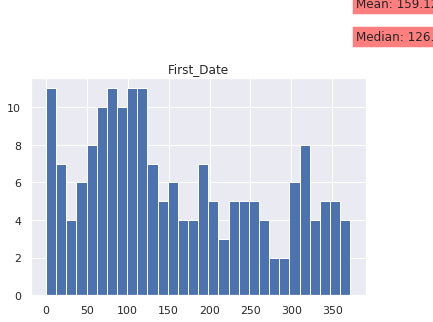

Cluster 7


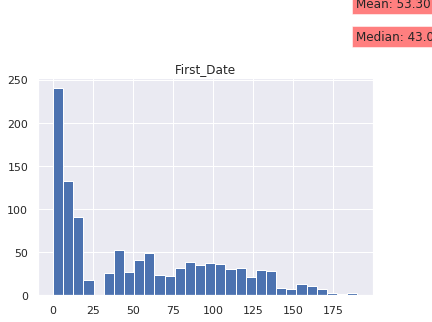

Cluster 8


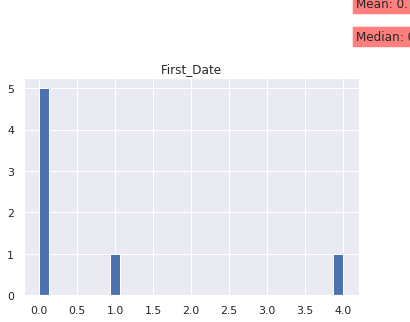

Cluster 9


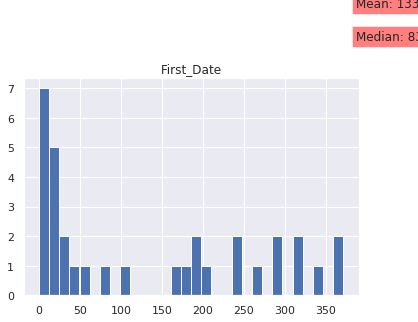

Cluster 10


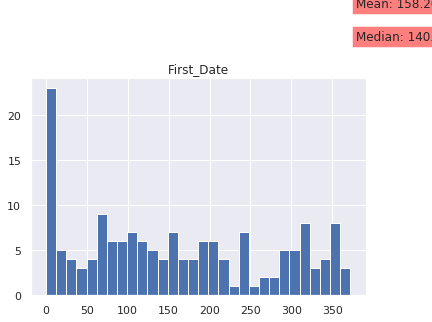

Cluster 11


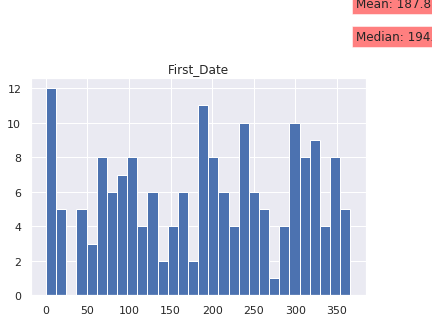

Cluster 12


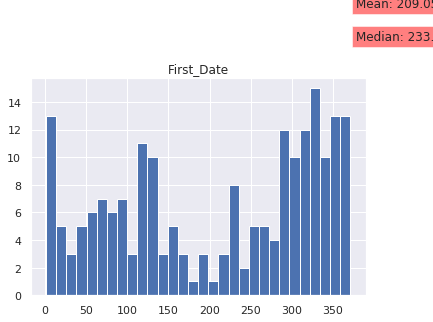

---------------------------------------------------------


In [34]:
hist_kmeans_clusters(13)

In [35]:
df_kmeans_clusters(13)

A/Number_Of_Customers B/Count_Invoices  ... M/First_Date N/Average_Hour
0                     224         -32.09 %  ...      16.02 %          13:30
1                     298         -44.64 %  ...      35.18 %          13:29
2                     355          -2.70 %  ...      -3.05 %          10:32
3                     688         -47.04 %  ...      87.83 %          13:38
4                     518         -58.48 %  ...     -47.89 %          13:33
5                     389         -43.27 %  ...      22.51 %          13:34
6                     185         -44.72 %  ...       5.95 %          13:40
7                    1096          96.99 %  ...     -64.51 %          13:29
8                       7        2912.06 %  ...     -99.52 %          12:53
9                      33         160.25 %  ...     -10.88 %          11:58
10                    162         -49.15 %  ...       5.34 %          13:35
11                    177         -42.62 %  ...      25.06 %          13:10
12                    204         -35.53 %  ...      39.19 %          13:25

[13 rows x 14 columns]

In [0]:
def hist_dbscan_clusters(epsilon, minimum):
    ''' For each feature this fonction plot histograms of your dbscan model's clusters.
    
    Parameters:
      
      epsilon (float): the value of eps in DBSCAN clustering
      minimum (int): the value of min_samples in DBSCAN clustering
      
  '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
  
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Invoices', 'Average_Products_Invoice',
              'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
              'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
              'Kitchen Department', 'Handcraft & Clothes Department',
              'Design & Viantage_Decoration Department']:
        print(df_customers[i].describe())

        for id_cluster in range(-1, n_clusters_ -1):
            print("Cluster %d" % id_cluster)
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
                    transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
                    transform=ax.transAxes)
            plt.title(i)
            plt.show()
        print('---------------------------------------------------------')

        for j in ['Last_Date', 'First_Date']:
            print(df_customers[j].describe())

            for id_cluster in range(-1, n_clusters_ -1):
                index = np.where(labels == id_cluster)[0]
                Mean = df_customers[j][index].mean()
                Median = df_customers[j][index].median()
                plt.hist(df_customers[j][index], bins = 30)
                plt.text(0.75, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                      alpha=0.5),
                        transform=ax.transAxes)
                plt.text(0.75, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                        alpha=0.5),
                         transform=ax.transAxes)
                plt.title(j)
                plt.show()

            print('---------------------------------------------------------')  

In [0]:
def df_dbscan_clusters(epsilon, minimum):
    ''' Show a dataframe with the average percentage difference betwean the mean 
        of each feature and the value of each point for each dbscan model's clusters.
  
    Parameters:
      
        epsilon (float): the value of eps in DBSCAN clustering
        minimum (int): the value of min_samples in DBSCAN clustering
      
    '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [len(np.where(labels == id_cluster)[0])
                                      for id_cluster in range(-1, n_clusters_ -1)]

    for h,i in enumerate(['Count_Invoices', 'Average_Products_Invoice',
                          'Average_Quantity_Invoice', 'Average_TotaPrice_Invoice',
                          'United Kingdom', 'Decoration Department', 'Toys & Kids Deprtment',
                          'Kitchen Department', 'Handcraft & Clothes Department',
                          'Design & Viantage_Decoration Department', 'Last_Date', 'First_Date']):
        feature = []

        for id_cluster in range(-1, n_clusters_ -1):
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
      
        my_dict[alphabet[h] + '/' + i] = feature
  
    feature = []
  
    for id_cluster in range(-1, n_clusters_ -1):
        index = np.where(labels == id_cluster)[0]
        time_minutes = data["Time_Minutes"][index].mean()
        hour = time_minutes // 60
        minutes = time_minutes % 60
        feature.append("%d:%02d" % (hour, minutes))
      
    my_dict['N' + '/' + 'Time_Minutes_Mean'] = feature
    Clusters_df = pd.DataFrame(my_dict, index=range(-1, n_clusters_ -1))
  
    return Clusters_df.head(n_clusters_)

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster -1


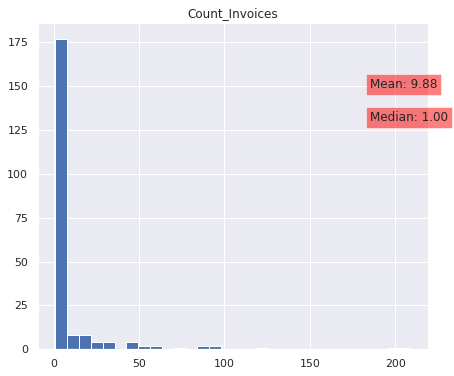

Cluster 0


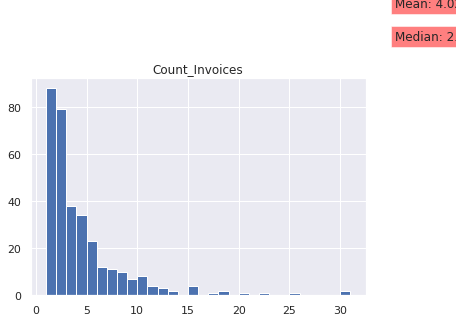

Cluster 1


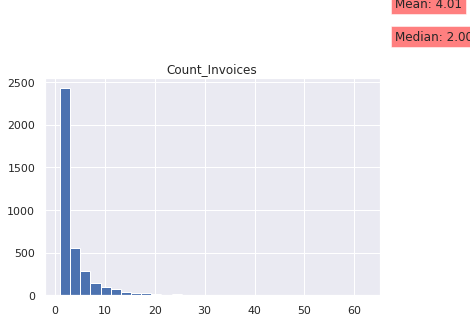

Cluster 2


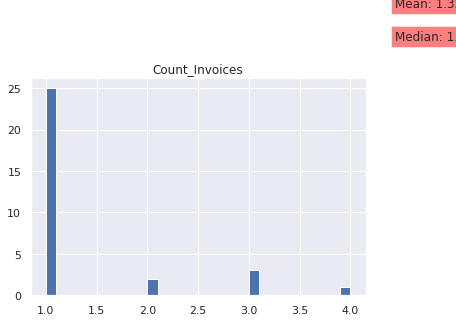

Cluster 3


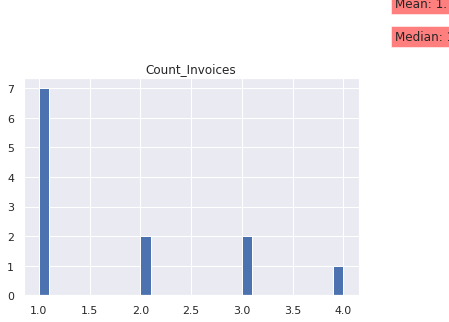

Cluster 4


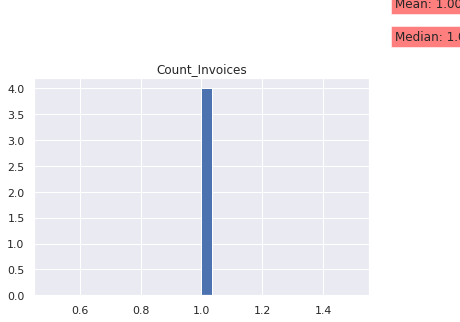

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


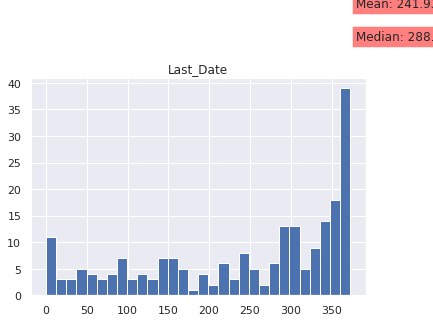

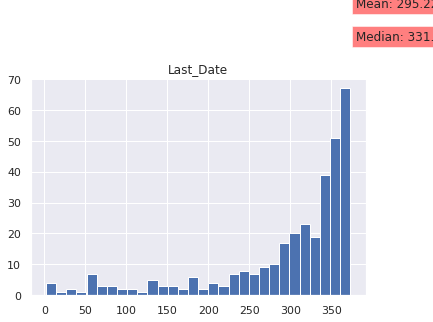

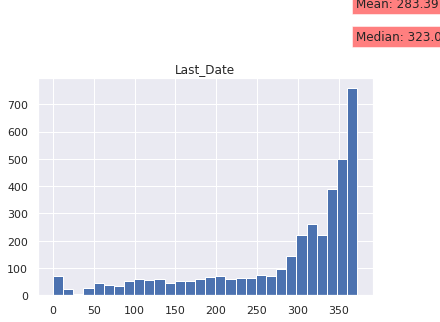

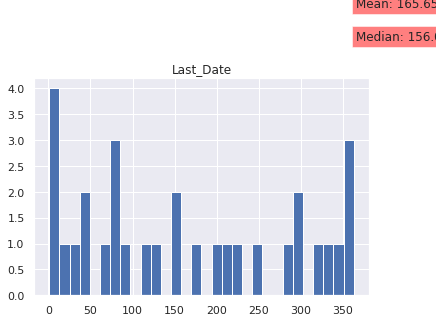

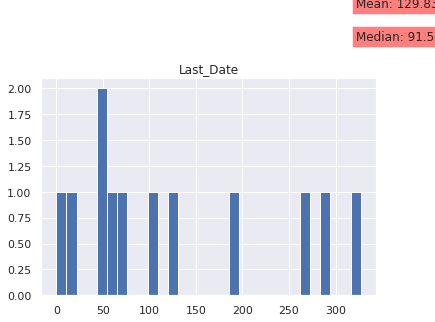

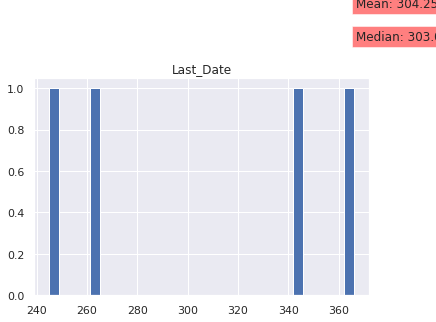

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


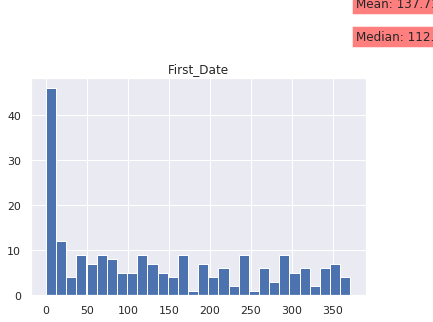

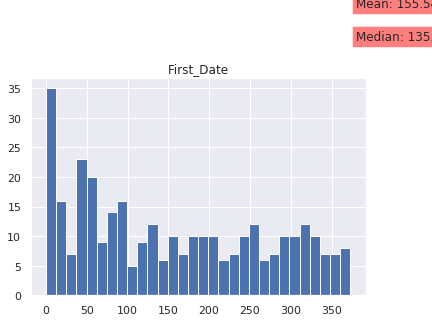

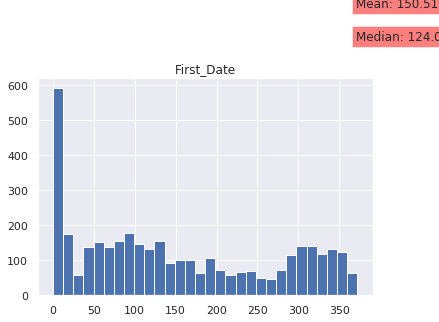

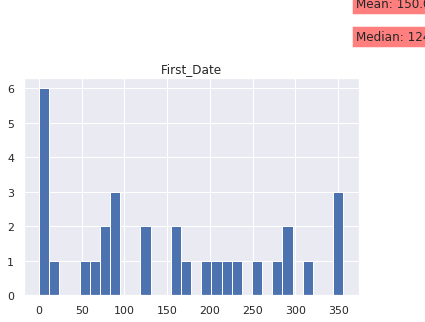

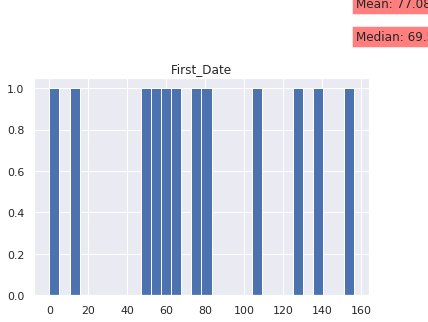

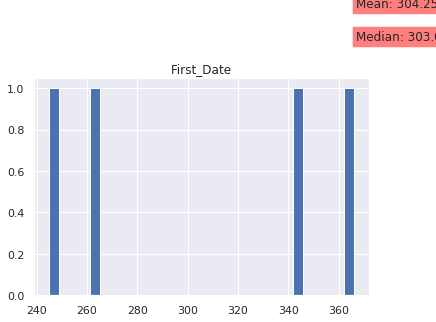

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster -1


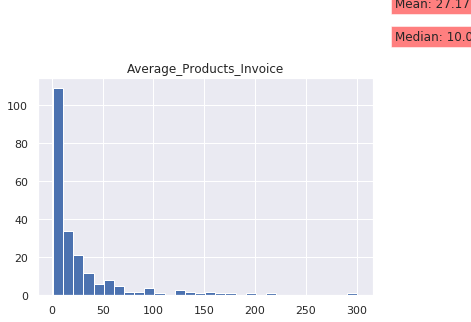

Cluster 0


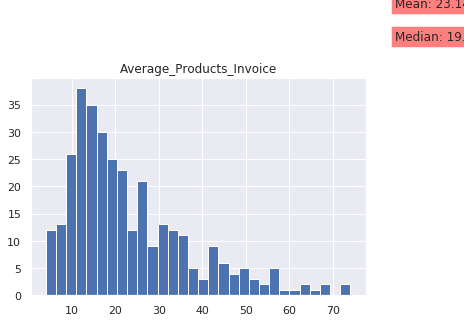

Cluster 1


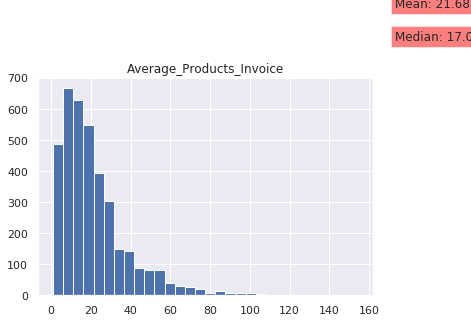

Cluster 2


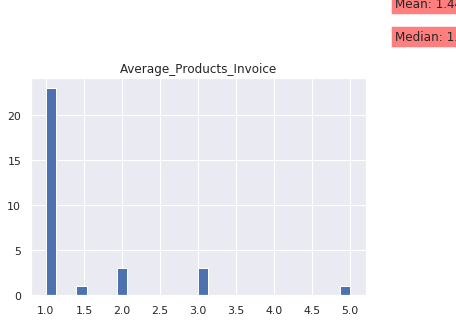

Cluster 3


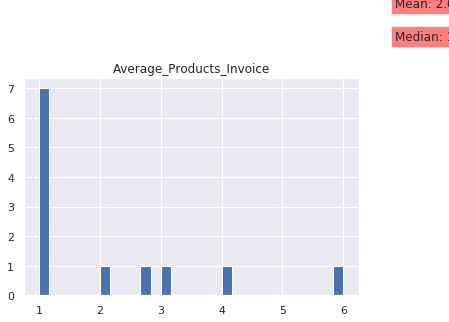

Cluster 4


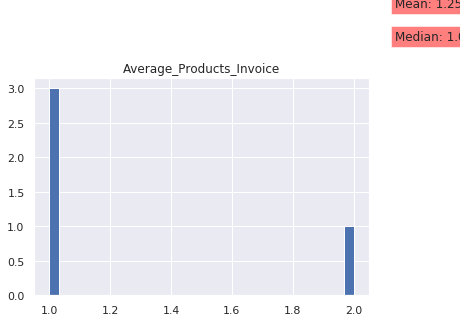

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


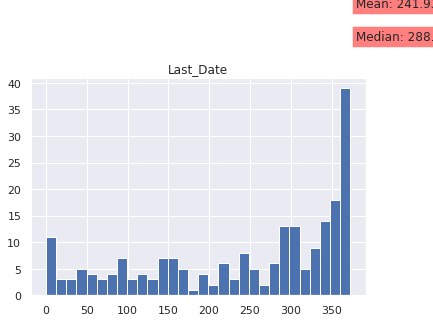

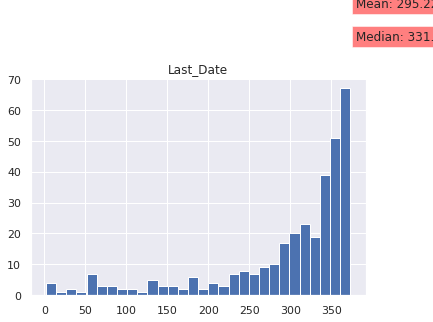

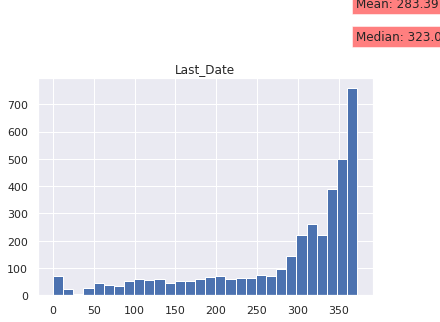

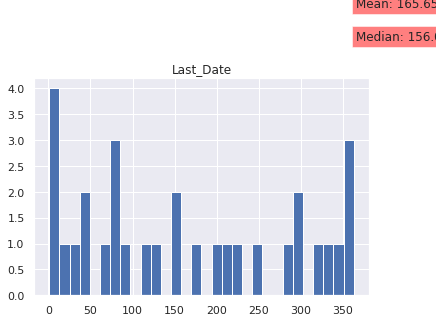

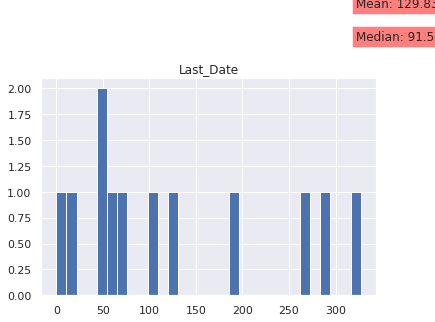

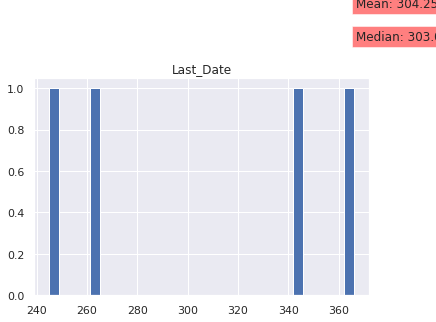

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


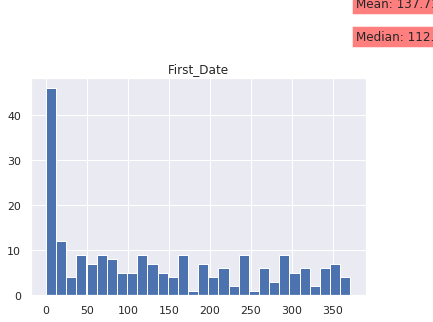

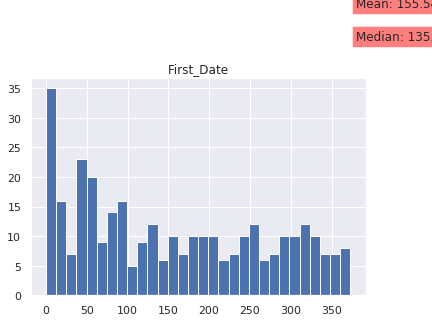

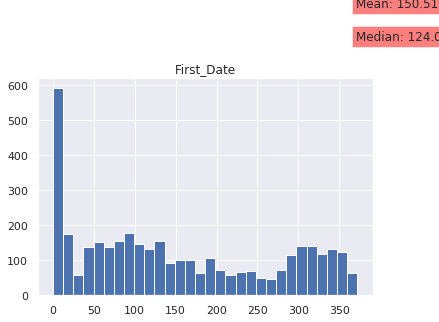

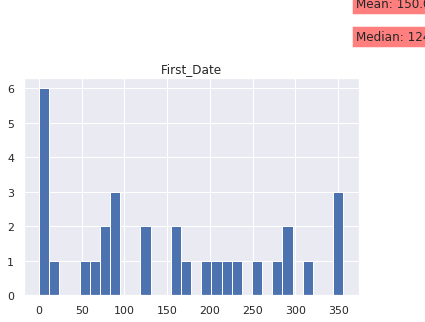

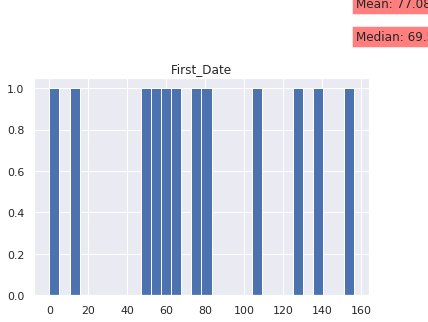

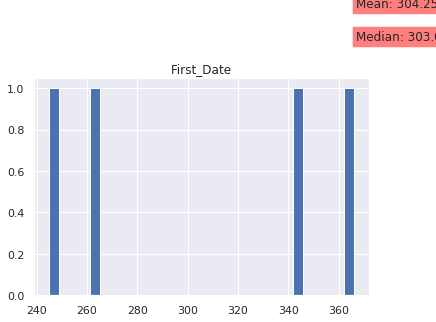

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster -1


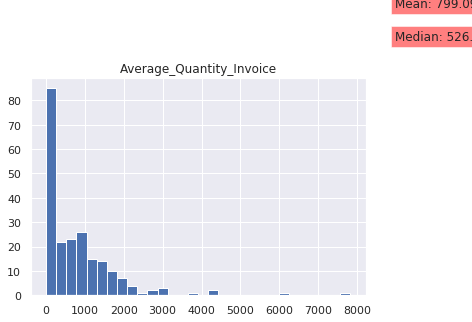

Cluster 0


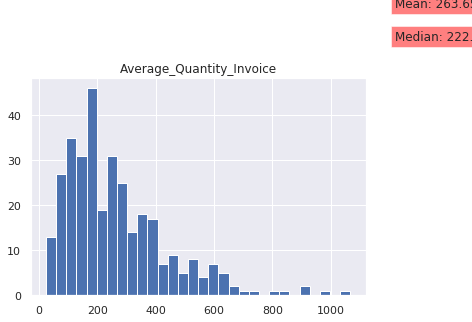

Cluster 1


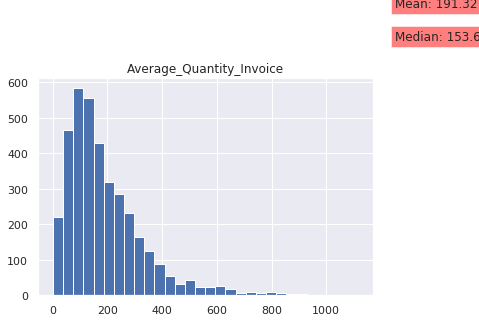

Cluster 2


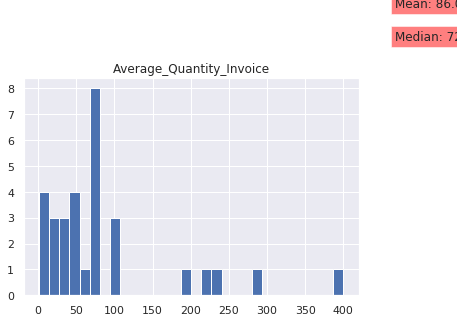

Cluster 3


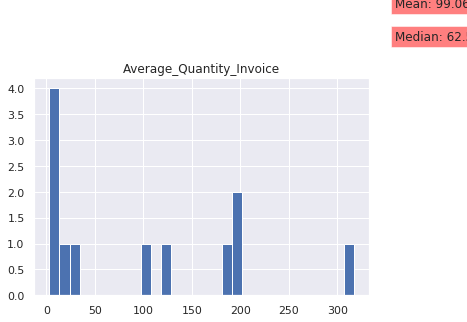

Cluster 4


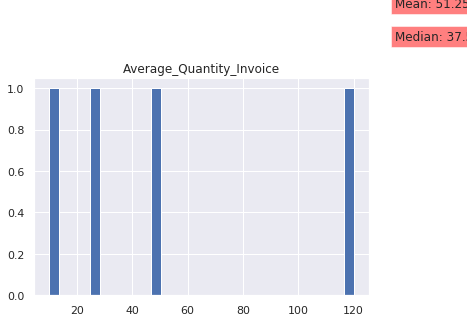

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


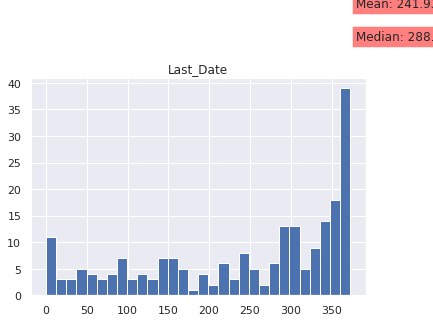

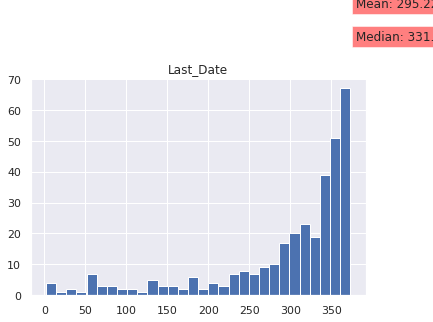

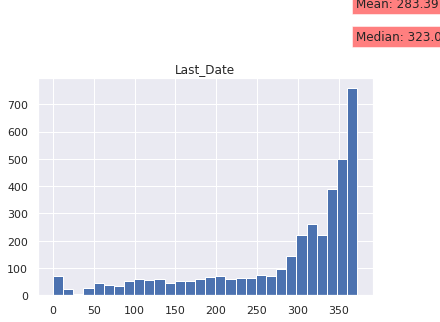

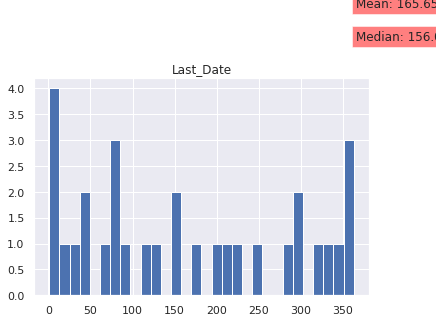

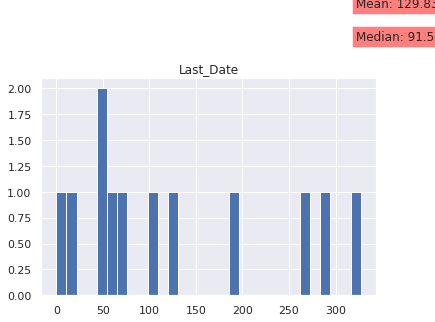

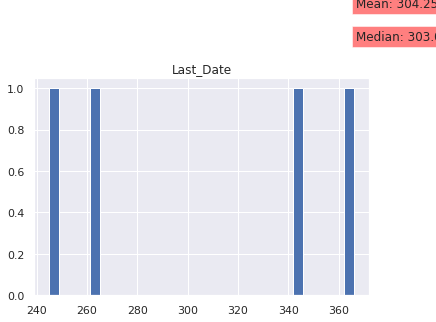

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


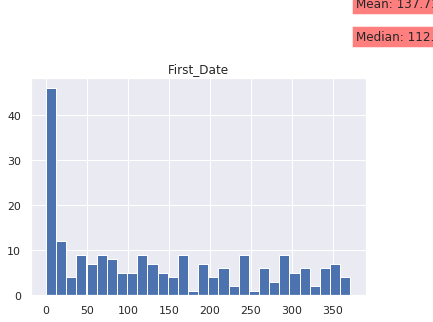

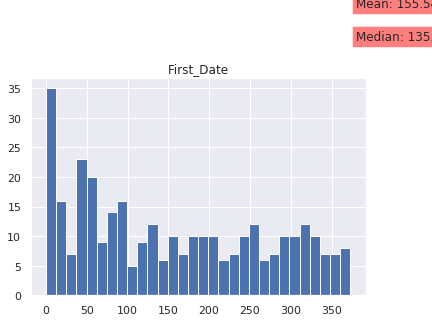

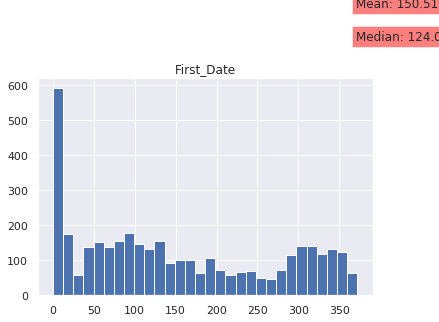

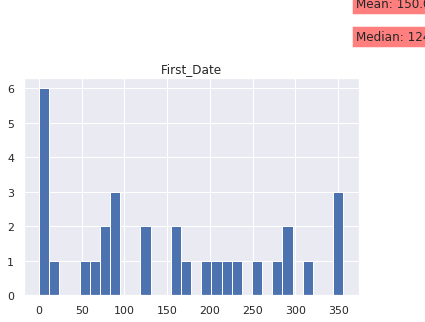

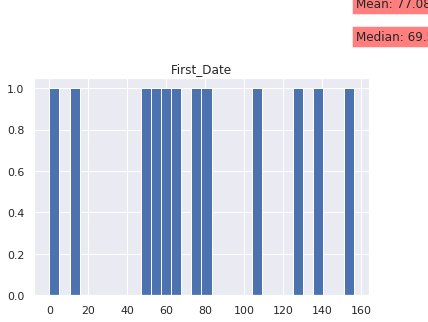

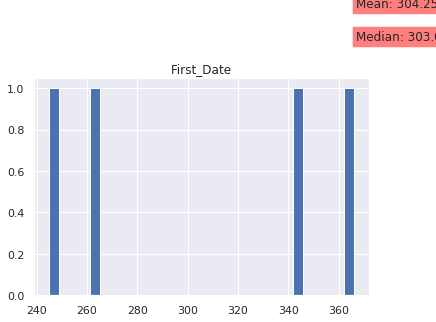

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster -1


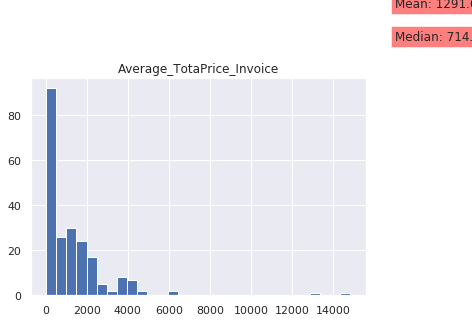

Cluster 0


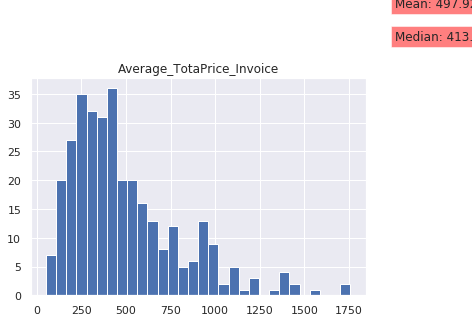

Cluster 1


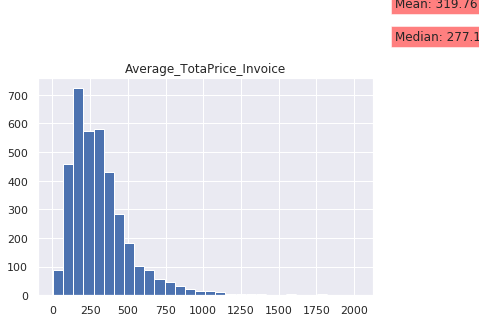

Cluster 2


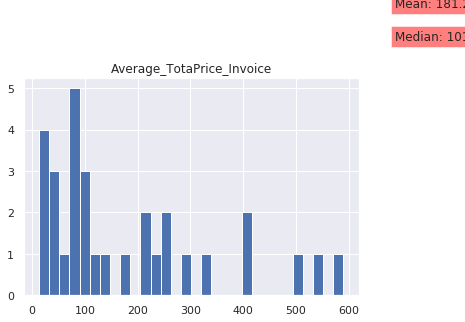

Cluster 3


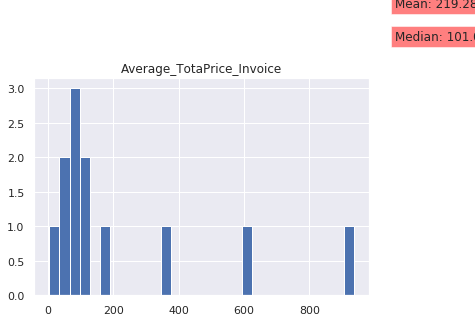

Cluster 4


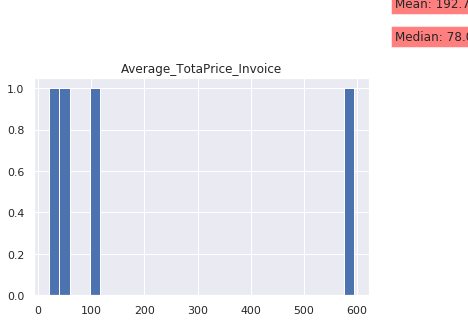

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


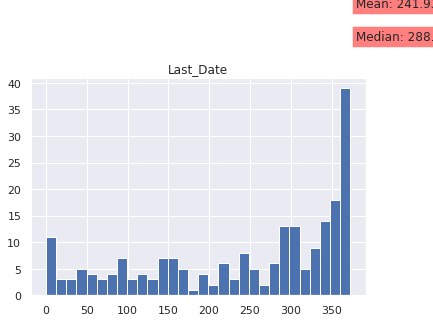

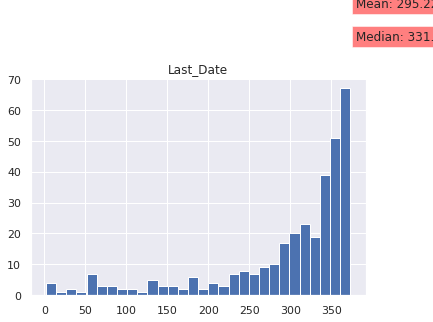

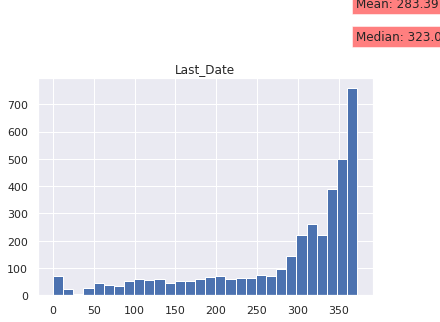

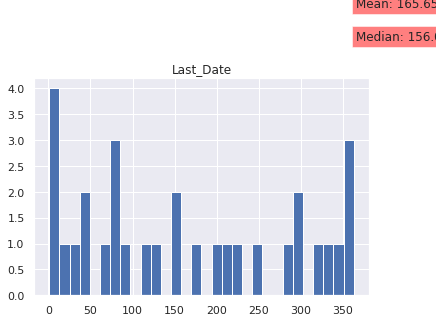

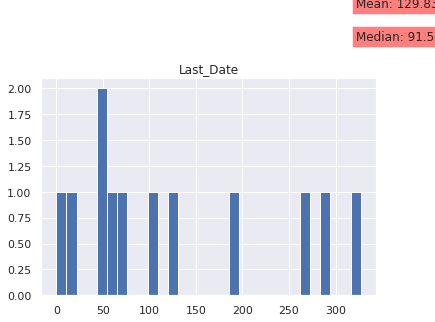

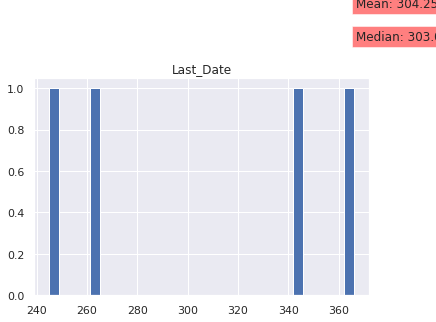

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


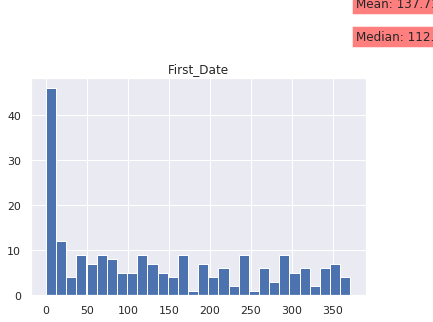

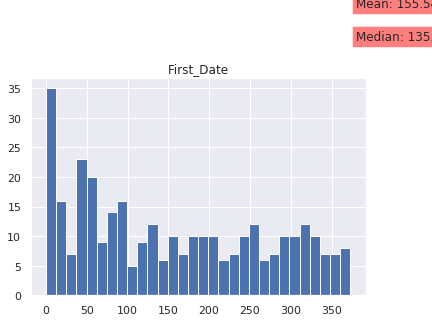

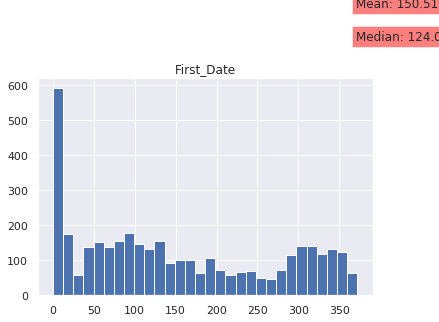

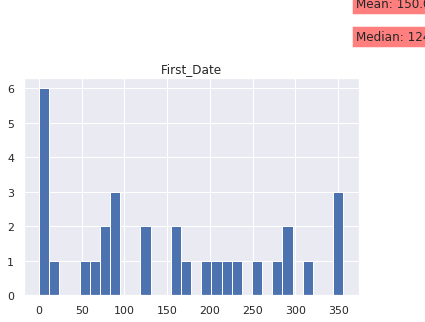

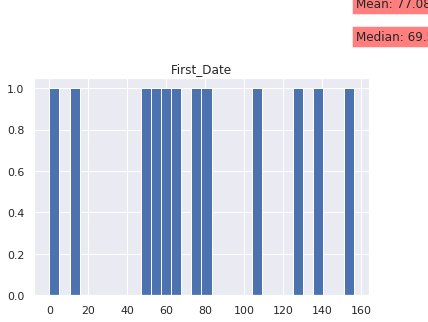

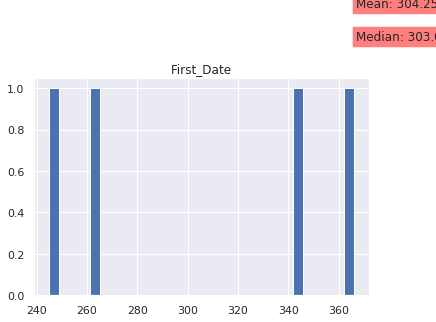

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster -1


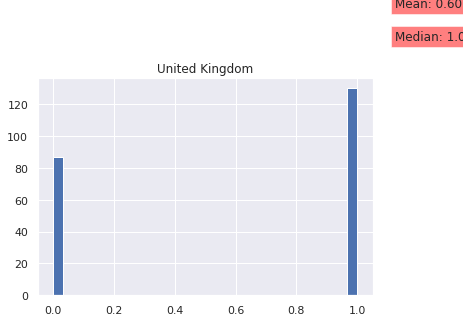

Cluster 0


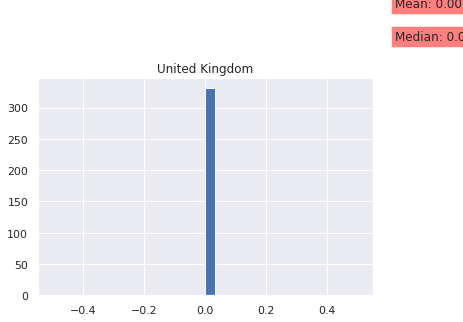

Cluster 1


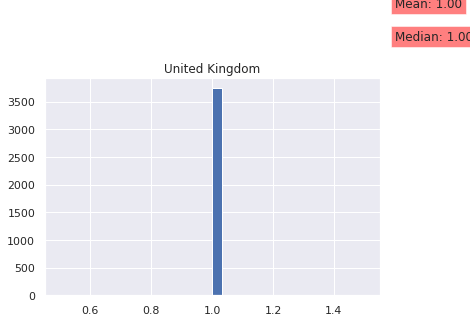

Cluster 2


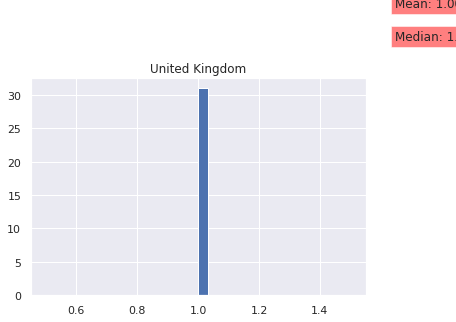

Cluster 3


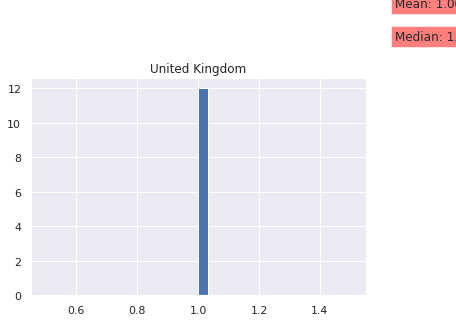

Cluster 4


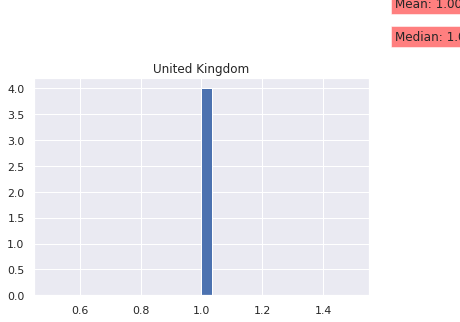

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


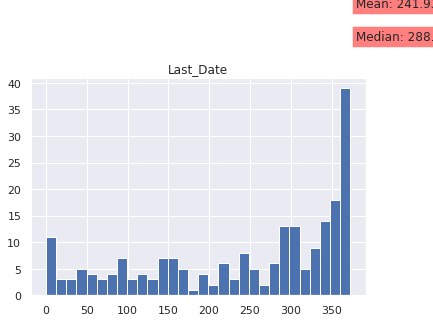

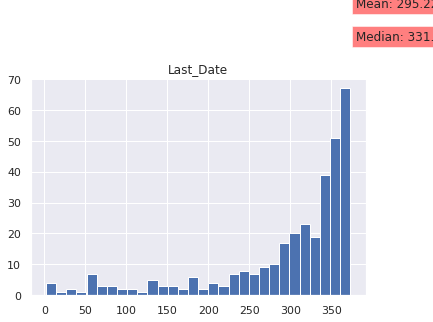

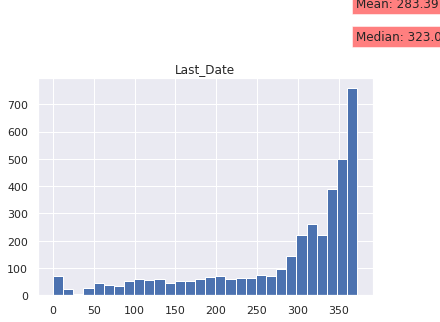

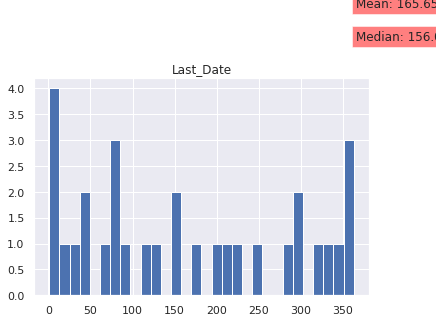

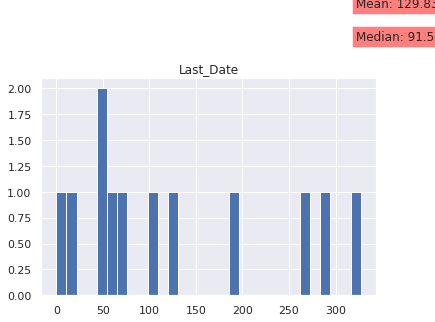

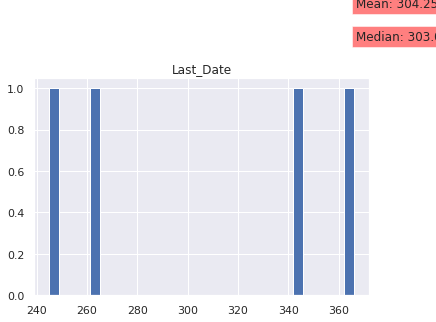

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


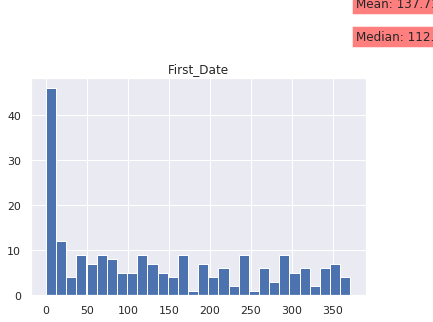

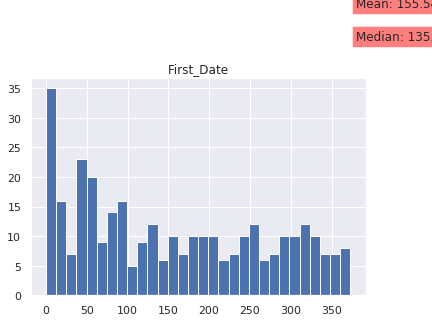

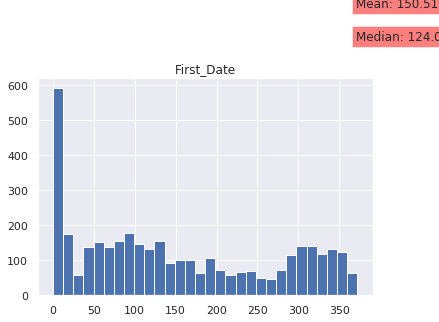

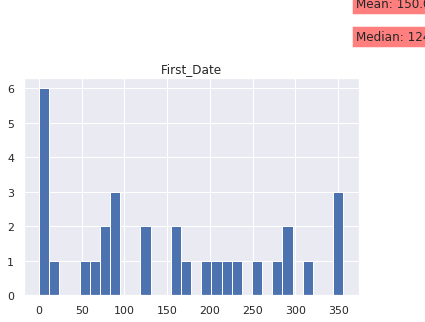

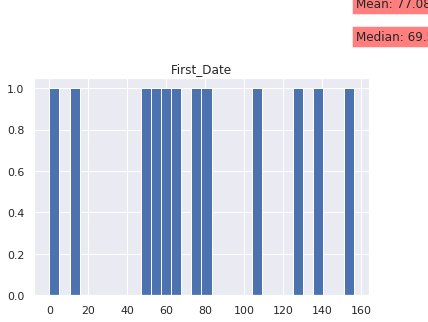

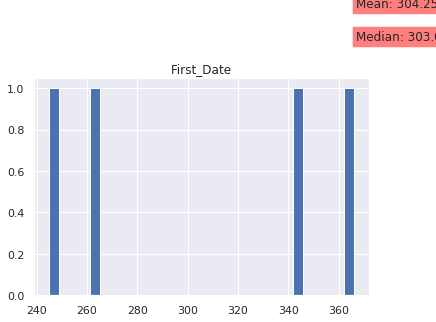

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster -1


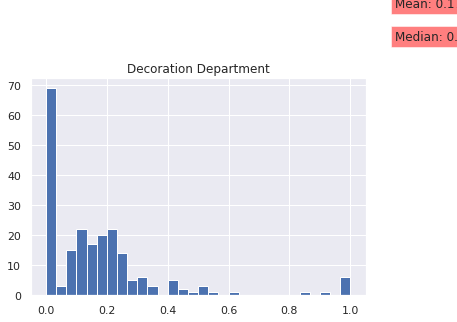

Cluster 0


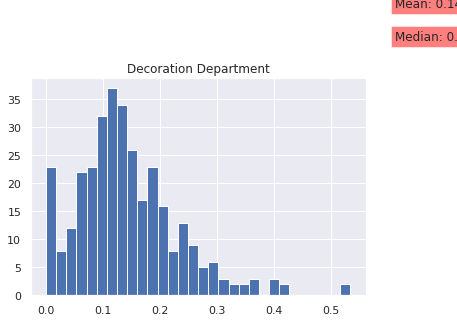

Cluster 1


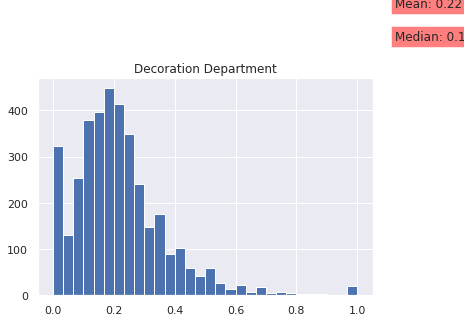

Cluster 2


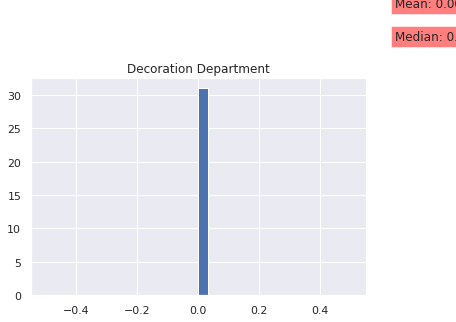

Cluster 3


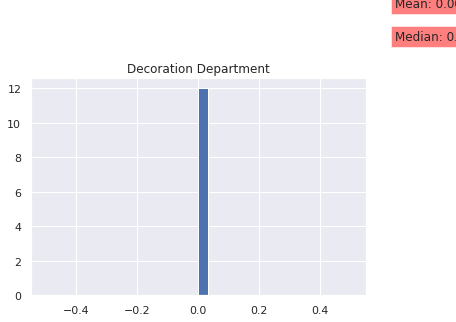

Cluster 4


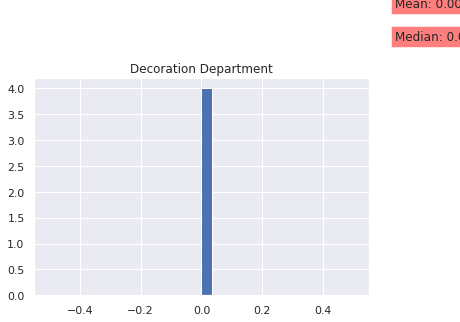

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


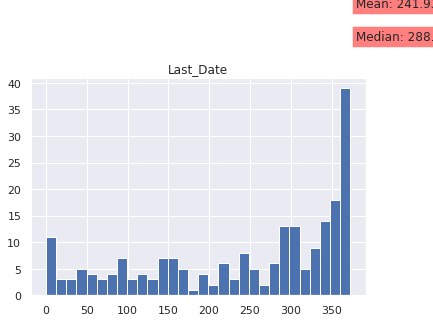

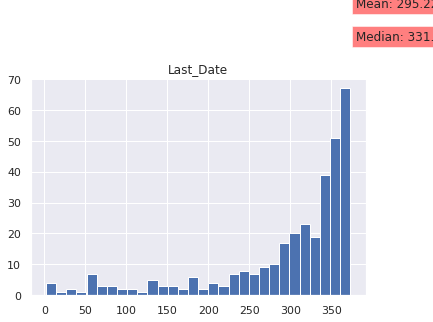

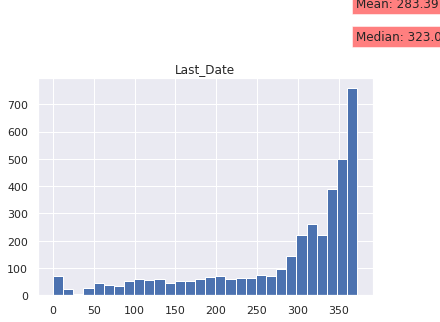

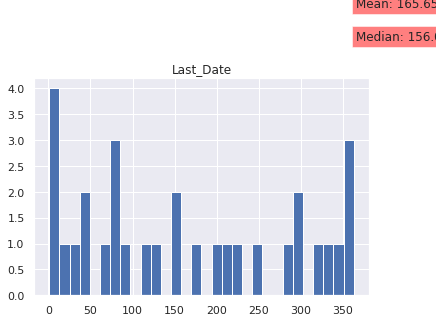

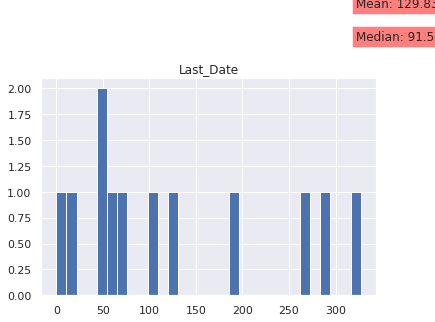

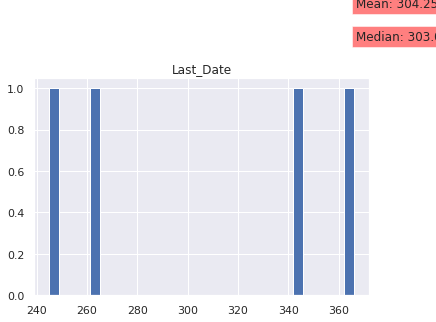

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


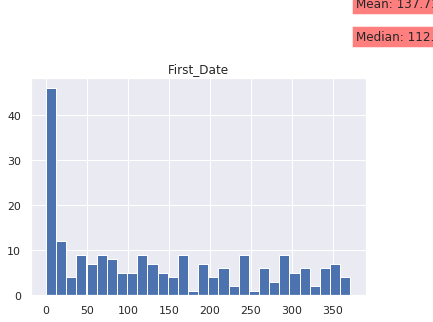

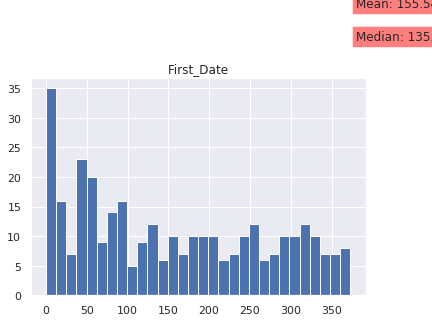

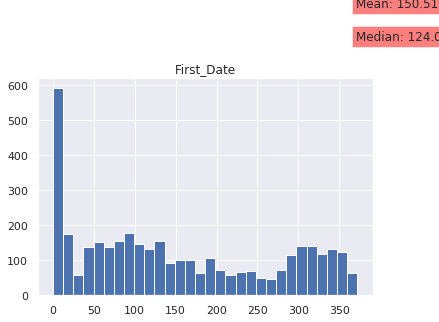

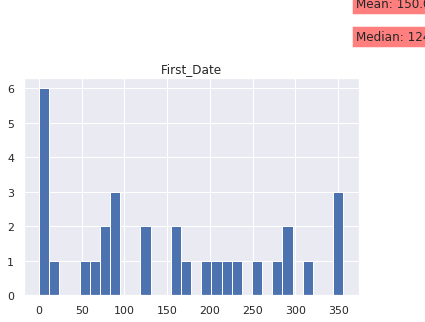

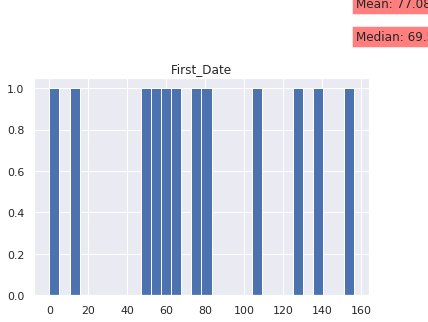

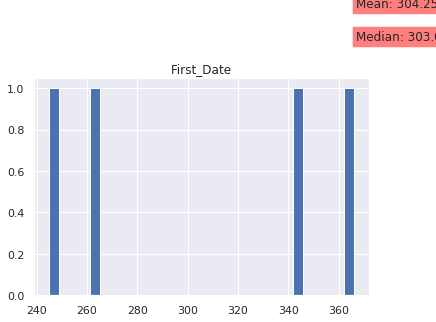

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster -1


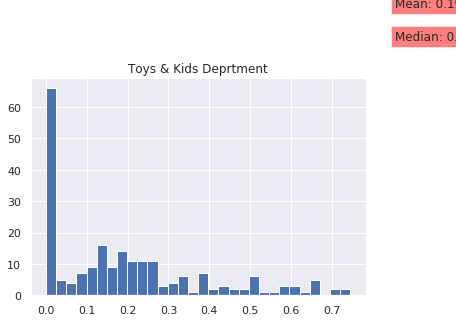

Cluster 0


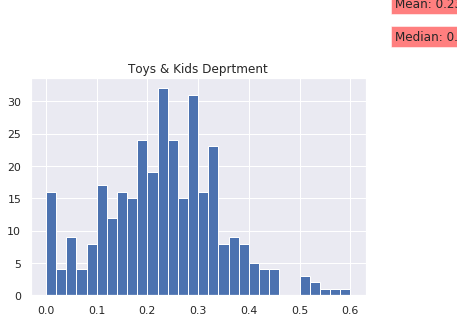

Cluster 1


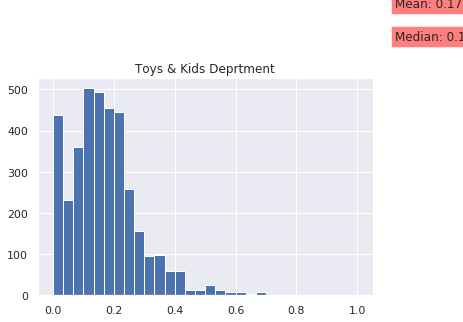

Cluster 2


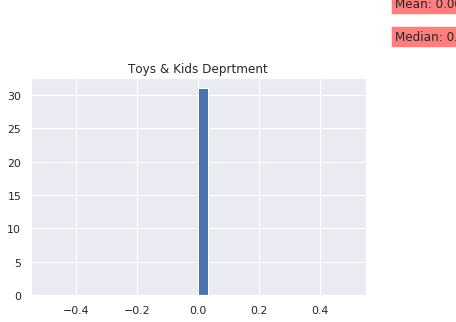

Cluster 3


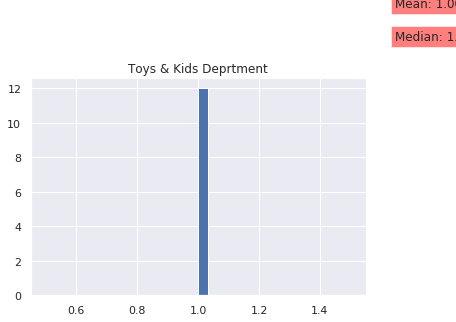

Cluster 4


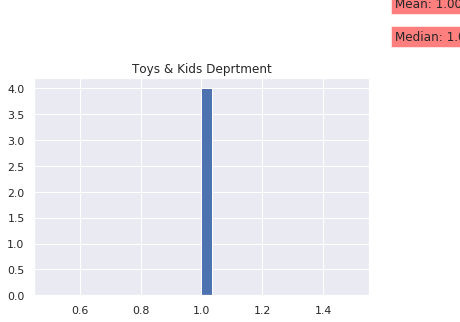

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


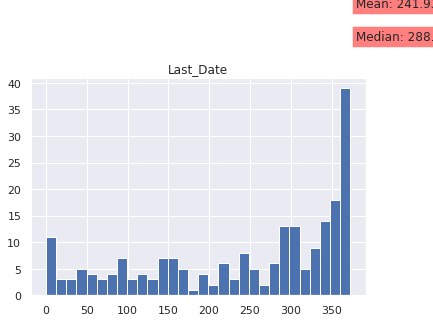

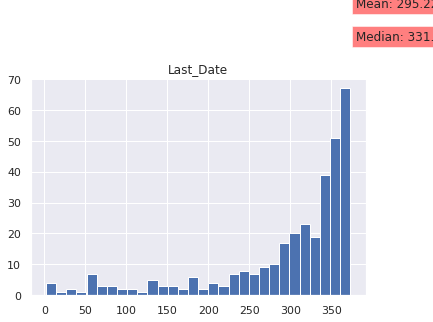

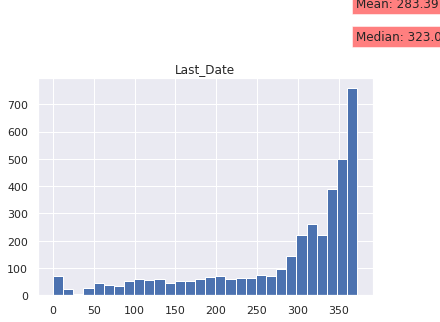

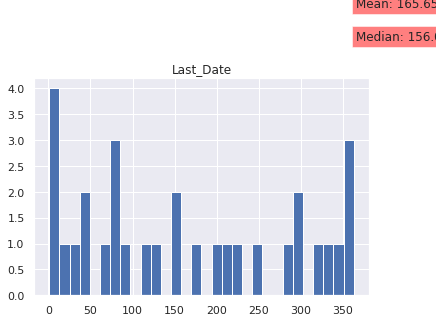

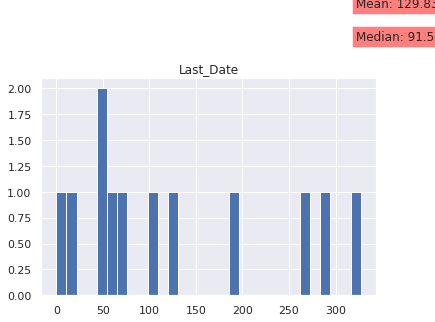

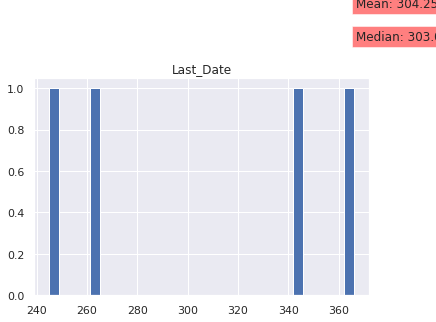

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


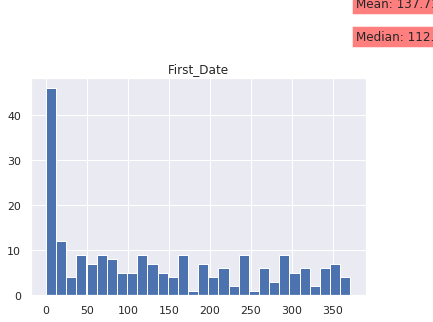

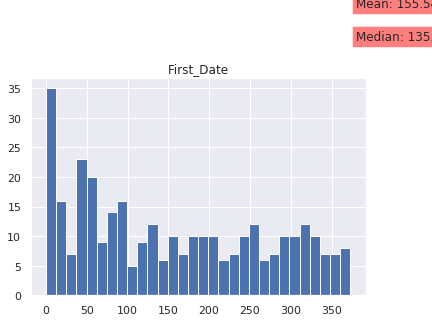

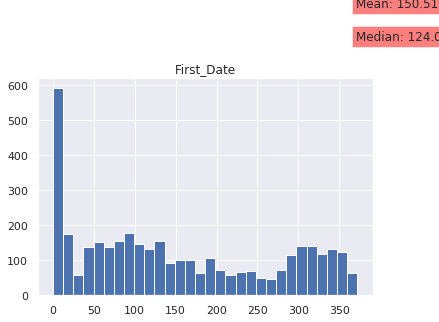

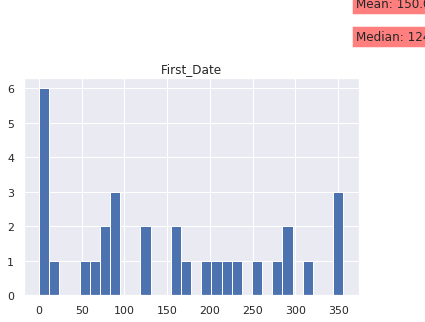

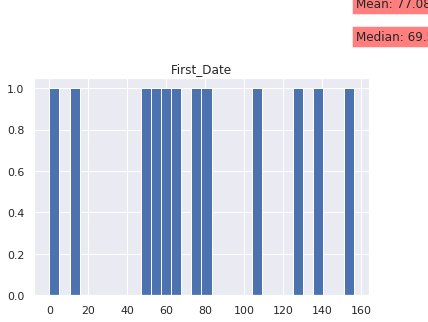

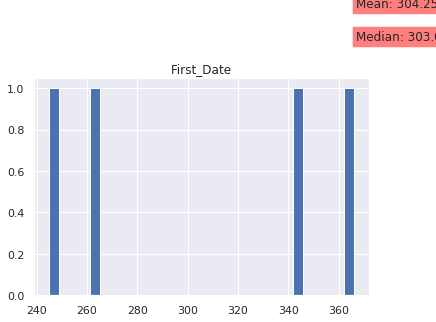

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster -1


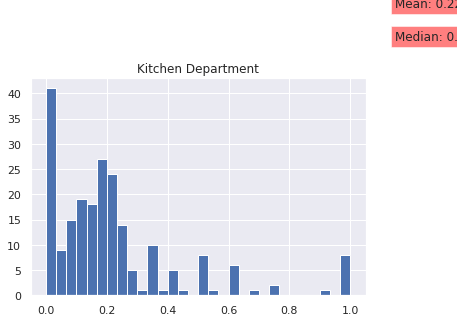

Cluster 0


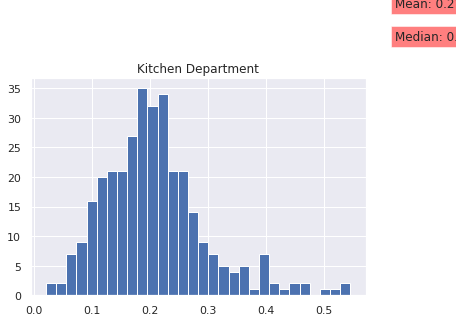

Cluster 1


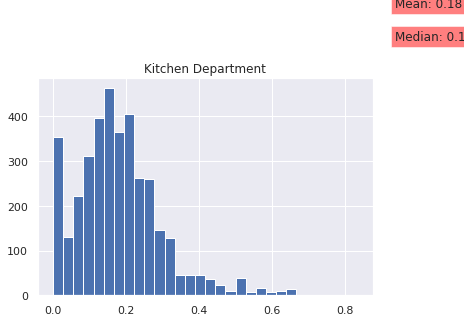

Cluster 2


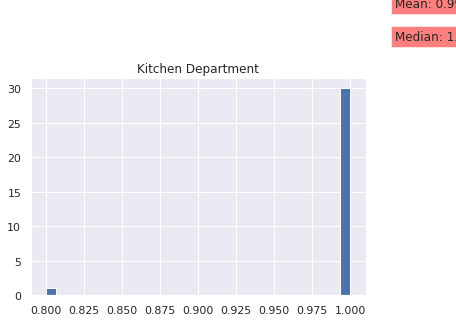

Cluster 3


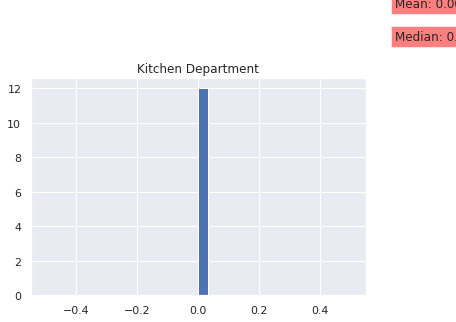

Cluster 4


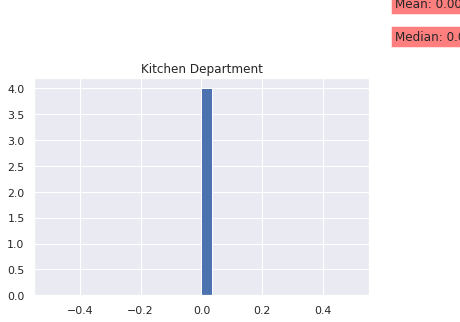

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


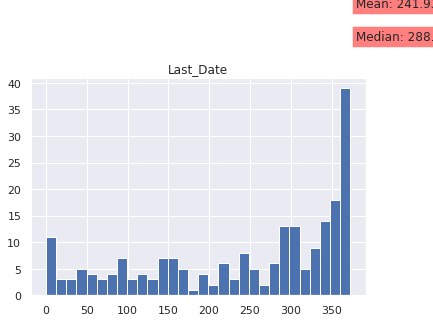

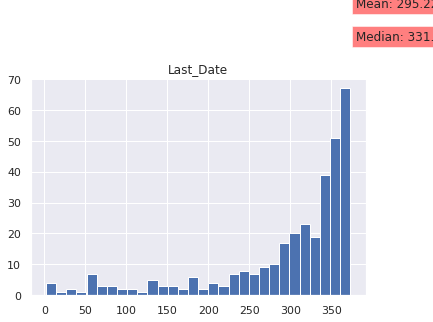

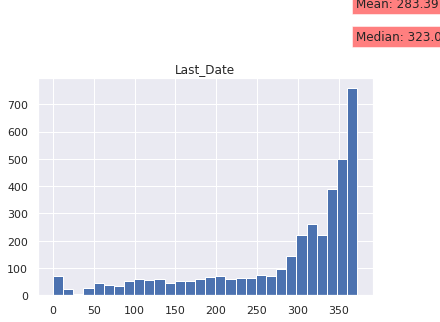

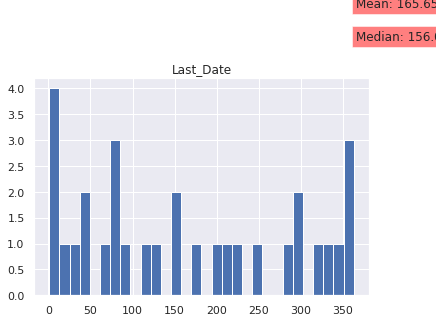

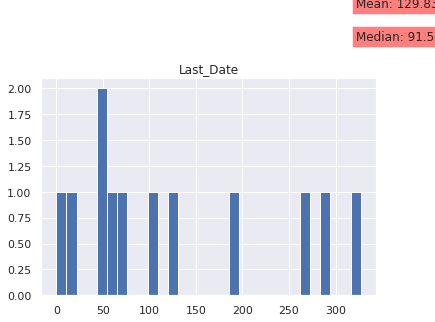

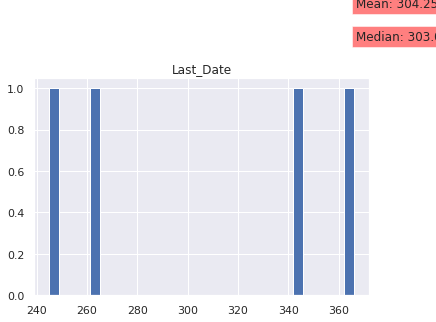

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


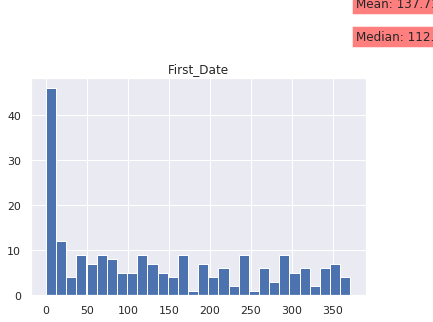

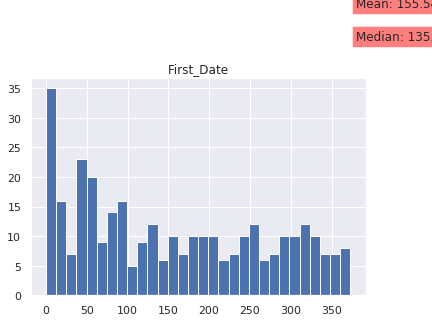

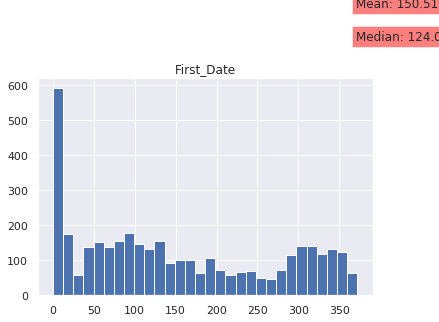

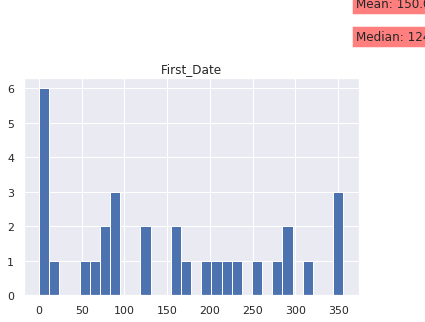

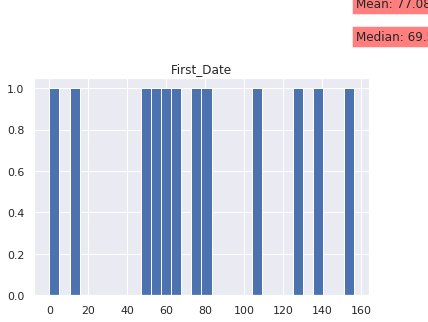

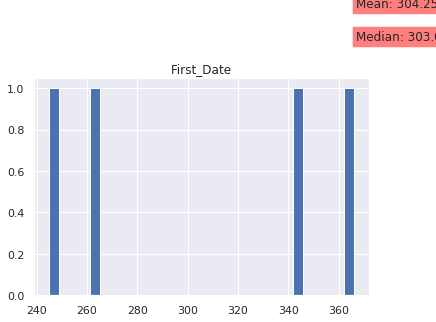

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster -1


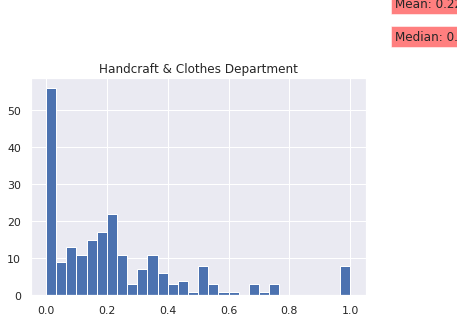

Cluster 0


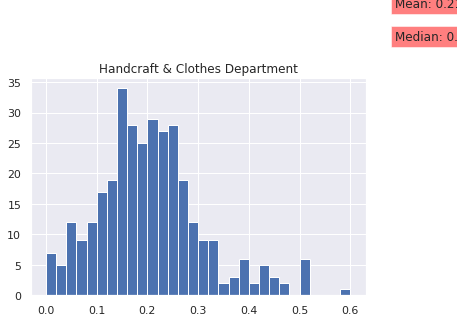

Cluster 1


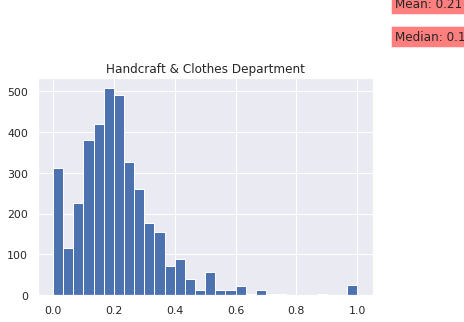

Cluster 2


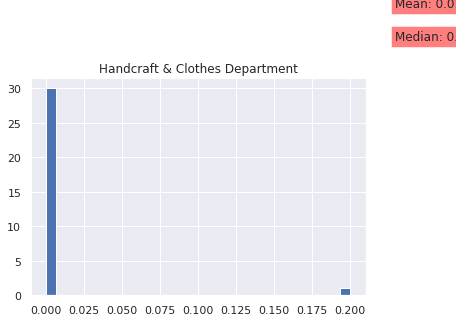

Cluster 3


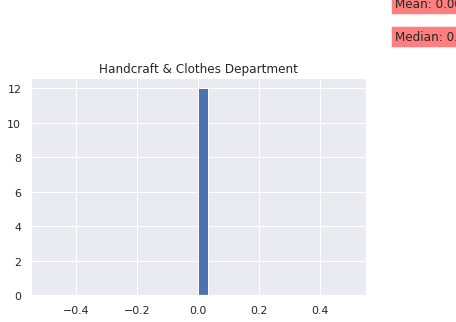

Cluster 4


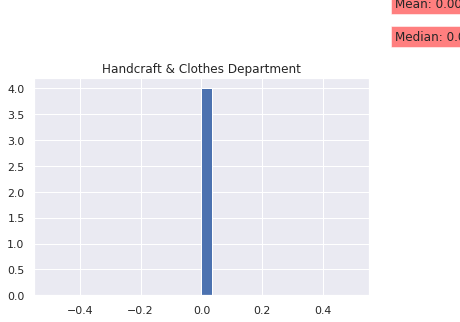

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


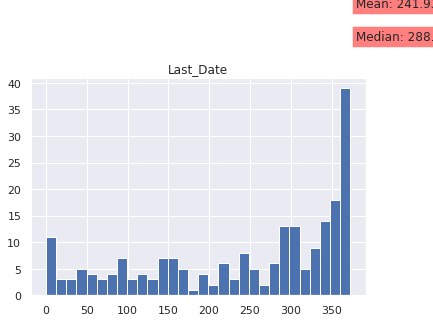

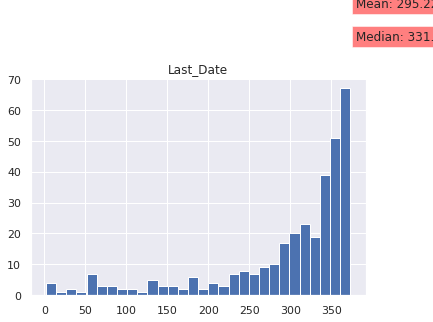

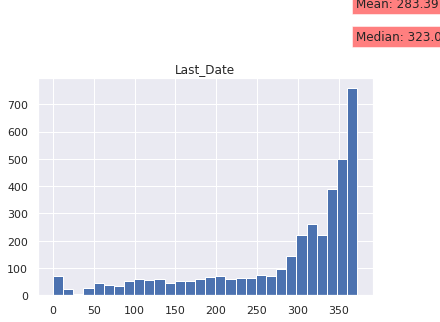

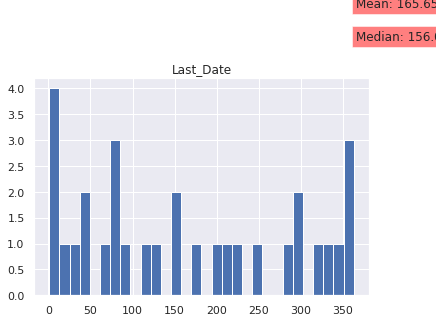

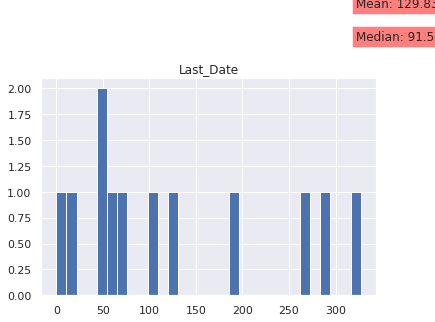

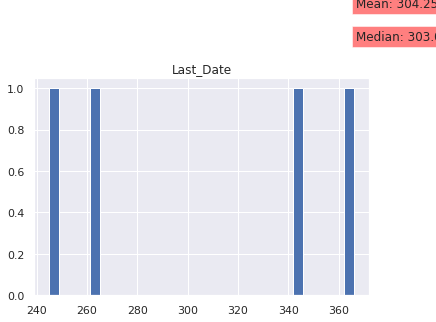

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


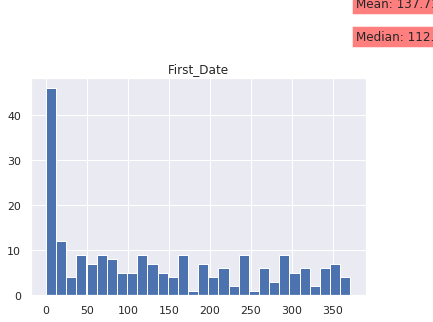

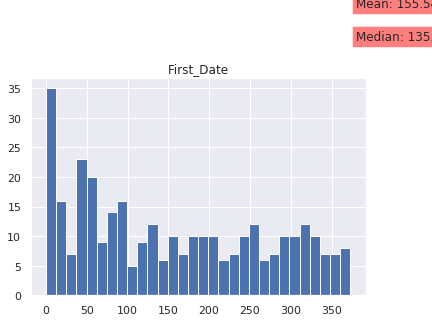

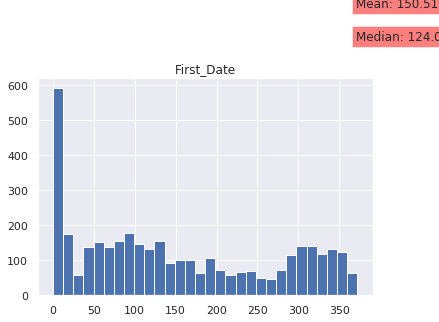

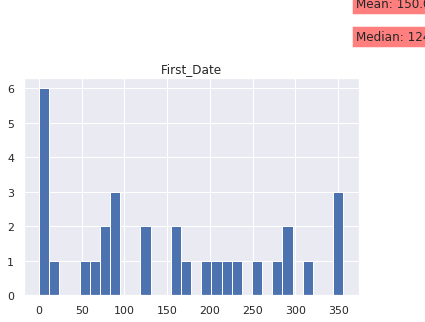

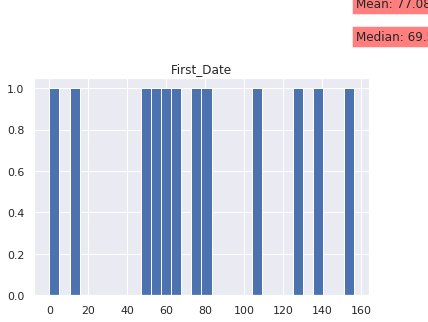

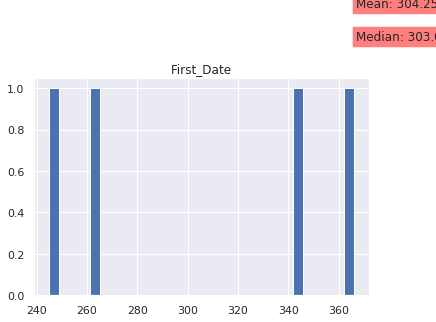

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster -1


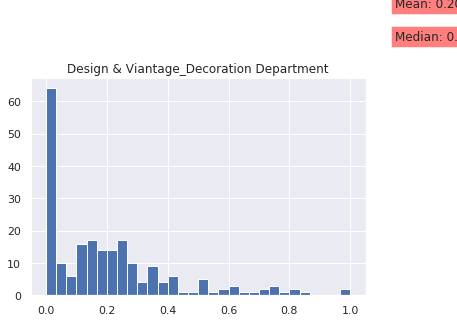

Cluster 0


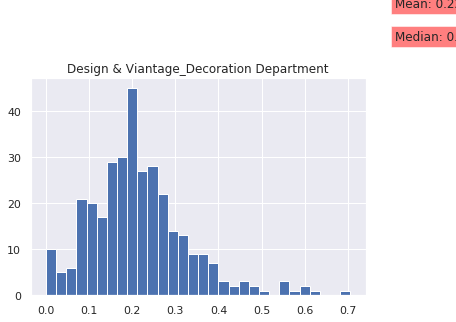

Cluster 1


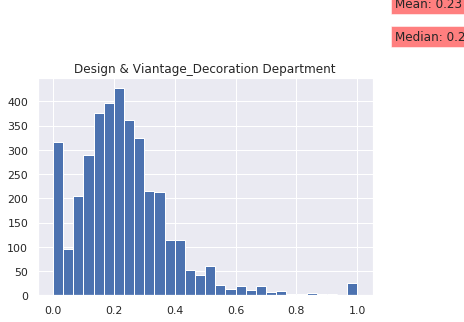

Cluster 2


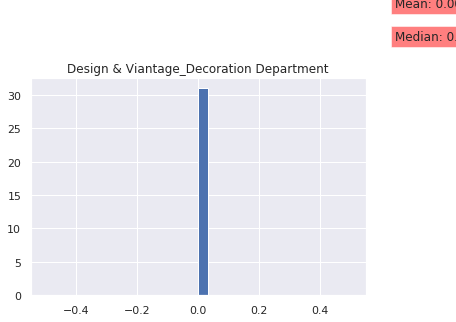

Cluster 3


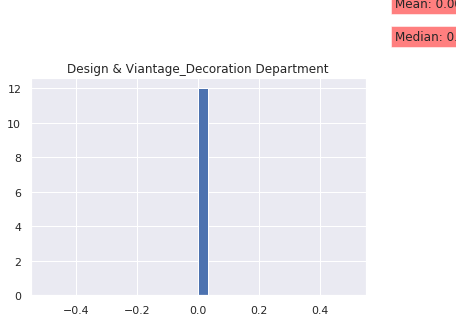

Cluster 4


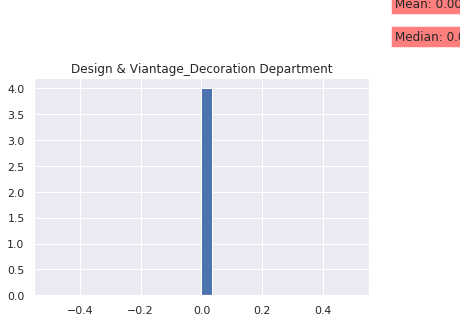

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


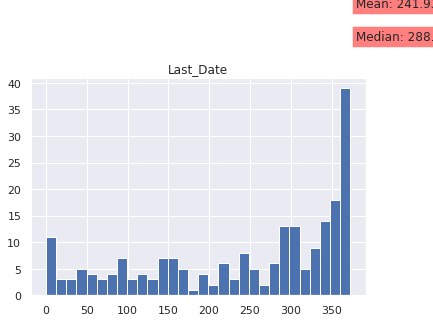

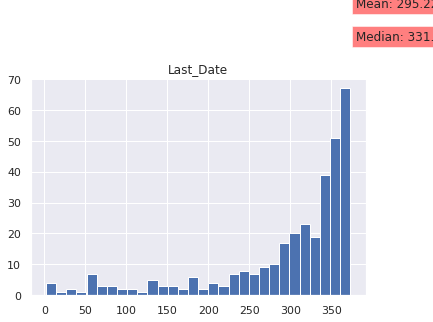

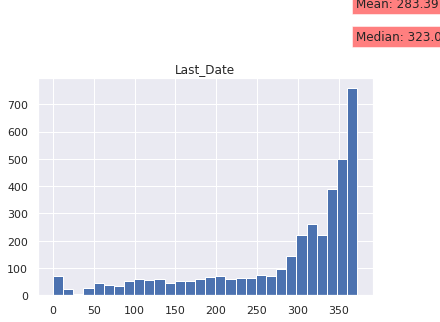

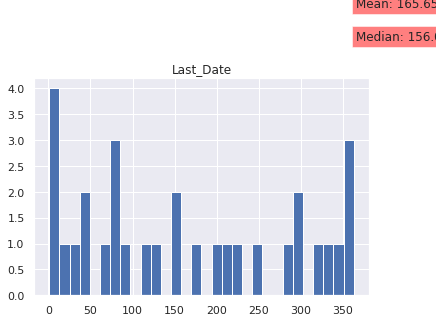

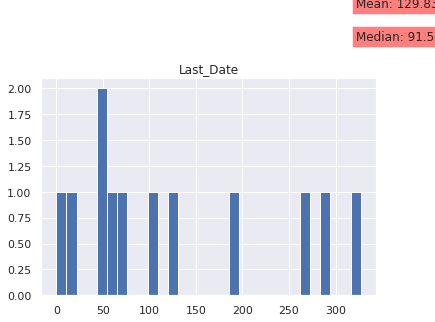

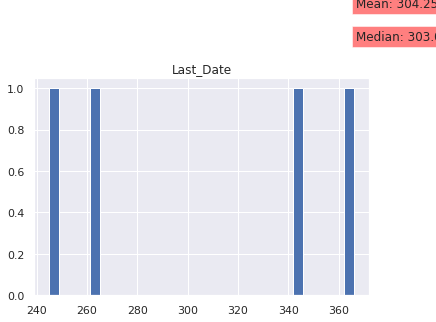

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


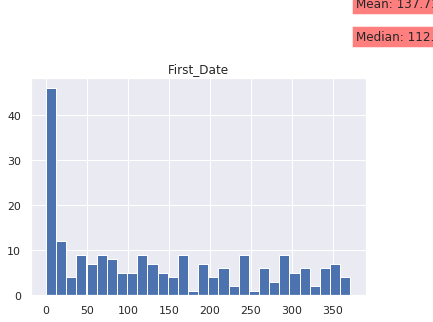

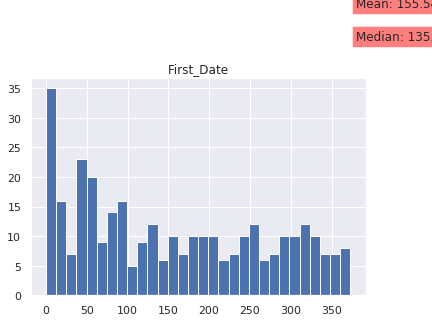

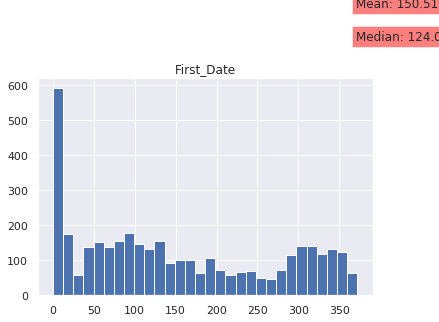

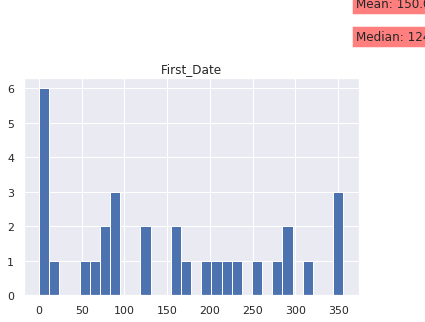

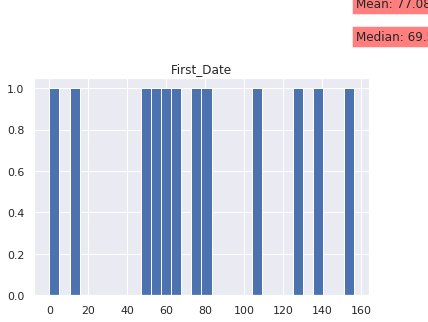

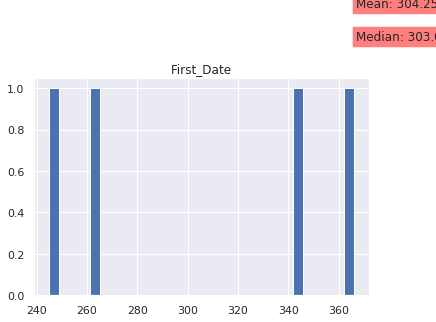

---------------------------------------------------------


In [38]:
hist_dbscan_clusters(2.3, 5)

In [39]:
df_dbscan_clusters(2.3, 5)

A/Number_Of_Customers B/Count_Invoices  ... M/First_Date N/Time_Minutes_Mean
-1                    217         131.21 %  ...      -8.31 %               12:37
 0                    331          -5.97 %  ...       3.56 %               10:27
 1                   3741          -6.25 %  ...       0.21 %               13:33
 2                     31         -68.30 %  ...      -0.08 %               13:17
 3                     12         -59.05 %  ...     -48.68 %               12:50
 4                      4         -76.60 %  ...     102.58 %               12:40

[6 rows x 14 columns]

count    4336.000000
mean        4.273293
std         7.699536
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Count_Invoices, dtype: float64
Cluster -1


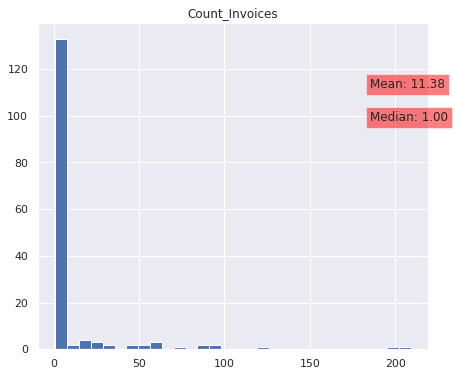

Cluster 0


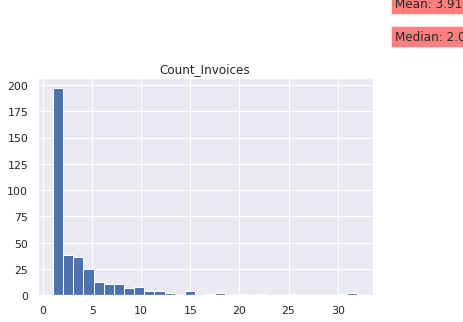

Cluster 1


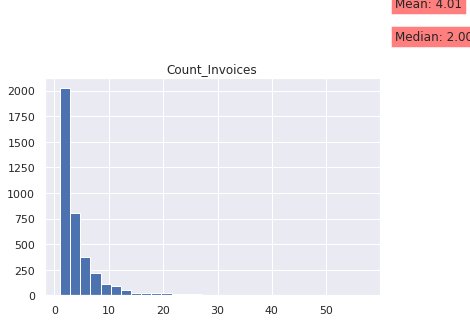

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


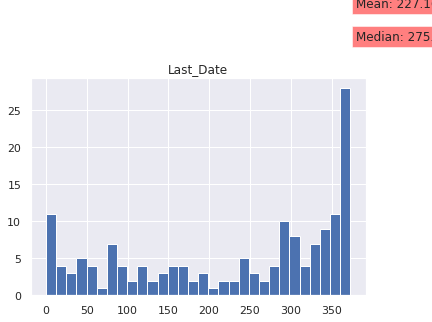

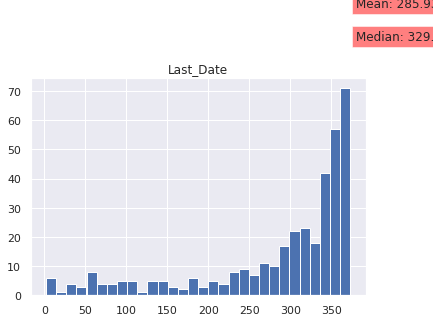

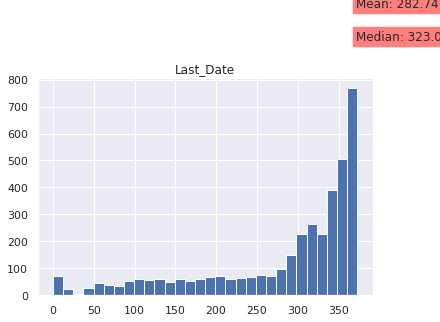

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


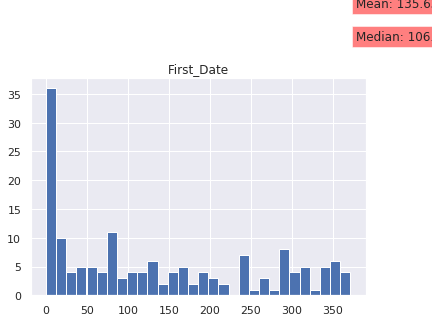

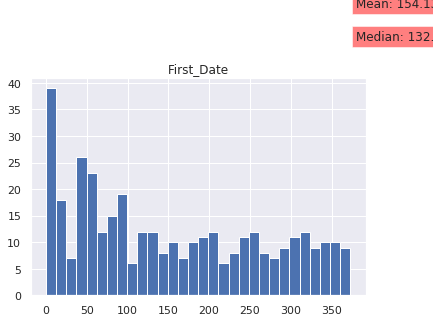

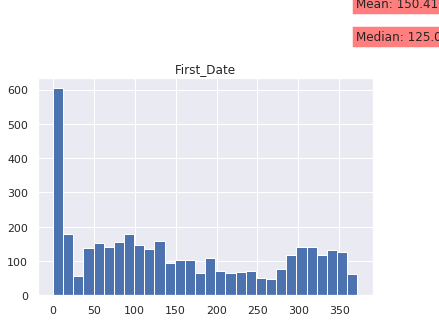

---------------------------------------------------------
count    4336.000000
mean       21.844331
std        19.636356
min         1.000000
25%         9.500000
50%        17.000000
75%        28.000000
max       300.647059
Name: Average_Products_Invoice, dtype: float64
Cluster -1


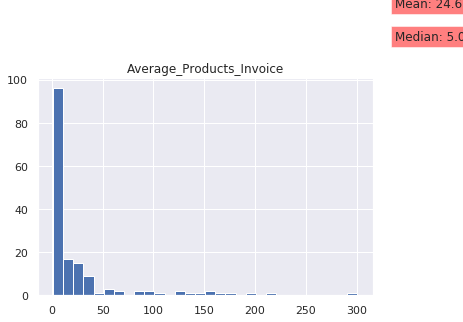

Cluster 0


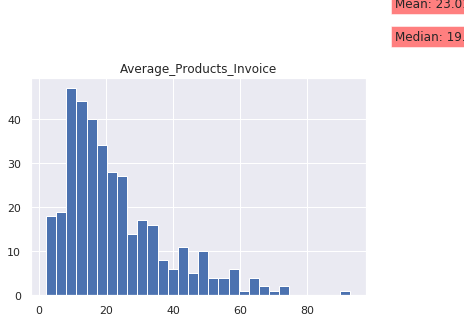

Cluster 1


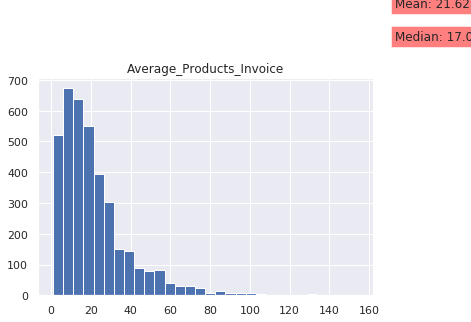

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


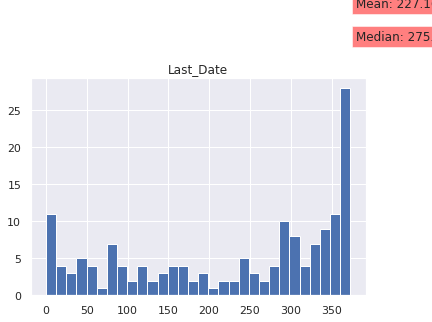

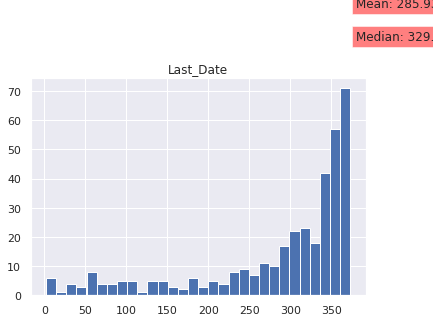

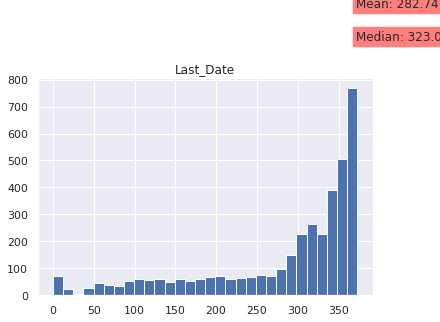

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


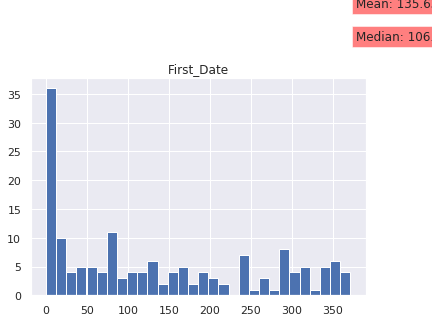

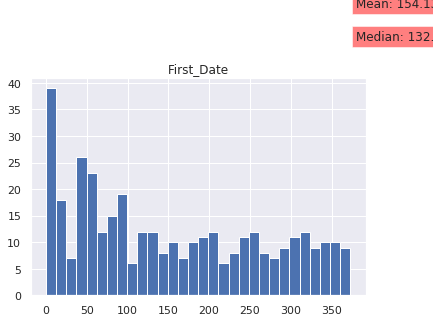

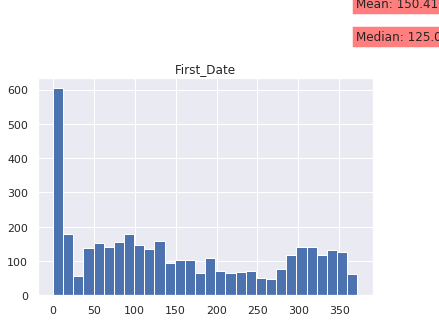

---------------------------------------------------------
count    4336.000000
mean      226.123277
std       296.468316
min         1.000000
25%        92.000000
50%       161.000000
75%       270.000000
max      7824.000000
Name: Average_Quantity_Invoice, dtype: float64
Cluster -1


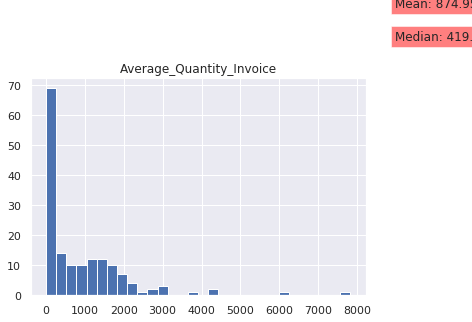

Cluster 0


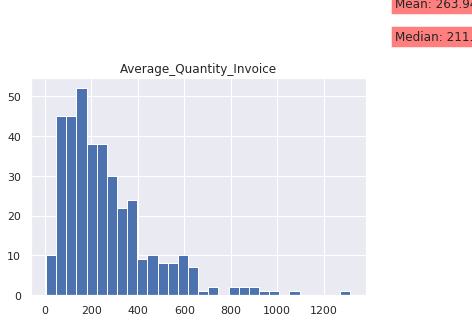

Cluster 1


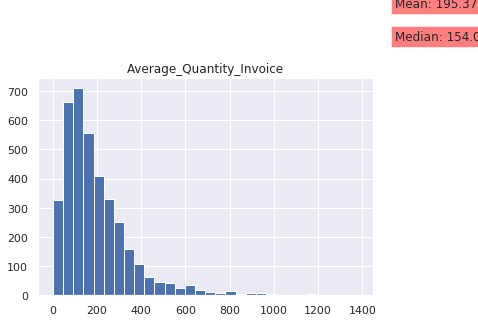

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


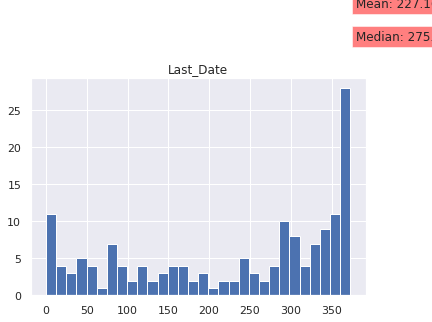

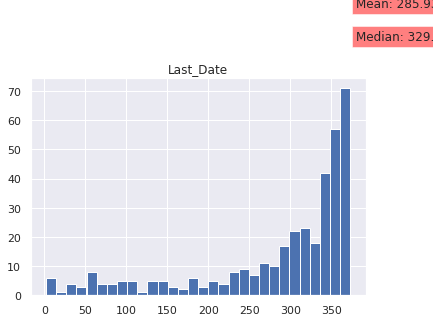

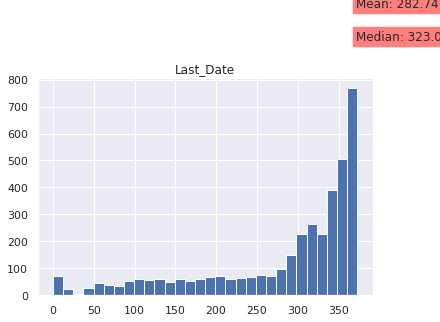

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


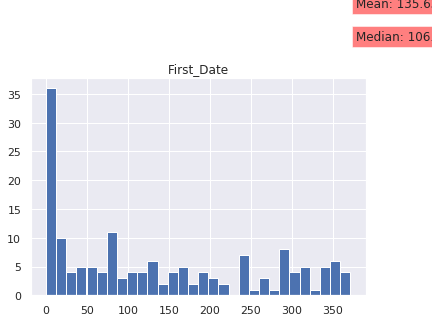

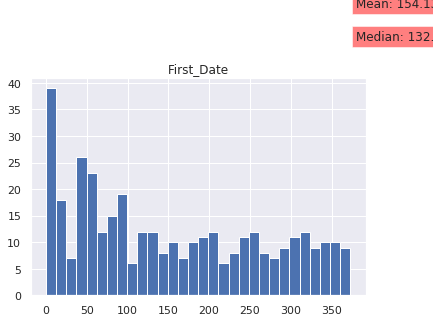

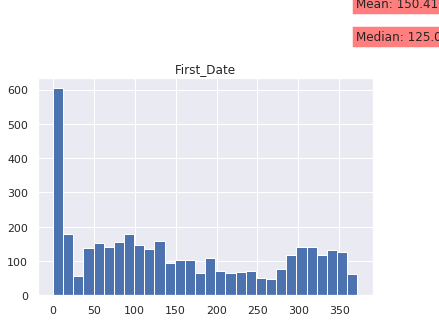

---------------------------------------------------------
count     4336.000000
mean       380.610551
std        497.501543
min          3.450000
25%        177.848393
50%        291.877500
75%        428.053125
max      14844.766667
Name: Average_TotaPrice_Invoice, dtype: float64
Cluster -1


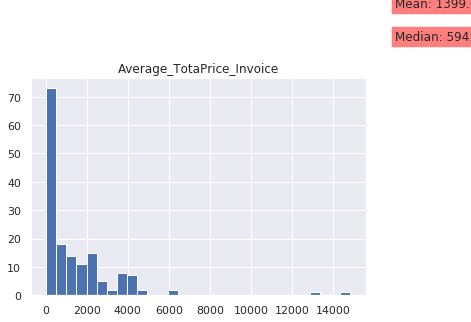

Cluster 0


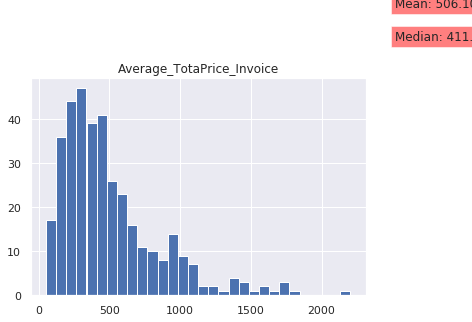

Cluster 1


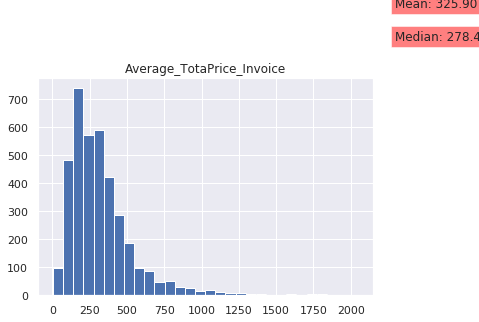

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


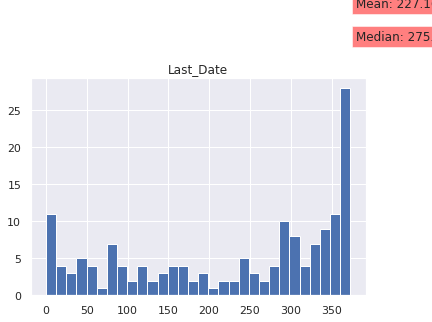

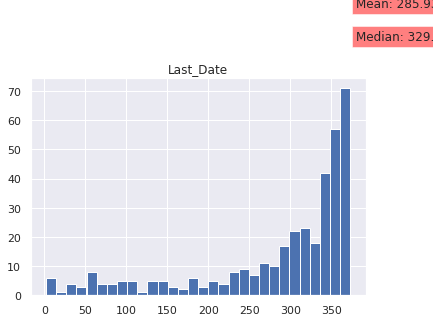

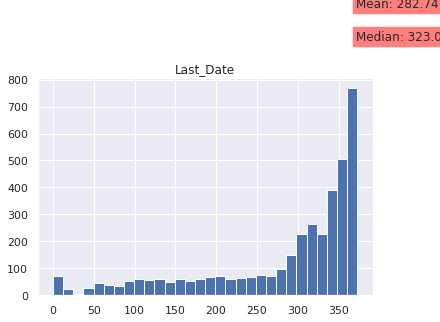

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


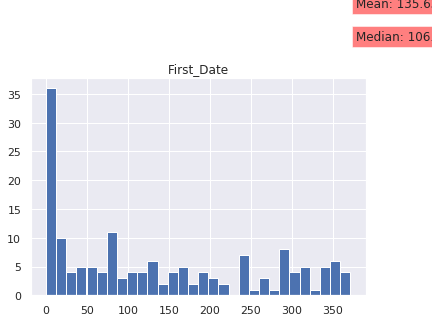

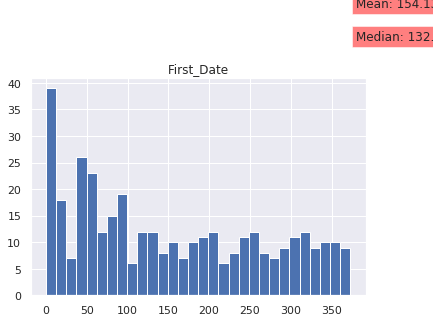

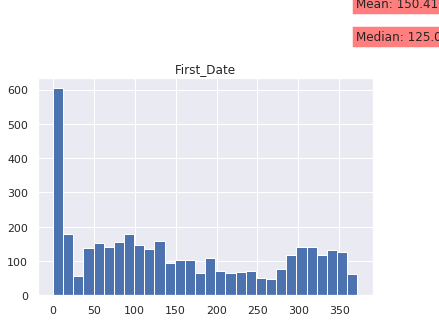

---------------------------------------------------------
count    4336.000000
mean        0.903598
std         0.295176
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: United Kingdom, dtype: float64
Cluster -1


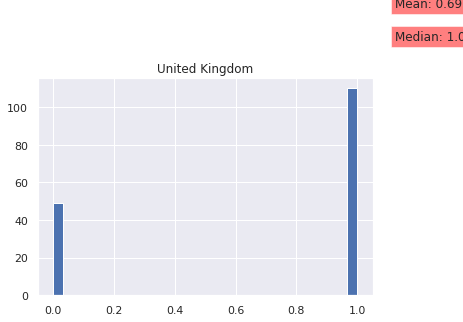

Cluster 0


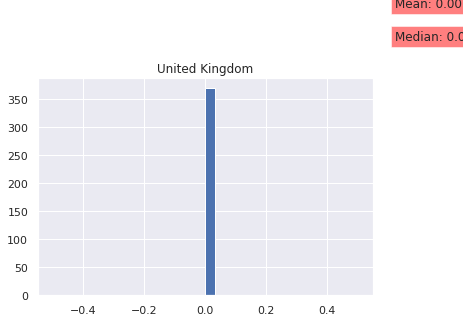

Cluster 1


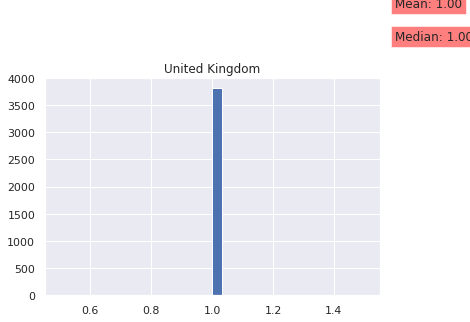

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


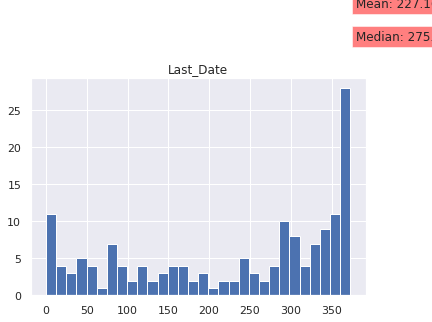

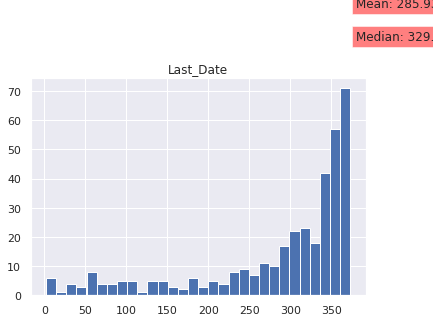

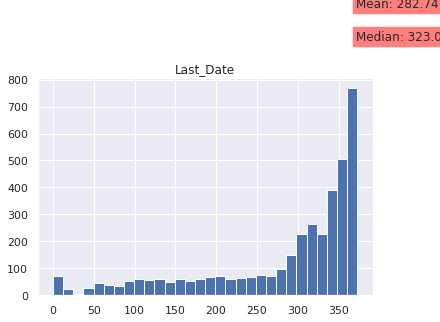

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


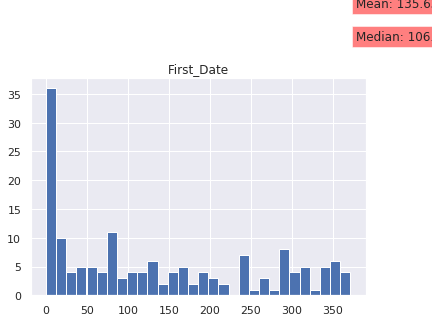

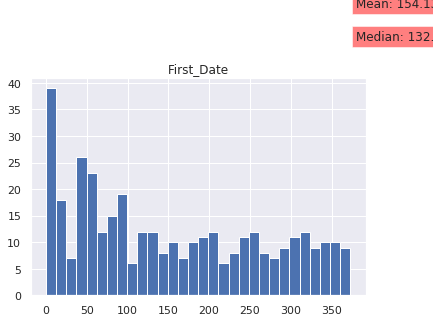

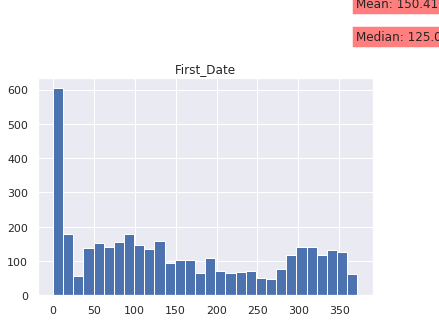

---------------------------------------------------------
count    4336.000000
mean        0.205404
std         0.153394
min         0.000000
25%         0.109062
50%         0.183013
75%         0.268442
max         1.000000
Name: Decoration Department, dtype: float64
Cluster -1


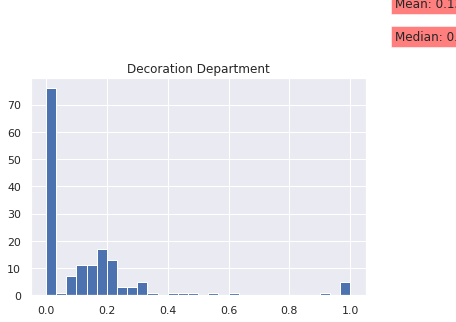

Cluster 0


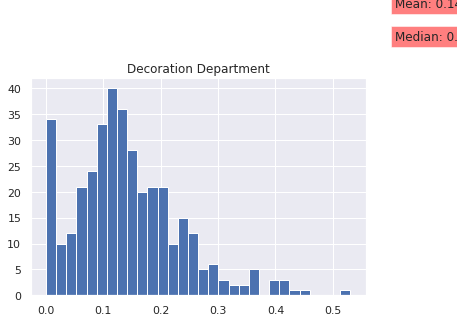

Cluster 1


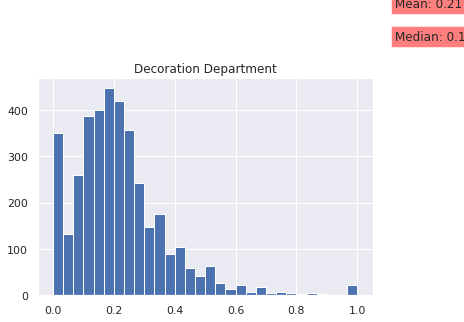

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


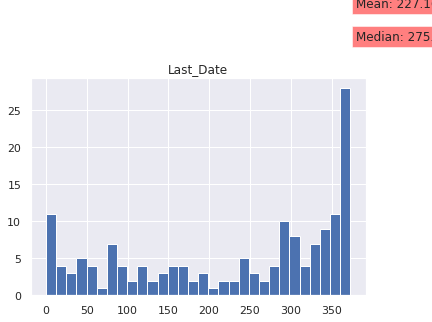

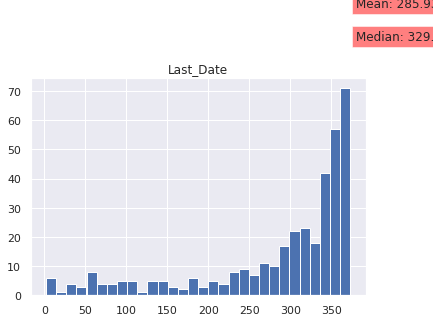

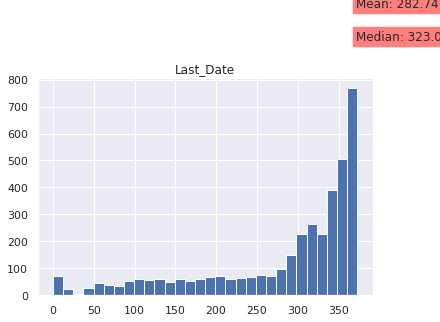

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


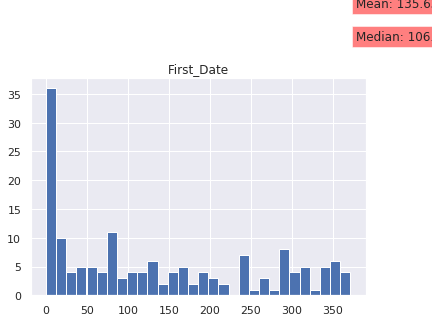

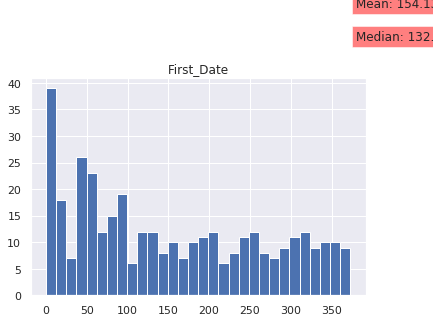

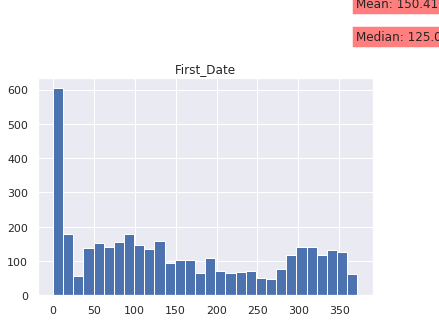

---------------------------------------------------------
count    4336.000000
mean        0.173742
std         0.131597
min         0.000000
25%         0.090909
50%         0.159033
75%         0.231707
max         1.000000
Name: Toys & Kids Deprtment, dtype: float64
Cluster -1


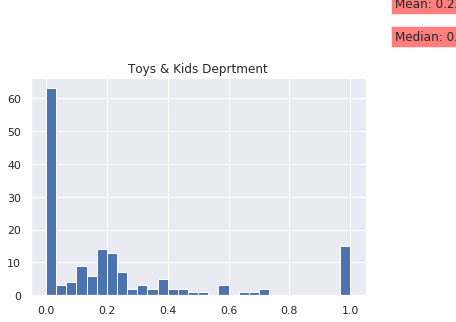

Cluster 0


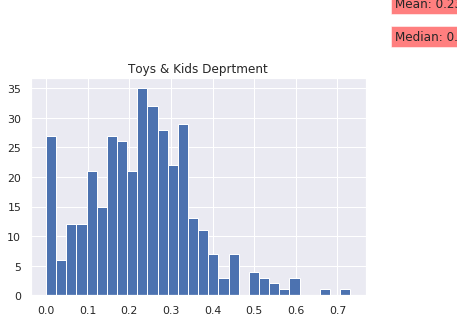

Cluster 1


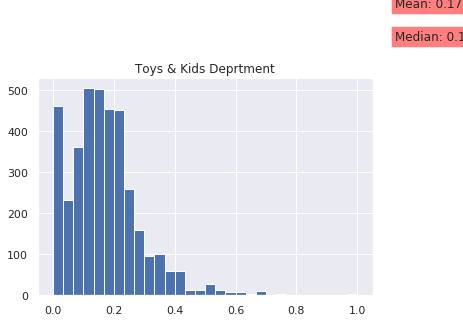

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


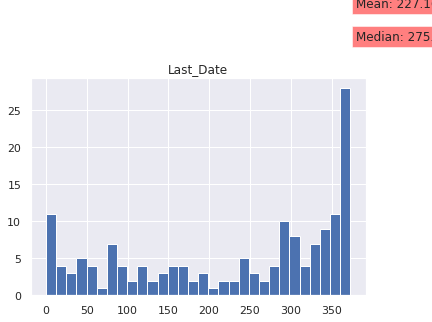

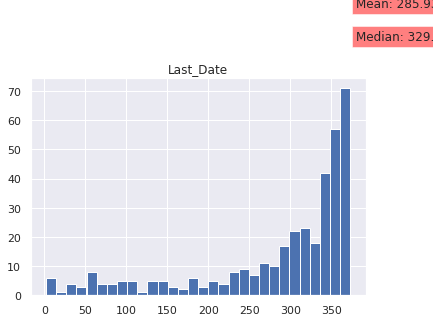

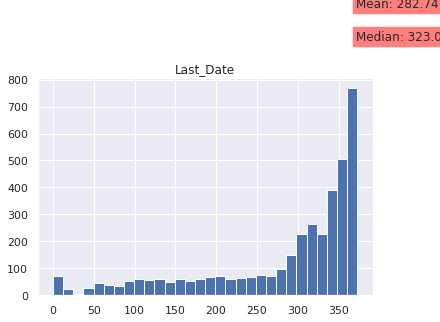

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


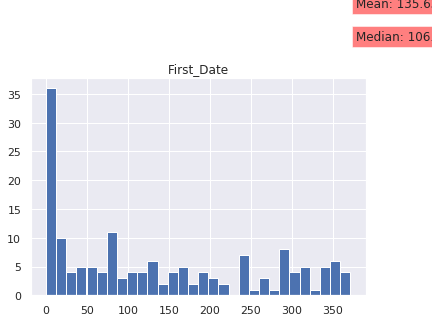

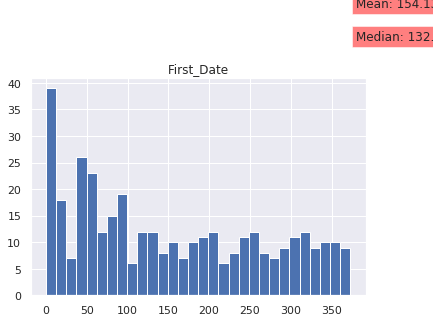

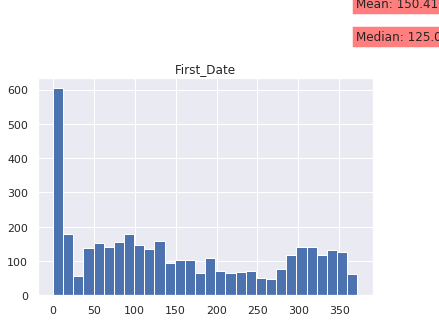

---------------------------------------------------------
count    4336.000000
mean        0.188823
std         0.141574
min         0.000000
25%         0.108352
50%         0.171429
75%         0.240000
max         1.000000
Name: Kitchen Department, dtype: float64
Cluster -1


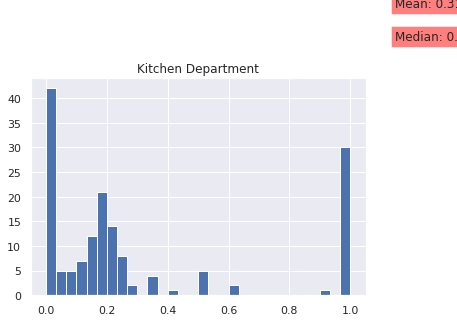

Cluster 0


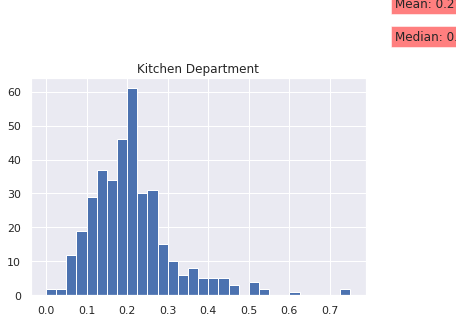

Cluster 1


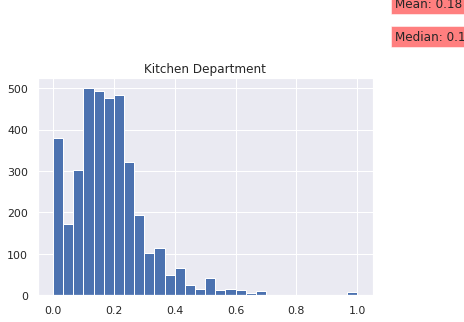

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


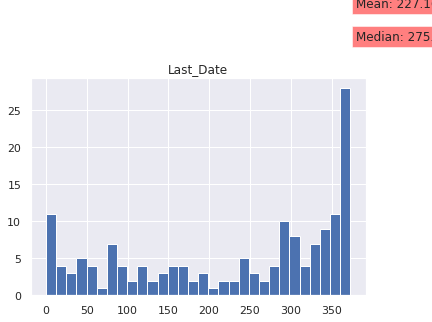

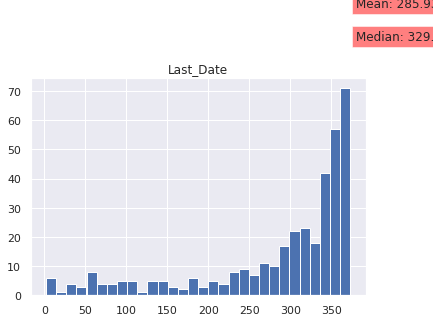

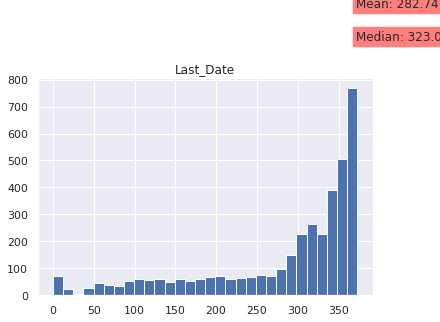

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


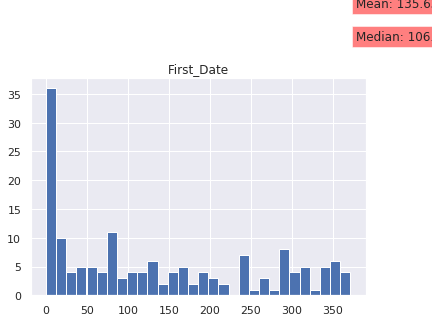

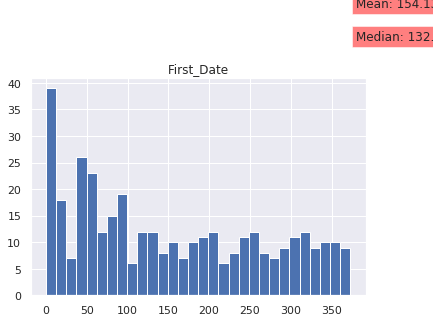

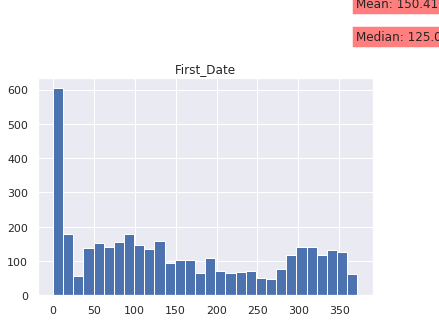

---------------------------------------------------------
count    4336.000000
mean        0.207249
std         0.147077
min         0.000000
25%         0.121212
50%         0.190476
75%         0.266901
max         1.000000
Name: Handcraft & Clothes Department, dtype: float64
Cluster -1


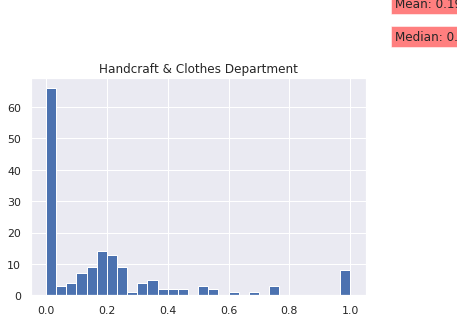

Cluster 0


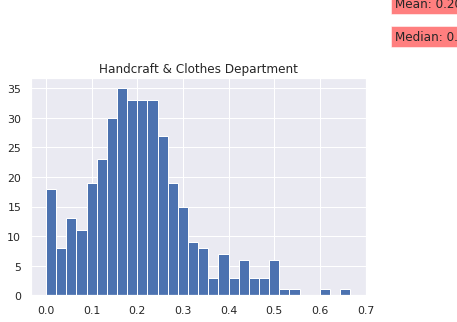

Cluster 1


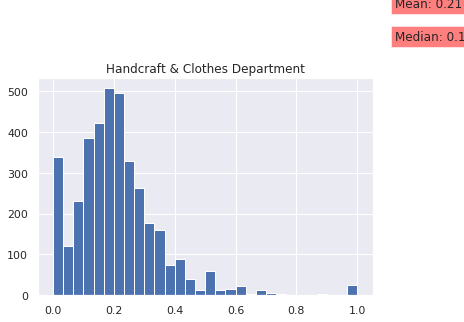

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


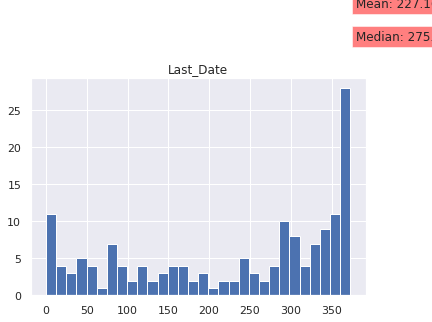

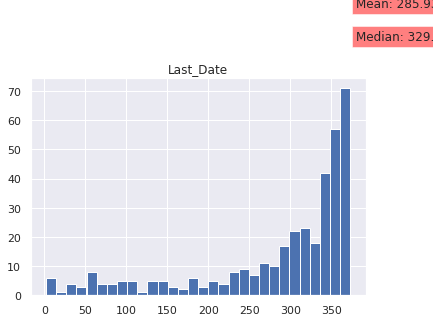

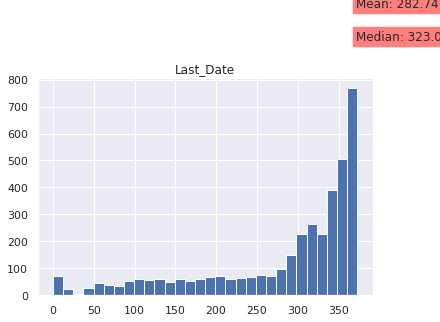

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


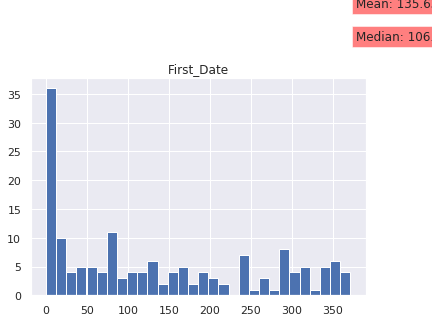

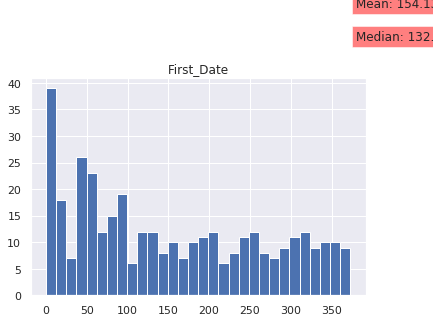

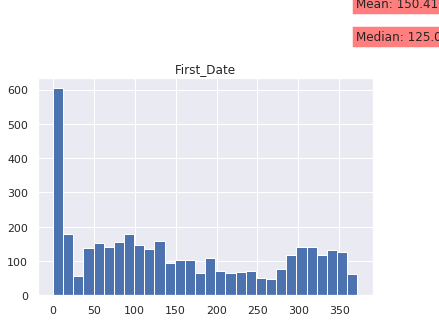

---------------------------------------------------------
count    4336.000000
mean        0.224782
std         0.156175
min         0.000000
25%         0.127273
50%         0.208333
75%         0.295024
max         1.000000
Name: Design & Viantage_Decoration Department, dtype: float64
Cluster -1


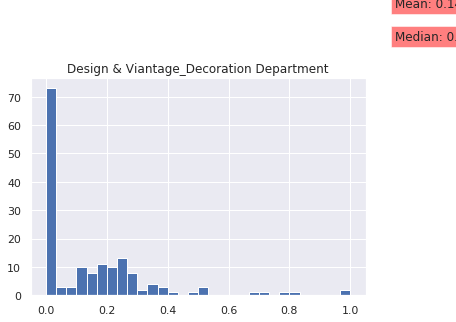

Cluster 0


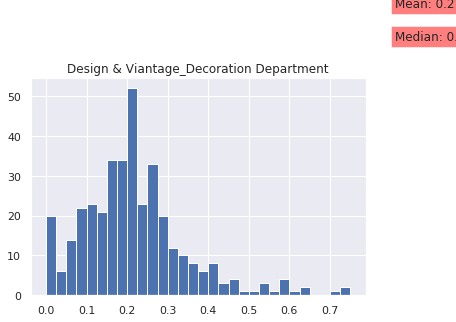

Cluster 1


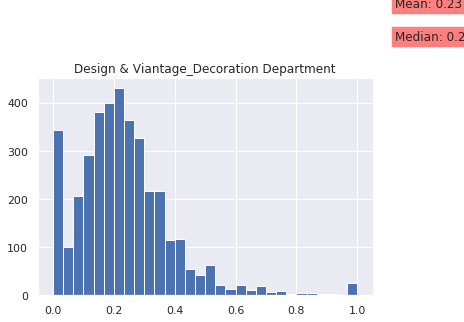

---------------------------------------------------------
count    4336.000000
mean      280.973017
std        99.962966
min         0.000000
25%       231.750000
50%       323.000000
75%       356.000000
max       373.000000
Name: Last_Date, dtype: float64


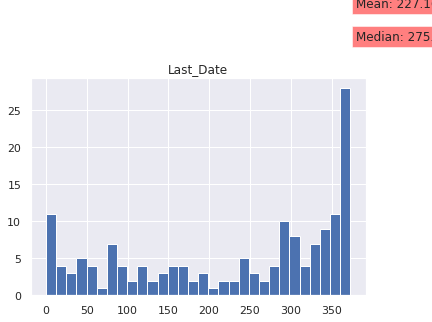

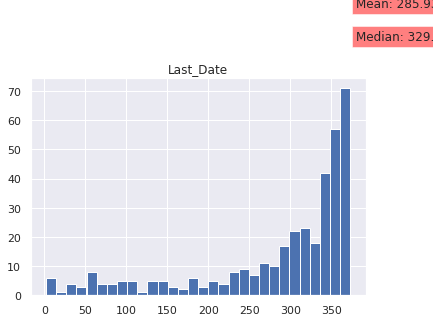

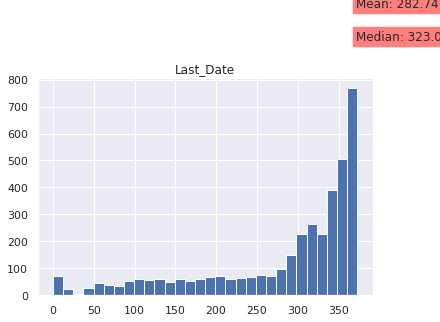

---------------------------------------------------------
count    4336.000000
mean      150.188423
std       117.871227
min         0.000000
25%        47.000000
50%       125.000000
75%       261.000000
max       373.000000
Name: First_Date, dtype: float64


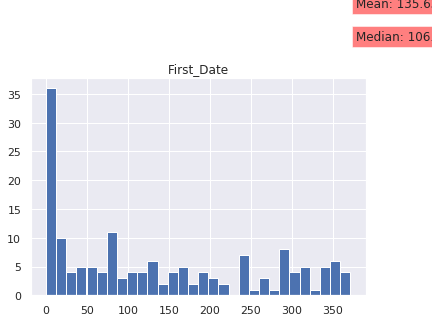

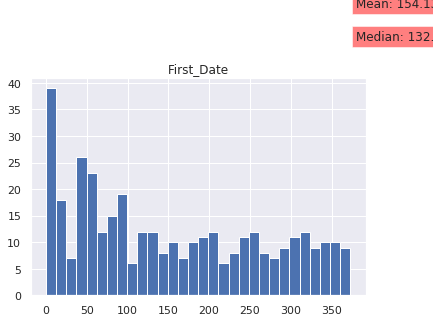

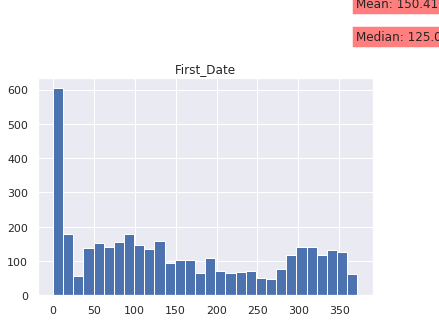

---------------------------------------------------------


In [40]:
hist_dbscan_clusters(3, 30)

In [41]:
df_dbscan_clusters(3, 30)

A/Number_Of_Customers B/Count_Invoices  ... M/First_Date N/Time_Minutes_Mean
-1                    159         166.39 %  ...      -9.69 %               12:36
 0                    369          -8.55 %  ...       2.62 %               10:28
 1                   3808          -6.12 %  ...       0.15 %               13:34

[3 rows x 14 columns]

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=13) model 

model = KMeans(n_clusters=13, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km13'] = id_cluster

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=4) model 

model = KMeans(n_clusters=4, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km4'] = id_cluster

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=2.3, min_samples=5) model 

dbsc = DBSCAN(eps=2.3, min_samples=5).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc5'] = labels

In [0]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=3, min_samples=30) model 

dbsc = DBSCAN(eps=3, min_samples=30).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc30'] = labels

In [46]:
df_customers.head(50)

Count_Invoices  ...  Customer_Category_dbsc30
0              7.0  ...                         0
1              4.0  ...                         0
2              1.0  ...                         0
3              1.0  ...                         0
4              8.0  ...                         0
5              1.0  ...                        -1
6              1.0  ...                         0
7              1.0  ...                         0
8              3.0  ...                         0
9              1.0  ...                        -1
10             2.0  ...                         0
11             4.0  ...                         0
12             3.0  ...                         0
13             1.0  ...                         0
14            10.0  ...                         0
15             2.0  ...                         0
16             4.0  ...                         0
17             2.0  ...                         0
18             1.0  ...                         0
19             4.0  ...                         0
20             2.0  ...                         0
21             3.0  ...                         0
22             1.0  ...                         0
23             1.0  ...                         0
24             2.0  ...                         0
25             2.0  ...                         0
26             1.0  ...                        -1
27             2.0  ...                         0
28             4.0  ...                         0
29             5.0  ...                         0
30             5.0  ...                         0
31             2.0  ...                         0
32             2.0  ...                         0
33             6.0  ...                         0
34             1.0  ...                         0
35             1.0  ...                         0
36             4.0  ...                         0
37             2.0  ...                         0
38            12.0  ...                         0
39             2.0  ...                         0
40             1.0  ...                        -1
41             4.0  ...                         0
42             1.0  ...                         0
43             1.0  ...                         0
44             1.0  ...                         0
45             1.0  ...                         0
46             2.0  ...                         0
47             5.0  ...                         0
48             5.0  ...                         0
49             3.0  ...                        -1

[50 rows x 18 columns]

In [0]:
# exporting your updated dataset
df_customers.to_csv("Part1_P5.csv",encoding='utf-8', index=False)